In [2]:
%%capture
! pip install tensorflow-cpu
! pip install torch==1.10.0+cpu torchvision==0.11.1+cpu torchaudio==0.10.0+cpu -f https://download.pytorch.org/whl/cpu/torch_stable.html
! pip install torchvision # hack to avoid an error due to the suppression of "torch.autograd"

In [1]:
## common libraries :
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import random

## image and plot
import cv2

## file gestion :
from pathlib import Path
import os
import json
import pickle
from time import time

## tensorflow and keras :
# ! pip install torch==1.10.0+cpu torchvision==0.11.1+cpu torchaudio==0.10.0+cpu -f https://download.pytorch.org/whl/cpu/torch_stable.html
import keras # Keras is our Deep Learning framework
from keras.preprocessing.image import ImageDataGenerator

from sklearn.preprocessing import LabelBinarizer


## set global variables :
DATA_PATH = "/home/clairegayral/Documents/openclassroom/data/P6/"
RES_PATH = "/home/clairegayral/Documents/openclassroom/res/P6/"

In [2]:
# %%capture
# ## install latest version of pytorch and detectron2:
# !pip install torch==1.9.1+cpu torchvision==0.10.1+cpu torchaudio==0.9.1 -f https://download.pytorch.org/whl/torch_stable.html
# !pip install pyyaml==5.1
# !pip install detectron2 -f https://dl.fbaipublicfiles.com/detectron2/wheels/cu111/torch1.9/index.html

# import torch, torchvision
# print(torch.__version__, torch.cuda.is_available())
# assert torch.__version__.startswith("1.9")   

# Classez des images à l'aide d'algorithmes de Deep Learning

## Le projet : 
Vous êtes bénévole pour l'association de protection des animaux de votre quartier. C'est d'ailleurs ainsi que vous avez trouvé votre compagnon idéal, Snooky. Vous vous demandez donc ce que vous pouvez faire en retour pour aider l'association.

Vous apprenez, en discutant avec un bénévole, que leur base de données de pensionnaires commence à s'agrandir et qu'ils n'ont pas toujours le temps de référencer les images des animaux qu'ils ont accumulées depuis plusieurs années. Ils aimeraient donc obtenir un algorithme capable de classer les images en fonction de la race du chien présent sur l'image.
Les données

Les bénévoles de l'association n'ont pas eu le temps de réunir les différentes images des pensionnaires dispersées sur leurs disques durs. Pas de problème, vous entraînerez votre algorithme en utilisant le Stanford Dogs Dataset.
Votre mission

L'association vous demande de réaliser un algorithme de détection de la race du chien sur une photo, afin d'accélérer leur travail d’indexation.

Vous avez peu d’expérience sur le sujet, vous décidez donc de contacter un ami expert en classification d’images.

Il vous conseille dans un premier temps de pré-processer des images avec des techniques spécifiques (e.g. whitening, equalization, éventuellement modification de la taille des images) et de réaliser de la data augmentation (mirroring, cropping...).

Ensuite, il vous incite à mettre en œuvre deux approches s’appuyant sur l’état de l’art et l’utilisation de CNN (réseaux de neurones convolutionnels), que vous comparerez en termes de temps de traitement et de résultat :

* Une première en réalisant votre propre réseau CNN, en vous inspirant de réseaux CNN existants. Prenez soin d'optimiser certains hyperparamètres (des layers du modèle, de la compilation du modèle et de l’exécution du modèle)
* Une deuxième en utilisant le transfer learning, c’est-à-dire en utilisant un réseau déjà entraîné, et en le modifiant pour répondre à votre problème.

Concernant le transfer learning, votre ami vous précise que :

* Une première chose obligatoire est de réentraîner les dernières couches pour prédire les classes qui vous intéressent seulement.
* Il est également possible d’adapter la structure (supprimer certaines couches, par exemple) ou de réentraîner le modèle avec un très faible learning rate pour ajuster les poids à votre problème (plus long) et optimiser les performances.

Ressources de calcul

Votre ami vous alerte sur le fait que l'entraînement (même partiel) d'un réseau de neurones convolutionnels est très gourmand en ressources. Si le processeur de l’ordinateur un peu ancien de l’association ne suffit pas, il vous propose plusieurs solutions :

* Limitez le jeu de données, en ne sélectionnant que quelques classes (races de chiens), ce qui permettra déjà de tester la démarche et la conception des modèles, avant une éventuelle généralisation.
* Utilisez la carte graphique de l’ordinateur en tant que GPU (l'installation est un peu fastidieuse, et l'ordinateur est inutilisable le temps du calcul).

C'est l'occasion de vous initier au cloud computing, qui permet d'avoir temporairement accès à des machines très puissantes, en étant facturé seulement durant le temps d'utilisation. Le plus connu est AWS, mais d'autres existent (Google, Microsoft...).

Vous pouvez tester également Google Colaboratory qui permet de mettre en œuvre gratuitement des réseaux CNN utilisant de la GPU.
Livrables attendus

* Un notebook Python (non cleané, pour comprendre votre démarche).
* Un programme Python qui prend une image (array) en entrée et retourne la race la plus probable du chien présent sur l'image.
* Votre support de présentation à destination du bénévole qui gère la base de données, qui devra déployer en production la solution que vous préconisez.

Pour faciliter votre passage au jury, déposez sur la plateforme, dans un dossier nommé “P6_nom_prenom”, tous les livrables du projet. Chaque livrable doit être nommé avec le numéro du projet et selon l'ordre dans lequel il apparaît, par exemple “P6_01_notebook”, “P6_02_programme”, et ainsi de suite.
Modalités de la soutenance 

Ce projet fera l'objet d'une soutenance filmée auprès d'un mentor validateur.

Votre soutenance durera 25 minutes, découpées ainsi (à titre indicatif) :

* 5 min - Présentation de la problématique, du cleaning effectué, du feature engineering et de l'exploration
* 10 min - Présentation des différentes pistes de modélisation effectuées
* 10 min - Présentation du modèle final sélectionné (pour chaque approche) ainsi que des performances et améliorations effectuées
* 5 à 10 minutes de questions-réponses

Ressources complémentaires
1) Prétraitement des images 

Présentation d’une technique de preprocessing : le whitening.
Ce tutoriel présente les concepts de data augmentation. À vous de voir si cela peut améliorer vos performances sur ce projet !
Présentation d’une autre technique de preprocessing : l’equalization.
Deux cours sur le pre-processing d’images : le premier est succinct et illustre les techniques, c’est une bonne première approche ; le second fournit beaucoup de détails qui permettent de mieux appréhender les cas d’utilisation des différents filtres, notamment.

2) CNN et transfer learning

Guide d’utilisation de Google Colaboratory avec GPU.
Une présentation du transfer learning, ses avantages, les cas d’application et un exemple de code en Keras. 

## Plan du notebook :


Pour faciliter la lecture, il est possible de revenir à ce sommaire, en cliquant sur [back to menu](#menu) chaque fois qu'il apparaît. A partir de ce menu, il est possible de naviguer entre les parties en cliquant sur leur titre.


<a id ="menu"></a>
1. [Importer les données](#section1)
    1. [téléchargement](#section1.1)
    2. [images train et test](#section1.2)
    3. [annotations et labels](#section1.3)
    
2. [Pré-process des images](#section2)
    1. [whitening](#section2.1)
    2. [equalization](#section2.2)
    3. [modification de la taille des images](#section2.3)
    4. [data augmentation (mirroring, cropping...)](#section2.4)
    5. [automatisation du preprocess](#section2.5)

3. [Mon réseau CNN](#section3)
    1. [bibliographie pour réaliser ce travail](#section3.1)
          1. [modèles de réseau CNN](#section3.1.1)
          2. [fonction de cout](#section3.1.2)
          3. [adaptative Learning ](#section3.1.3)  
    2. [création du CNN](#section3.2)
          1. [préparation des données](#section3.2.1)
          2. [le CNN LeNet5 et les paramètres à fixer](#section3.2.2)
          3. [optimisation des paramètres](#section3.2.3)       
          4. [etude du taux d'apprentissage](#section3.2.4)
    3. [Optimisation des hyperparamètres (des layers du modèle, de la compilation du modèle et de l’exécution du modèle)](#section2.2)
    
    
4. [ Transfert learning](#section4)
    1. [Mise en place du transfert](#section4.1)
          1. [Appel au réseau primo-entraîné](#section4.1.1)
          2. [Dataset pour le transfert ](#section4.1.2)
    2. [Apprentissage des dernières couches uniquement](#section4.2)
          1. [Choix de structure](#section4.2.1)
          2. [Optimisation des paramètres d'exécution](#section4.2.2)
    3. [Analyses des résultats](#section4.3)

    Adapter la structure (supprimer certaines couches),
    Réentraîner le modèle avec un très faible learning rate  

<a id ="section1"></a>
<a id ="section1.1"></a>

[back to menu](#menu)

# 1. Importer les données :
## 1.A Téléchargement :

Let's download a sample of the data :

In [3]:
if not os.path.isdir(DATA_PATH+"Images/"):
    print("downloading Images")
    ! wget http://vision.stanford.edu/aditya86/ImageNetDogs/images.tar
    ! tar xf images.tar --directory "/home/clairegayral/Documents/openclassroom/data/P6/"

# if not os.path.isdir(DATA_PATH+"train"):
# test_index = open(DATA_PATH+"test_data.mat","rb").read()
# test_index[:1000]

Let's get the file directories :

In [4]:
d_type = 'train'

## if I want to use the 100 dog by class proposed by the author of dataset :
# if not os.path.isdir(DATA_PATH + d_type):
if not os.path.isfile(RES_PATH + "list_" + d_type + "_imgdir.txt"): 
    print("extract list of filename")
    ## extract train and test sample list from .mat :
    import scipy.io
    mat = np.array(scipy.io.loadmat(DATA_PATH + d_type + "_data.mat")[d_type + "_info"][0][0][0])
    list_filedir = []
    for tmp in mat :
        list_filedir.append(tmp[0][0])
    open(RES_PATH + "list_" + d_type + "_imgdir.txt", "w").write('\n'.join(list_filedir))

list_filedir = open(RES_PATH + "list_" + d_type + "_imgdir.txt", "r").read()
list_filedir = list_filedir.split("\n")

Je n'ai pas besoin de l'intégralité du jeu de donné, je sélectionne 4 races prises au hasard. Ensuite, je copie l'ensemble train et test dans des fichiers à part. J'ai commenté cette partie pour garder les mêmes images pour travailler. 

In [5]:
## but I think I'd better choose K=4 races randomly :
K=4
list_races = np.unique([filename.split("/")[0] for filename in list_filedir])
# list_races = 
random.shuffle(list_races)
# print(list_races[:K]) ## copy brut just after :
sample_races = ['n02110185-Siberian_husky', 'n02098105-soft-coated_wheaten_terrier',
                'n02113799-standard_poodle', 'n02097298-Scotch_terrier']
print(sample_races)

# test_size = 0.2 #20% test and 80% train 
# ## save the filenames and copy the images in resp. train/ and test/
# train_filenames = {}
# test_filenames = {}
# Path(DATA_PATH+"train/").mkdir(parents=True, exist_ok=True)
# Path(DATA_PATH+"test/").mkdir(parents=True, exist_ok=True)

# for race in sample_races:
#     ## get the list of images and random shuffle
#     race_filenames = os.listdir(DATA_PATH+"Images/"+race+"/")
#     random.shuffle(race_filenames)
#     ## split the list into train and test :
#     n_test = int(np.floor(len(race_filenames)*test_size))
#     race_test = race_filenames[:n_test]
#     race_train = race_filenames[n_test:]
#     ## save in dict :
#     train_filenames[race] = race_train
#     test_filenames[race] = race_test
#     ## copy in file : 
#     for filename in race_train :
#         ## copy image : 
#         f = open(DATA_PATH+"Images/"+race+"/" + filename , 'rb').read()
#         open(DATA_PATH+"train/"+filename, 'wb').write(f)
#         ## copy annotations :
#         ann_name = filename.split(".")[0]
#         f = open(DATA_PATH + "Annotation/" + race + "/" + ann_name , 'r').read()
#         open(DATA_PATH + "train/" + ann_name, 'w').write(f)

#     for filename in race_test :
#         # ## copy train : 
#         f = open(DATA_PATH+"Images/"+race+"/" + filename , 'rb').read()
#         open(DATA_PATH+"test/"+filename, 'wb').write(f)
#         ## copy annotations :
#         ann_name = filename.split(".")[0]
#         f = open(DATA_PATH + "Annotation/" + race + "/" + ann_name , 'r').read()
#         open(DATA_PATH + "test/" + ann_name, 'w').write(f)
# with open(DATA_PATH + "test_dict_filename.json", 'w') as fp:
#     json.dump(test_filenames, fp)
# with open(DATA_PATH + "train_dict_filename.json", 'w') as fp:
#     json.dump(train_filenames, fp)

with open(DATA_PATH + "train_dict_filename.json", 'r') as fp:
    train_filenames = json.load(fp)
with open(DATA_PATH + "test_dict_filename.json", 'r') as fp:
    test_filenames = json.load(fp)
                               
list_train_filename = [x for v in train_filenames.values() for x in v]
list_test_filename = [x for v in test_filenames.values() for x in v]

['n02110185-Siberian_husky', 'n02098105-soft-coated_wheaten_terrier', 'n02113799-standard_poodle', 'n02097298-Scotch_terrier']


<a id ="section1.2"></a>
[back to menu](#menu)

## 1.B Images train et test
Il a l'air classic d'enregistrer les images dans un array comme suit :

In [6]:
## init X_train
X_train = []
for filename in list_train_filename :
#     image = cv2.imread(DATA_PATH+"train/"+filename,0) # grayscale
    image = cv2.imread(DATA_PATH+"train/"+filename)
#     image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    X_train.append(image)
# X_train = np.array(X_train)
print("X_train =", len(X_train), "images of different shapes")

X_train = 534 images of different shapes


In [7]:
X_test = []
for filename in list_test_filename :
    image = cv2.imread(DATA_PATH+"test/"+filename)
#     image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    X_test.append(image)
# X_test = np.array(X_test) #image does not have the same shape ...    
print("X_test shape =", len(X_test), "images of different shapes")

X_test shape = 131 images of different shapes


<a id ="section1.3"></a>
[back to menu](#menu)

## 1.C Annotations et labels  :

Il faut extraire l'information de labelisation des images. Les annotations sont au format "PASCAL VOC format", et [cette page de stackoverflow](https://stackoverflow.com/questions/53317592/reading-pascal-voc-annotations-in-python) permet d'extraire de ce format XML la localisation des boites ainsi que le label.

In [8]:
# open(DATA_PATH + "train/" + ann_name, 'r').read()

import xml.etree.ElementTree as ET

def read_content(xml_file: str):
    tree = ET.parse(xml_file)
    root = tree.getroot()
    list_with_all_boxes = []
    for boxes in root.iter('object'):
        filename = root.find('filename').text
        ymin, xmin, ymax, xmax = None, None, None, None
        ymin = int(boxes.find("bndbox/ymin").text)
        xmin = int(boxes.find("bndbox/xmin").text)
        ymax = int(boxes.find("bndbox/ymax").text)
        xmax = int(boxes.find("bndbox/xmax").text)
        list_with_single_boxes = [xmin, ymin, xmax, ymax]
        list_with_all_boxes.append(list_with_single_boxes)
    return filename, list_with_all_boxes

filename = list_train_filename[0]
ann_name = filename.split(".")[0]
name, boxes = read_content(DATA_PATH + "train/" + ann_name)
name, boxes

('n02110185_5871', [[57, 5, 441, 322]])

Je ne sais pas encore si je vais utiliser ces annotations pour ce projet, je vais pour le moment me contenter de labels de classification 1,2,3,4 pour les 4 races que je cherche à prédire : 

In [137]:
sample_races = ['n02110185-Siberian_husky', 'n02098105-soft-coated_wheaten_terrier',
                'n02113799-standard_poodle', 'n02097298-Scotch_terrier']

race_table = pd.DataFrame(columns=["file_name","race","label", "ref"])
for k in range(len(sample_races)):
    race = sample_races[k]
    race_table.loc[k,"file_name"] = race
    race_table.loc[k,"race"] = race.split("-")[1] 
    race_table.loc[k,"label"] = k
    race_table.loc[k,"ref"] = race.split("-")[0] 
race_table.to_csv(DATA_PATH+"race_table.csv")
race_table

,file_name,race,label,ref
0,n02110185-Siberian_husky,Siberian_husky,0,n02110185
1,n02098105-soft-coated_wheaten_terrier,soft,1,n02098105
2,n02113799-standard_poodle,standard_poodle,2,n02113799
3,n02097298-Scotch_terrier,Scotch_terrier,3,n02097298


In [10]:
## get train labels 
Y_train = []
for filename in list_train_filename:
    ref = filename.split("_")[0]
    label = int(race_table[race_table.ref == ref].label)
    Y_train.append(label)
Y_train = np.array(Y_train)
print("Y_train shape =", Y_train.shape)
## get test labels
Y_test = []
for filename in list_test_filename:
    ref = filename.split("_")[0]
    label = int(race_table[race_table.ref == ref].label)
    Y_test.append(label)
Y_test = np.array(Y_test)
print("Y_tests shape =", Y_test.shape)

Y_train shape = (534,)
Y_tests shape = (131,)


<a id ="section2"></a>
<a id ="section2.1"></a>

[back to menu](#menu)

# 2. Pré-process des images

## 2.A. Whitening
En suivant [le tutoriel donné dans les ressources du projet](http://mccormickml.com/2024/07/24/intuition-behind-whitening-image-patches/), sur deux de mes images d'entrainement : 

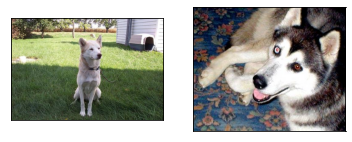

In [11]:
## image 2 
plt.subplot(1,2,1)
filename1 = list_train_filename[1]
image1 = cv2.imread(DATA_PATH+"train/"+filename1)
image1 = cv2.cvtColor(image1, cv2.COLOR_BGR2RGB)
plt.imshow(image1)
plt.xticks([]), plt.yticks([])

## image 2 
plt.subplot(1,2,2)
filename2 = list_train_filename[2]
image2 = cv2.imread(DATA_PATH+"train/"+filename2)
image2 = cv2.cvtColor(image2, cv2.COLOR_BGR2RGB)
plt.imshow(image2)
plt.xticks([]), plt.yticks([]) 
plt.show()

(333, 500, 3) (294, 360, 3)


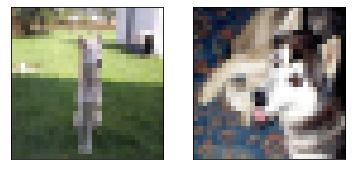

(32, 32, 3) (32, 32, 3)


In [12]:
## images must have same shape for this process ... I reshape :
print(image1.shape, image2.shape)
# width = min(image1.shape[0], image2.shape[0])
# height = min(image1.shape[1], image2.shape[1])
width = 32
height = 32


dim = (width, height)
# resize image
image1 = cv2.resize(image1, dim, interpolation = cv2.INTER_AREA)
image2 = cv2.resize(image2, dim, interpolation = cv2.INTER_AREA)

## check reshize deformation :
plt.subplot(1,2,1)
plt.imshow(image1)
plt.xticks([]), plt.yticks([])

plt.subplot(1,2,2)
plt.imshow(image2)
plt.xticks([]), plt.yticks([]) 
plt.show()
print(image1.shape, image2.shape)

In [13]:
X = np.array([image1,image2])

## flatten image :
print("Original image shape : ", X.shape)

X = X.reshape(X.shape[0], X.shape[1]*X.shape[2]*X.shape[3])
print("Flatten image shape : ", X.shape)
X.shape

Original image shape :  (2, 32, 32, 3)
Flatten image shape :  (2, 3072)


(2, 3072)

X.min() 0.0
X.max() 1.0
X means by pixel = [0.30196078 0.25686275 0.25098039 ... 0.10588235 0.13137255 0.11176471]
X means by pixel after centering = [ 0.00000000e+00  2.77555756e-17  1.38777878e-17 ... -6.93889390e-18
  0.00000000e+00  0.00000000e+00]


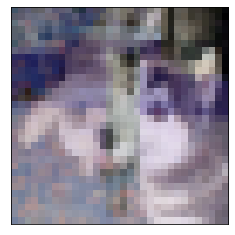

In [14]:
## 1. rescale the images
X_norm = X / 255.
print('X.min()', X_norm.min())
print('X.max()', X_norm.max())
## 2. Subtract the mean from all images
print("X means by pixel =",X_norm.mean(axis=0))
X_norm = X_norm - X_norm.mean(axis=0)
print("X means by pixel after centering =",X_norm.mean(axis=0))
cov = np.cov(X_norm, rowvar=False)

U,S,V = np.linalg.svd(cov)
epsilon = 0.1
X_ZCA = U.dot(np.diag(1.0/np.sqrt(S + epsilon))).dot(U.T).dot(X_norm.T).T
X_ZCA_rescaled = (X_ZCA - X_ZCA.min()) / (X_ZCA.max() - X_ZCA.min())
plt.imshow(X_ZCA_rescaled[1,:].reshape(32,32,3))
plt.xticks([]), plt.yticks([]) 
plt.show()


Même pour deux images en 32x32 cette opération prend plusieurs secondes ... J'ai donc été voir s'il y avait des implémentations plus rapides. La suivante est faite image par image, et sans la flattenisation et centré-réduire. Elle a l'ai d'être faite en niveaux de gris.

La référence qui m'a éclairée : http://ufldl.stanford.edu/tutorial/unsupervised/PCAWhitening/

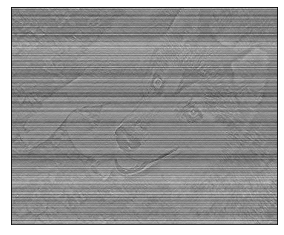

In [15]:
## compute ZCA transfo (including center reduce in fun) : 
def zca_whitening_matrix(image, epsilon=1e-5):
    '''
    Function to compute ZCA whitening matrix (aka Mahalanobis whitening).
    main ideas from https://stackoverflow.com/questions/31528800/how-to-implement-zca-whitening-python
    same function in : https://www.it-swarm-fr.com/fr/python/comment-mettre-en-oeuvre-le-blanchiment-zca-python/1054657420/
     
    Parameters:
    -----------------------------------------
    image: [M x N] matrix.
            Rows: Variables 
            Columns: Observations 
    epsilon = 1e-5 : Whitening constant, prevents division by zero
    
    Returns:
    -----------------------------------------
    Transition matrix ZCAMatrix: [M x M] matrix
    '''   
    # Covariance matrix [column-wise variables]: Sigma = (X-mu)' * (X-mu) / N
    sigma = np.cov(image, rowvar=True) # [M x M]
    # Singular Value Decomposition. X = U * np.diag(S) * V
    U,S,V = np.linalg.svd(sigma)
        # U: [M x M] eigenvectors of sigma.
        # S: [M x 1] eigenvalues of sigma.
        # V: [M x M] transpose of U
    # ZCA Whitening matrix: U * Lambda * U'
    ZCAMatrix = np.dot(U, np.dot(np.diag(1.0/np.sqrt(S + epsilon)), U.T)) # [M x M]
    return ZCAMatrix

gray1 = cv2.imread(DATA_PATH+"train/"+filename2,0)
ZCAMatrix = zca_whitening_matrix(gray1,0.01) # get X_ZCA
image_whitened = np.dot(ZCAMatrix, gray1)
plt.imshow(image_whitened,"gray")
plt.xticks([]), plt.yticks([]) 
plt.show()

Deux remarques avant de passer à la suite :
1. tensorflow routine : 
Le whitening fait partie des pre-process implémentés dans tensorflow. Je reviendrai dessus à la fin de cette partie :

In [16]:
datagen = ImageDataGenerator(
    featurewise_center=False,  # set input mean to 0 over the dataset
    samplewise_center=False,  # set each sample mean to 0
    featurewise_std_normalization=False,  # divide inputs by std of the dataset
    samplewise_std_normalization=False,  # divide each input by its std
    zca_whitening=False,  # apply ZCA whitening
    zca_epsilon=1e-06,  # epsilon for ZCA whitening
    rotation_range=0,  # randomly rotate images in the range (degrees, 0 to 180)
    # randomly shift images horizontally (fraction of total width)
    width_shift_range=0.1,
    # randomly shift images vertically (fraction of total height)
    height_shift_range=0.1,
    shear_range=0.,  # set range for random shear
    zoom_range=0.,  # set range for random zoom
    channel_shift_range=0.,  # set range for random channel shifts
    # set mode for filling points outside the input boundaries
    fill_mode='nearest',
    cval=0.,  # value used for fill_mode = "constant"
    horizontal_flip=True,  # randomly flip images
    vertical_flip=False,  # randomly flip images
    # set rescaling factor (applied before any other transformation)
    rescale=None,
    # set function that will be applied on each input
    preprocessing_function=None,
    # fraction of images reserved for validation (strictly between 0 and 1)
    validation_split=0.0)


2. Dans le cadre d'un autre projet, j'ai pu essayer d'autre méthodes qui ont l'air plus rapide comme la détection de contour ou de texture

<a id ="section2.2"></a>

[back to menu](#menu)

## 2.B. Equalization
J'ai directement fait appel à l'implémentation proposée dans [la documentation d'openCV](https://docs.opencv.org/4.x/d5/daf/tutorial_py_histogram_equalization.html) à ce sujet

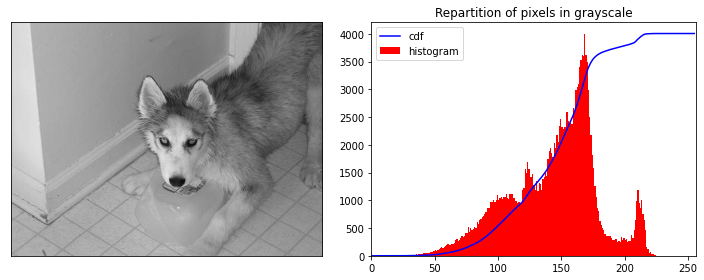

In [17]:
filename = list_train_filename[3]
image = cv2.imread(DATA_PATH+"train/"+filename,0)

## compute hist 
hist,bins = np.histogram(image.flatten(),256,[0,256])
cdf = hist.cumsum()
cdf_normalized = cdf * float(hist.max()) / cdf.max()

## plot imgae + hist
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.imshow(image, "gray")
plt.xticks([]), plt.yticks([]) 

plt.subplot(1,2,2)
plt.plot(cdf_normalized, color = 'b')
plt.hist(image.flatten(),256,[0,256], color = 'r')
plt.xlim([0,256])
plt.legend(('cdf','histogram'), loc = 'upper left')
plt.title("Repartition of pixels in grayscale")
plt.tight_layout()
plt.show()

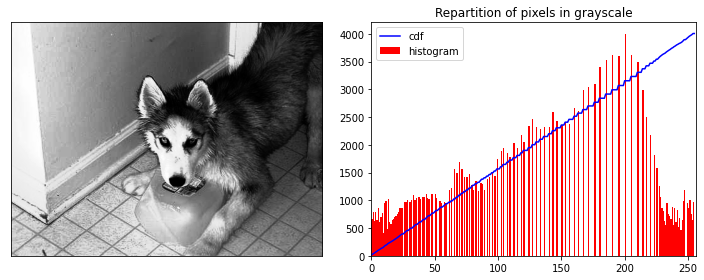

In [18]:
## compute equalization : 
cdf_m = np.ma.masked_equal(cdf,0)
cdf_m = (cdf_m - cdf_m.min())*255/(cdf_m.max()-cdf_m.min())
cdf = np.ma.filled(cdf_m,0).astype('uint8')

image_eq = cdf[image]

## compute hist of eq. image :
hist,bins = np.histogram(image_eq.flatten(),256,[0,256])
cdf = hist.cumsum()
cdf_normalized = cdf * float(hist.max()) / cdf.max()

## plot 
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.imshow(image_eq, "gray")
plt.xticks([]), plt.yticks([]) 

plt.subplot(1,2,2)
plt.plot(cdf_normalized, color = 'b')
plt.hist(image_eq.flatten(),256,[0,256], color = 'r')
plt.xlim([0,256])
plt.legend(('cdf','histogram'), loc = 'upper left')
plt.title("Repartition of pixels in grayscale")
plt.tight_layout()
plt.show()


<a id ="section2.3"></a>

[back to menu](#menu)

## 2.C. Modification de la taille des images 
J'ai déjà vu, dans la partie sur le whitening comment changer la taille des images. La question va être quelle taille prendre lorsque l'ensemble des images n'a pas de taille commune. J'ai vu que pour certaines méthode (dès qu'on a à calculer la covariance des pixels) la taille de l'image est vite problématique (compléxité en n $\times$ p). 

Il pourrait être intéressant, plutôt que de déformer l'image, en prendre 4 carrés de même taille, en se basant sur l'hypothèse que le chien est plutôt au centre de la photo, cela pourrait former une forme de data augmentation en même temps ...

Dans cette partie je propose de faire simple et prendre une taille arbitraire, transformer mon image en la tordant (inférence des pixels par aire).

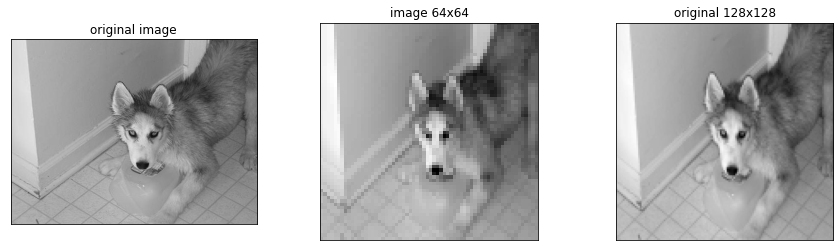

In [238]:
filename = list_train_filename[3]
image = cv2.imread(DATA_PATH+"train/"+filename,0)

## choose dimension :
width = 64
height = 64
# width = min(image1.shape[0], image2.shape[0])
# height = min(image1.shape[1], image2.shape[1])

## resize image
dim = (width, height)
image_rescaled64 = cv2.resize(image, dim, interpolation = cv2.INTER_AREA)
image_rescaled128 = cv2.resize(image, (128,128), interpolation = cv2.INTER_AREA)

##plot
plt.figure(figsize=(15,4))
plt.subplot(1,3,1)
plt.title("original image")
plt.imshow(image, "gray")
plt.xticks([]), plt.yticks([])
plt.subplot(1,3,2)
plt.title("image 64x64")
plt.imshow(image_rescaled64, "gray")
plt.xticks([]), plt.yticks([])
plt.subplot(1,3,3)
plt.title("original 128x128")
plt.imshow(image_rescaled128, "gray")
plt.xticks([]), plt.yticks([])
plt.show()

J'enregistre les images de train en couleur, et de même taille dans une liste "X_train_reshape", comme je l'ai vu faire dans différents codes. Pour choisir la "bonne taille" commune, je propose de regarder la distribution des hauteurs et largeurs des images :

<AxesSubplot:>

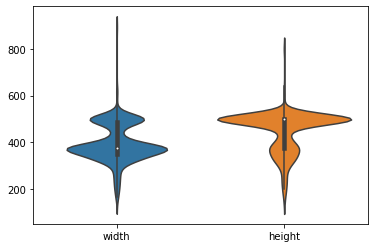

In [14]:
train_shapes = pd.DataFrame()
for k in range(len(X_train)) :
    image = X_train[k]
    train_shapes.loc[k,"width"] = image.shape[0]
    train_shapes.loc[k,"height"] = image.shape[1]
sns.violinplot(data = train_shapes)

Il y a deux modes, ce qui est assez logique (image verticale VS horizontale). Je vais donc retourner de 90° les images verticales puis choisir le re-dimensionnement qui correspond à la moyenne de cette nouvelle distribution

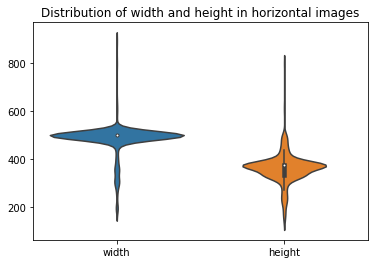

In [15]:
train_shapes = pd.DataFrame()
X_train_horizontal = X_train.copy()
for k in range(len(X_train)) :
    image = X_train[k]
    width, height, s = image.shape
    if height > width : ## rotation 90°
        X_train_horizontal[k] = image.transpose(1, 0, 2)
        train_shapes.loc[k,"width"] = image.shape[1]
        train_shapes.loc[k,"height"] = image.shape[0]
    else : 
        train_shapes.loc[k,"width"] = image.shape[0]
        train_shapes.loc[k,"height"] = image.shape[1]
sns.violinplot(data = train_shapes)
plt.title("Distribution of width and height in horizontal images")
plt.show()

Mieux ! On extrait donc la largeur et la hauteur médiane :

In [16]:
# width = 64
# height = 64

width = int(train_shapes.width.median())
height = int(train_shapes.height.median())
print("width =", width,", height =", height)
dim = (width, height)

## init X_train
X_train_reshape = []
for image in X_train_horizontal :
    ## resize image
    image_rescaled = cv2.resize(image, dim, interpolation = cv2.INTER_AREA)
    X_train_reshape.append(image_rescaled)
X_train_reshape = np.array(X_train_reshape)    
print("X_trains shape =", X_train_reshape.shape)

width = 500 , height = 375
X_trains shape = (534, 375, 500, 3)


In [17]:
## similar operation on X_test :
## init X_train
X_test_reshape = []
for image in X_test :
    width, height, s = image.shape
    if height > width : ## rotation 90°
        image = image.transpose(1, 0, 2)  
    image_rescaled = cv2.resize(image, dim, interpolation = cv2.INTER_AREA)
    X_test_reshape.append(image_rescaled)
X_test_reshape = np.array(X_test_reshape)
print("X_test shape =", X_test_reshape.shape)

X_test shape = (131, 375, 500, 3)


Ce nouvel ensemble sera mon point de départ pour la suite (car même taille pour toutes les images). Je les enregistre :

In [116]:
## on X_train
for i,image in enumerate(X_train_horizontal) :
    width, height, s = image.shape
    if height > width : ## rotation 90°
        image = image.transpose(1, 0, 2)  
    image_rescaled = cv2.resize(image, dim, interpolation = cv2.INTER_AREA)
    cv2.imwrite(DATA_PATH+"train_reshape/"+list_train_filename[i], image_rescaled)

## on X_test :
for i,image in enumerate(X_test) :
    width, height, s = image.shape
    if height > width : ## rotation 90°
        image = image.transpose(1, 0, 2)  
    image_rescaled = cv2.resize(image, dim, interpolation = cv2.INTER_AREA)
    cv2.imwrite(DATA_PATH+"test_reshape/"+list_test_filename[i], image_rescaled)

print(dim)

(500, 375)


#### checkpoint
je peux donc repartir de là :

In [124]:
# dim = (500, 375)

X_train_reshape = []
for image_name in os.listdir(DATA_PATH+"train_reshape/"):
    X_train_reshape.append(cv2.imread(DATA_PATH+"train_reshape/"+image_name))
X_train_reshape = np.array(X_train_reshape)

X_test_reshape = []
for image_name in os.listdir(DATA_PATH+"test_reshape/"):
    X_test_reshape.append(cv2.imread(DATA_PATH+"test_reshape/"+image_name))
X_test_reshape = np.array(X_test_reshape)


(534, 375, 500, 3)

Une fois les 534 images au même format (500 $\times$ 375 c'est à dire la médiane des photos), et les labels correspondants isolés, il me semble pratique de faire appel à "keras.preprocessing.image.ImageDataGenerator" pour gérer l'intégralité des process (avec des codes qui seront très certainement optimisés) : 

In [18]:
datagen = ImageDataGenerator(
    featurewise_center=False,  # set input mean to 0 over the dataset
    samplewise_center=False,  # set each sample mean to 0
    featurewise_std_normalization=False,  # divide inputs by std of the dataset
    samplewise_std_normalization=False,  # divide each input by its std
    zca_whitening=False,  # apply ZCA whitening
    zca_epsilon=1e-06,  # epsilon for ZCA whitening
    rotation_range=0,  # randomly rotate images in the range (degrees, 0 to 180)
    # randomly shift images horizontally (fraction of total width)
    width_shift_range=0.1,
    # randomly shift images vertically (fraction of total height)
    height_shift_range=0.1,
    shear_range=0.,  # set range for random shear
    zoom_range=0.,  # set range for random zoom
    channel_shift_range=0.,  # set range for random channel shifts
    # set mode for filling points outside the input boundaries
    fill_mode='nearest',
    cval=0.,  # value used for fill_mode = "constant"
    horizontal_flip=True,  # randomly flip images
    vertical_flip=False,  # randomly flip images
    # set rescaling factor (applied before any other transformation)
    rescale=None,
    # set function that will be applied on each input
    preprocessing_function=None,
    # fraction of images reserved for validation (strictly between 0 and 1)
    validation_split=0.0)
datagen.fit(X_train_reshape)

In [19]:
batch_size = 128
datagen.flow(X_train_reshape, Y_train, batch_size=batch_size)

Le whitening est vraiment très long à tourner ... à voir s'il améliore vraiment beaucoup les performances.

<a id ="section2.4"></a>

[back to menu](#menu)

## 2.D Data augmentation : 
Dans cette partie, on s'intéresse à la [data augmentation](https://machinelearningmastery.com/how-to-configure-image-data-augmentation-when-training-deep-learning-neural-networks/), c'est-à-dire "comment augmenter le jeu d'apprentissage sans trop biaiser les données". Il y a des opérations simples comme retourner l'image ([flip](https://techtutorialsx.com/2019/04/21/python-opencv-flipping-an-image/)), appeler son mirroir (mirroring), appliquer une rotation ([rotating](https://note.nkmk.me/en/python-opencv-numpy-rotate-flip/)). Il est aussi possible d'en extraire des sous-images ([cropping](https://learnopencv.com/cropping-an-image-using-opencv/), c'est l'idée que j'avais eu lorsque je proposais d'extraire des timbre de la même taille plutôt que de déformer l'image dans l'opération de "reshape"). Toutes ces méthodes sont dans les prétraitements de keras, et illustrées dans [ce tutoriel](https://machinelearningmastery.com/image-augmentation-deep-learning-keras/). 

In [20]:
## TODO : Si j'ai le temps, les appeler pour illustrer à la main ...
datagen_kwargs = {}
## Random Rotation
datagen_kwargs["rotation_range"] = 90

## Random shift
datagen_kwargs["width_shift_range"] = 0.2

## Random Flips
datagen_kwargs["horizontal_flip"] = True
datagen_kwargs["vertical_flip"] = False # rare de trouver des chiens à l'envers

## Random Zoom 
datagen_kwargs["zoom_range"] = [0.5,1.0]

## Random brightness 
datagen_kwargs["brightness_range"] = [0.2,1.0]

## add preprocess choices :
datagen_kwargs["zca_whitening"] = False # whitening, turned to False because ZCA really long
datagen_kwargs["featurewise_center"]=True # centering pixel distribution between images
datagen_kwargs["featurewise_std_normalization"]=True # Standardize pixel distribution between images

## launch image data generator :
datagen = ImageDataGenerator(**datagen_kwargs)
datagen.fit(X_train_reshape)
datagen.flow(X_train_reshape, Y_train, batch_size=32)

<a id ="section2.5"></a>

[back to menu](#menu)

## 2.E Automatisation du preprocess : 
Comme je l'ai évoqué précédement, je compte utiliser le framework de keras pour faire ces pré-traitements. La documentation de l'API est [dans ce lien](https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/image/ImageDataGenerator). 

Voilà le rappel des paramètres et valeurs :

In [21]:
datagen_kwargs = {}
## preprocess 
datagen_kwargs["zca_whitening"] = False # whitening, turned to False because ZCA really long
datagen_kwargs["featurewise_center"]=True # centering pixel distribution between images
datagen_kwargs["featurewise_std_normalization"]=True # Standardize pixel distribution between images

## data augmentation 
datagen_kwargs["rotation_range"] = 90 # rotation
datagen_kwargs["width_shift_range"] = 0.2 # shift
datagen_kwargs["horizontal_flip"] = True # flips horizontal
datagen_kwargs["vertical_flip"] = True # flips vertical 
datagen_kwargs["zoom_range"] = [0.5,1.0] # zoom 
datagen_kwargs["brightness_range"] = [0.2,1.0] # brightness 

In [22]:
## call API and save in RES path
datagen = ImageDataGenerator(**datagen_kwargs)
# fit parameters from data
datagen.fit(X_train_reshape)
# configure batch size and retrieve one batch of images
#

Path(RES_PATH + "data_augmentation").mkdir(parents=True, exist_ok=True)
## save batch in a the directory
# datagen.flow(X_train_reshape, Y_train, batch_size=1000, 
#              save_to_dir=RES_PATH + "data_augmentation/", 
#              save_prefix='aug', save_format='png').next()
## keep it in a variable :
train_loader = datagen.flow(X_train_reshape, Y_train, batch_size=32)
validation_loader = datagen.flow(X_test_reshape, Y_test, batch_size=32)

Il suffira de donner aux modèles de keras :

In [126]:
datagen_kwargs = {}
## preprocess 
datagen_kwargs["zca_whitening"] = False # whitening, turned to False because ZCA really long
datagen_kwargs["featurewise_center"]=True # centering pixel distribution between images
datagen_kwargs["featurewise_std_normalization"]=True # Standardize pixel distribution between images

## data augmentation 
datagen_kwargs["rotation_range"] = 90 # rotation
datagen_kwargs["width_shift_range"] = 0.2 # shift
datagen_kwargs["horizontal_flip"] = True # flips horizontal
datagen_kwargs["vertical_flip"] = True # flips vertical 
datagen_kwargs["zoom_range"] = [0.5,1.0] # zoom 
datagen_kwargs["brightness_range"] = [0.2,1.0] # brightness 


datagen = ImageDataGenerator(**datagen_kwargs)
datagen.fit(X_train_reshape)

train_loader = datagen.flow(X_train_reshape, Y_train, batch_size=32) 
test_loader = datagen.flow(X_test_reshape, Y_test, batch_size=32)


<a id ="section3"></a>
<a id ="section3.1"></a>

[back to menu](#menu)

# 3. Mon réseau CNN
## 3.A La bibliographie pour réaliser ce travail :

J'ai lu pas mal de choses sur les CNN ou réseaux simples. Pour les maths qui sont derrière, [celui-là](https://towardsdatascience.com/math-neural-network-from-scratch-in-python-d6da9f29ce65) est le plus clair que j'ai trouvé.

Coté code,j'ai beaucoup hésité entre la biliothèque classique keras, ou une surcouche, "fastai", qui a aussi un module de [data augmentation](https://docs.fast.ai/vision.augment.html) très complète et surtout qui permet de tracer le learning rate très facile (cf [ce kaggle](https://www.kaggle.com/residentmario/finding-an-optimal-learning-rate-with-lr-finder)). J'ai décidé de rester sur keras. 

Autres ressources :
* [sur le taux d'apprentissage](https://towardsdatascience.com/estimating-optimal-learning-rate-for-a-deep-neural-network-ce32f2556ce0)
* [sur la classification avec des CNN assez général](https://www.analyticsvidhya.com/blog/2020/10/create-image-classification-model-python-keras/)

nb : Pour cette partie, je vais travailler en local. Or ma machine n'a pas de GPU, il faudra bien penser à changer de support si je veux passer sur une machine qui a une carte graphique. En attendant, bien penser à "pip install tensorflow-cpu".

In [4]:
import tensorflow as tf
from tensorflow import keras

from tensorflow.keras.models import Sequential

from tensorflow.keras.layers import *
## more precisely :
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Activation
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
## optimiser 
from tensorflow.keras import optimizers
from tensorflow.keras.optimizers import schedules

[passer les explications](#section3.2.1)


<a id ="section3.1.1"></a>
[back to menu](#menu)

### 3.A.a Choix du modèle de réseau CNN existants

En partant des constructions les plus simples, voilà comment construire un réseau de neuronnes. Ces articles ( [1](https://machinelearningmastery.com/how-to-develop-a-cnn-from-scratch-for-cifar-10-photo-classification/) et [2](https://ai.plainenglish.io/building-and-training-a-convolutional-neural-network-cnn-from-scratch-9a64bcc62c1) ) donnent les grandes idées, sur une autre application, c'était mon point de départ.

#### Fully connected : 
Modèle simple et classique, Multi-Layer Perceptron (MLP) aussi appelé "Fully Connected Network" est l'un des premier réseau imaginé dès 1940. Il suffit de construire des couches "Denses", comme illustré [dans ce blog](https://www.machinecurve.com/index.php/2019/07/27/how-to-create-a-basic-mlp-classifier-with-the-keras-sequential-api/) (cet article résume aussi l'historique du modèle).

La construction d'un réseau dense à 5 couches, avec respectivement 10, 10, 20, 20, et 10 noyaux, avec une couche d'activation par [softmax](https://fr.wikipedia.org/wiki/Fonction_softmax) s'écrit alors : 

In [62]:
model_mlp = Sequential()
model_mlp.add(Dense(10, input_shape=(32*32*3,)))
model_mlp.add(Dense(10))
model_mlp.add(Dense(20))
model_mlp.add(Dense(20))
model_mlp.add(Dense(4))
model_mlp.add(Activation('softmax'))

model_mlp.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 10)                30730     
                                                                 
 dense_9 (Dense)             (None, 10)                110       
                                                                 
 dense_10 (Dense)            (None, 20)                220       
                                                                 
 dense_11 (Dense)            (None, 20)                420       
                                                                 
 dense_12 (Dense)            (None, 4)                 84        
                                                                 
 activation (Activation)     (None, 4)                 0         
                                                                 
Total params: 31,564
Trainable params: 31,564
Non-traina

Les réseaux denses ont pour entrée un vecteur (flatten). Je remplacé la première couche par une "tf.keras.layers.Flatten()" pour transformer mon image (en 2D) en vecteur (1D). Par ailleurs, je remplace la couche de sortie pour avoir une classif à 4 labels (mes 4 races)

In [4]:
n_class = 4
model_mlp_classif = Sequential()
model_mlp_classif.add(Flatten("channels_last"))
model_mlp_classif.add(Dense(10))
model_mlp_classif.add(Dense(20))
model_mlp_classif.add(Dense(20))
model_mlp_classif.add(Dense(10))
model_mlp_classif.add(Dense(n_class, activation='softmax'))
# model_mlp_classif.summary()

#### Dropout :
Comme les réseaux denses impliquent un très grand nombre de poids à calculer, il est possible d'ajouter une couche de "dropout" pour retirer les noeuds peu influents : 

In [5]:
model_dropout = Sequential()
model_dropout.add(Dense(10, input_shape=(32*32*3,)))

model_dropout.add(Dense(10))
model_dropout.add(Dropout(0.25))

model_dropout.add(Dense(20))
model_dropout.add(Dropout(0.25))

model_dropout.add(Dense(20))
model_dropout.add(Dropout(0.25))

model_dropout.add(Dense(10))
model_dropout.add(Activation('softmax'))

model_dropout.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_10 (Dense)            (None, 10)                30730     
                                                                 
 dense_11 (Dense)            (None, 10)                110       
                                                                 
 dropout (Dropout)           (None, 10)                0         
                                                                 
 dense_12 (Dense)            (None, 20)                220       
                                                                 
 dropout_1 (Dropout)         (None, 20)                0         
                                                                 
 dense_13 (Dense)            (None, 20)                420       
                                                                 
 dropout_2 (Dropout)         (None, 20)               

Ces structures permettent de bien comprendre les principes qu'on empile, mais l'objectif de la mission est d'implémenter un CNN, c'est-à-dire un réseau de neuronnes convolutionnel. Il s'agit d'appliquer dans une couche une opération de convolution. [Cet article ](https://www.machinecurve.com/index.php/2019/09/17/how-to-create-a-cnn-classifier-with-keras/) explique très bien l'idée génerale de la convolution, et comment implémenter des CNN. 

In [6]:
input_shape = (64,64,3)
n_class = 4
# init
model = Sequential()
# convolutionnal layer 1
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
# convolutionnal layer 2
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
## dense layer with relu and activation 
model.add(Dense(256, activation='relu'))
model.add(Dense(n_class, activation='softmax'))

#### VGG style 
Dans [cet article de blog](https://machinelearningmastery.com/how-to-develop-a-cnn-from-scratch-for-cifar-10-photo-classification/), il est proposé de construire un CNN avec keras sur le [format VGG](https://arxiv.org/abs/1409.1556)

In [7]:
model_vgg = Sequential()

## 1 block VGG-style :
model_vgg.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform',
                     padding='same', input_shape=(32, 32, 3)))
model_vgg.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', 
                     padding='same'))
model_vgg.add(MaxPooling2D((2, 2)))

## classif :
model_vgg.add(Flatten())
model_vgg.add(Dense(32, activation='relu', kernel_initializer='he_uniform'))
model_vgg.add(Dense(n_class, activation='softmax'))

model_vgg.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 32, 32, 32)        896       
                                                                 
 conv2d_3 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 16, 16, 32)       0         
 2D)                                                             
                                                                 
 flatten_2 (Flatten)         (None, 8192)              0         
                                                                 
 dense_17 (Dense)            (None, 32)                262176    
                                                                 
 dense_18 (Dense)            (None, 4)                 132       
                                                      

#### ResNet Structure

Les structures ResNet sont un peu plus complexes, car elles font appel à une mémoire de plusieurs couches précédentes pour calculer les poids de la suivante. Pour illustrer cela, voilà la structure théorique illustrée dans [cet article](https://medium.com/@14prakash/understanding-and-implementing-architectures-of-resnet-and-resnext-for-state-of-the-art-image-cf51669e1624) ou [celui là](https://medium.com/@waya.ai/deep-residual-learning-9610bb62c355)

<!-- ![alt text](ResNet_structure.png "ResNet")  -->
![alt text](idee_resnet.png "ResNet") 

Ainsi, je ne ferai appel à ces réseaux que dans la deuxième partie (pour le transfert)


#### Autres architectures, LeNet

D'autres CNN assez classiques sont listés dans [cet article](https://medium.com/analytics-vidhya/cnns-architectures-lenet-alexnet-vgg-googlenet-resnet-and-more-666091488df5), écrit par Siddharth Das ou encore dans [celui-là](https://www.jeremyjordan.me/convnet-architectures/) écrit par Jeremy Jordan. Au sujet des CNN en général, [cet article](https://www.machinecurve.com/index.php/2018/12/07/convolutional-neural-networks-and-their-components-for-computer-vision/#layer-structure-in-a-cnn) détaille le rôle de chaque couche, et comment elle fonctionne.


Il me semble intéressant de rester, dans ce projet, sur le réseau le plus simple présenté dans ces articles. Il s'agit de [LeNet-5](http://yann.lecun.com/exdb/lenet/), un réseau constitué de 7 couches :
* Convolution en 28x28, sur 6 noeuds,
* Sous-échantillonnage (pooling) sur 6 noeudsm en 14x14
* Convolution en 10x10 sur 16 noeuds
* Pooling sur 16 noeuds en 5x5
* Une dernière couche dite "de convolution", mais qui est juste une couche dense, fixée à 120 noeuds de taille 1x1, 
* Une couche cachée dense fixée à 84 par les auteurs du papier original, pour la classification des lettres au format ASCII, c'est à dire la classification de 80 caractères, codés sur des images en noir et blanc de dimension 7x12 (= 84). 
* L'activation en softmax, avec 10 noeuds, pour les 10 chiffres. Dans mon application, je n'aurai que 4 races de chiens. 

Chaque couche est bien plus détaillée dans [cet article](https://inblog.in/Understand-the-LeNet-5-Convolution-Neural-Network-hwxCO5u7pT). Côté implémentation, [ce blog](https://medium.com/@mgazar/lenet-5-in-9-lines-of-code-using-keras-ac99294c8086) explique comment construire le modèle couche par couche. 

Nb : 
1. les images d'entrée doivent être en 32x32 et en noir et blanc. 
2. dans le papier original (1998), la fonction d'activation était "tanh" pour les convolutions. Depuis, il semble plus commun de prendre l'activation "Relu", chose que je fais dans mon réseau.
3. il est aussi proposé une fonction d'activation "RBF", que je remplace par un softmax.

In [8]:
n_class = 4

model_lenet5 = Sequential()

## 1 block VGG-style :
## C1 : conv 6@28x28 -> 28 = 32 - 5 + 1 
model_lenet5.add(Conv2D(filters=6, kernel_size=(5,5), 
                        activation='relu', kernel_initializer='he_uniform',
                        input_shape=(32, 32, 1)))
## S2 : sampling 6@14x14 -> 14 = 28 / 2
model_lenet5.add(AveragePooling2D(pool_size=2))

## C3 :conv 16@10x10
model_lenet5.add(Conv2D(filters=16, kernel_size=(5,5), 
                        activation='relu', 
                        kernel_initializer='he_uniform',
                        input_shape=(14, 14, 6)
                       ))

## S4 : sampling 16@5x5
model_lenet5.add(AveragePooling2D(pool_size=2))

## C5 : conv to 1x1 
model_lenet5.add(Conv2D(filters=120, kernel_size=(5,5), 
                        activation='relu', 
                        kernel_initializer='he_uniform',
                        input_shape=(5, 5, 16)
                       ))

## F6 : fully connected layer -> arbitrary taken at 100, add dropout ? 
model_lenet5.add(Dense(100, activation='relu', kernel_initializer='he_uniform'))

## classif :
model_lenet5.add(Dense(n_class, activation='softmax'))

model_lenet5.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 28, 28, 6)         156       
                                                                 
 average_pooling2d (AverageP  (None, 14, 14, 6)        0         
 ooling2D)                                                       
                                                                 
 conv2d_5 (Conv2D)           (None, 10, 10, 16)        2416      
                                                                 
 average_pooling2d_1 (Averag  (None, 5, 5, 16)         0         
 ePooling2D)                                                     
                                                                 
 conv2d_6 (Conv2D)           (None, 1, 1, 120)         48120     
                                                                 
 dense_19 (Dense)            (None, 1, 1, 100)        

Ainsi, l'architecture de ce modèle est résumé comme suit : 
![alt text](LeNet_architecture.png "ResNet"). 

Pour aller plus loin dans la compréhension des réseau, les [cours de Pierre Marc Jodoin](http://www.dmi.usherb.ca/~jodoin/cours/ift780/index.html) sont très détaillés. 

<a id ="section3.1.2"></a>

[back to menu](#menu)

### 3.A.b. Choix de la fonction  de cout : 

Visiblement, pour entrainer des réseaux à la classification d'image avec plusieurs labels, il est très classique d'utiliser l'[entropie croisée](https://keras.io/api/losses/probabilistic_losses/#categoricalcrossentropy-class) comme fonction de coût. Selon les spécificités de la classification on peut envisager d'autres pertes, comme proposé dans cet [article](https://machinelearningmastery.com/how-to-choose-loss-functions-when-training-deep-learning-neural-networks/) : par exemple, avec un grand nombre de labels, le one-hot-encoding peut amener des problèmes de grande dimension, et on préférera une version sparse de la cross-entropy. 

En parallèle, l'accuracy est aussi souvent calculée pour comparer les résultats. 

Cela est implémenté dans keras :

In [9]:
model.compile(loss=keras.metrics.categorical_crossentropy, 
                     optimizer=optimizers.Adam(), 
                     metrics=['accuracy'])
# model.fit(x_train, y_train, batch_size=128, epochs=20, verbose=1, validation_data=(x_test, y_test))
# score = model.evaluate(x_test, y_test)
# print('Test Loss:', score[0])
# print('Test accuracy:', score[1])

Enfin, éviter de tomber dans des minimas locaux, on utilisera un Stochastique Gradient Descent (SGD), pour lequel il faut définir le taux d'apprentissage. La méthode est [proposée par keras](https://keras.io/api/optimizers/sgd/), il suffit de changer l'optimiseur dans les paramètres de "model.compile".

In [10]:
sgd = optimizers.SGD(learning_rate=2e-1)
model.compile(optimizer=sgd,loss='categorical_crossentropy', metrics=['accuracy'])

<a id ="section3.1.3"></a>

[back to menu](#menu)

### 3.A.c Adaptative Learning : 
Pour éviter de tomber dans un minima local, une descente de gradient stochastique n'est pas toujours suffisante. On peut envisager de changer le taux d'apprentissage passé un certain nombre d'itération. [Cette implementation](https://gist.github.com/jeremyjordan/5a222e04bb78c242f5763ad40626c452) du stochastic gradient descent with restart (SGDR) inclue cela dans la descente de gradient stochastique.

Cependant, l'idée est de diviser par 10 le taux d'apprentissage tous les 20 cycles (epoch en anglais) de 250 itérations : 

In [11]:
def lr_schedule(epoch):
    if epoch < 20:
        return 1e-1
    elif 20 <= epoch < 40:
        return 1e-2
    elif epoch >= 40:
        return 1e-3
    else:
        raise IndexError(str(epoch))

Afterwards, I came back to this idea, because [some routines in tensoflow](https://www.tensorflow.org/api_docs/python/tf/keras/optimizers/schedules/PiecewiseConstantDecay) allow to construct such a shedule for the learning rate :

In [12]:
step = tf.Variable(0, trainable=False)
boundaries = [20,40]
values = [1e-1, 1e-2, 1e-3]
lr_schedule = schedules.PiecewiseConstantDecay(boundaries, values, "PiecewiseConstant")

schedules.serialize(lr_schedule)

{'class_name': 'PiecewiseConstantDecay',
 'config': {'boundaries': [20, 40],
  'values': [0.1, 0.01, 0.001],
  'name': 'PiecewiseConstant'}}

<a id ="section3.2"></a>
<a id ="section3.2.1"></a>
[back to menu](#menu)

Maintenant que les idées sont en place, compilons tout cela pour créer le CNN :

## 3.B Création du CNN

### 3.B.a Préparation des données :

 Comme le preprocessing a été fait dans la première partie, je fais appel au images déjà pré-traitées et augmentées. Néanmoins, cela peut être intéressant de comparer les résultats des modèles les plus simples avec des images non pré-traitées.
 
Pour faciliter la lecture du code, je vais renommer "X_train", "X_test","X_validation" les images au format (500,375), "y_train" les labels associés (en vecteur avec valeur 0,1,2, ou 3 et "Y_train", ... les matrices (en one hot encoding).
 
 #### Ensemble de validation :
 
On prélève quelques images de train pour construire un ensemble de validation et choisir les hyperparamètres adaptés sans toucher à l'ensemble de test. 

Il faudrait ici découper l'ensemble d'entraînement pour extraire un folds, pour construire plusieurs sous-ensembles de validation (pour le choix des hyper-paramètres). Cependant, pour rester claire dans la lecture du code, je vais ici prendre le parti de choisir les paramètres un seul ensemble de validation. Il faudrait mettre en place de validation croisée. 

Plus tard, comme je vais enregistrer les modèles entrainés et validés sur train et validation, je vais avoir besoin que ces ensembles soient fixé. Je les enregistre :


In [5]:
## appel des données from scratch :
race_table = pd.read_csv(DATA_PATH+"race_table.csv", index_col=0)
# dim = (500, 375)

## train set
X_train = []
y_train = []
for image_name in os.listdir(DATA_PATH+"train_reshape/"):
    # get image
    X_train.append(cv2.imread(DATA_PATH+"train_reshape/"+image_name))
    # get label 
    ref = image_name.split("_")[0]
    label = int(race_table[race_table.ref == ref].label)
    y_train.append(label)
X_train = np.array(X_train)
y_train = np.array(y_train)

## test set
X_test = []
y_test = []
for image_name in os.listdir(DATA_PATH+"test_reshape/"):
    # get image
    X_test.append(cv2.imread(DATA_PATH+"test_reshape/"+image_name))
    # get label
    ref = image_name.split("_")[0]
    label = int(race_table[race_table.ref == ref].label)
    y_test.append(label)
X_test = np.array(X_test)
y_test = np.array(y_test)

list_train_filename = os.listdir(DATA_PATH+"train_reshape/")
list_test_filename = os.listdir(DATA_PATH+"test_reshape/")

In [6]:
## pick indexes randomly for validation :
# size_validation = int(np.floor(len(y_train)*0.05)) ## 5% of the train set here
# index_train = range(len(y_train))
# index_validation = random.sample(index_train, k=size_validation)
# index_train = np.delete(index_train, index_validation)

## save :
# with open(RES_PATH + "index_train.txt", "wb") as fp:
#     pickle.dump(index_train, fp)
# with open(RES_PATH + "index_validation.txt", "wb") as fp:
#     pickle.dump(index_validation, fp)

## load :
with open(RES_PATH + "index_train.txt", "rb") as fp: 
    index_train = pickle.load(fp)
with open(RES_PATH + "index_validation.txt", "rb") as fp: 
    index_validation = pickle.load(fp)

In [7]:
## split train into train and validation :
X_validation = X_train[index_validation]
y_validation = y_train[index_validation]
X_train = X_train[index_train]
y_train = y_train[index_train]

Enfin, pour cette partie, je travaillerai avec des images en 32x32, en noir et blanc : 

In [8]:
img_size = (64,64)
X_train_64x64 = []
for image in X_train :
    img = cv2.resize(image, img_size, interpolation = cv2.INTER_AREA)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    img = img.reshape((64,64,1))
    X_train_64x64.append(img) 
X_train_64x64 = np.array(X_train_64x64)

X_validation_64x64 = []
for image in X_validation :
    img = cv2.resize(image, img_size, interpolation = cv2.INTER_AREA)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    img = img.reshape((64,64,1))
    X_validation_64x64.append(img) 
X_validation_64x64 = np.array(X_validation_64x64)

X_test_64x64 = []
for image in X_test :
    img = cv2.resize(image, img_size, interpolation = cv2.INTER_AREA)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    img = img.reshape((64,64,1))
    X_test_64x64.append(img) 
X_test_64x64 = np.array(X_test_64x64)

#### Labels en "one hot encoder"
Ensuite, le classifieur est encodé en "one hot encodeur", c'est à dire une matrice de 0 et de 1, avec une 1 par ligne, nb_images lignes et nb_classes colonnes

In [9]:
# one hot encoder
Y_train = LabelBinarizer().fit_transform(y_train)
Y_validation = LabelBinarizer().fit_transform(y_validation)
Y_test = LabelBinarizer().fit_transform(y_test)

# n_class = race_table.shape[0]
n_class = Y_train.shape[1]
n_train = Y_train.shape[0]
n_test = Y_test.shape[0]
n_validation = Y_validation.shape[0]

# # ## reshape to solve format bug in lenet:
# Y_train = Y_train.reshape(n_train, 1,1, n_class)
# Y_validation = Y_validation.reshape(n_validation, 1,1, n_class)
# Y_test = Y_test.reshape(n_test, 1,1, n_class)

#### Images non prétraitées en 32x32

In [10]:
img_size = (32,32)
image = cv2.imread(DATA_PATH+"train_reshape/"+list_train_filename[3])
img = cv2.resize(image, img_size, interpolation = cv2.INTER_AREA)
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
img = img.reshape((32,32,1))
img.shape

(32, 32, 1)

In [11]:
img_size = (64,64)
X_train64 = []
for image in X_train :
    img = cv2.resize(image, img_size, interpolation = cv2.INTER_AREA)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    img = img.reshape((64,64,1))
    X_train64.append(img)
X_train64 = np.array(X_train64)

X_validation64 = []
for image in X_validation :
    img = cv2.resize(image, img_size, interpolation = cv2.INTER_AREA)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    img = img.reshape((64,64,1))
    X_validation64.append(img)
X_validation64 = np.array(X_validation64)

X_test64 = []
for image in X_test :
    img = cv2.resize(image, img_size, interpolation = cv2.INTER_AREA)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    img = img.reshape((64,64,1))
    X_test64.append(img)
X_test64 = np.array(X_test64)

X_train64.shape, X_test64.shape

((416, 64, 64, 1), (131, 64, 64, 1))

In [12]:
# we prepare the data to fit with the eXpected model format: an image is a vector of piXels and some basic preprocessng
# X_train32 = X_train32.astype('float32')
# ## center reduce (values btw 0 and 255)
# X_train32 -= 128 
# X_train32 /= 128

# X_test32 = X_test32.astype('float32')
# X_test32 -= 128
# X_test32 /= 128

## to flatten :
# n_train, w,h,c = X_train32.shape
# # c = 1 #grayscale
# X_train32_flattened = X_train32.reshape(n_train, w * h * c)
# n_test, w,h,c = X_test32.shape
# X_test32_flattened = X_test32.reshape(n_test, w * h * c)

#### Preprocess et data augmentation :

In [13]:
preprocess_kwargs = {}
## preprocess 
preprocess_kwargs["zca_whitening"] = False # whitening, turned to False because ZCA really long
preprocess_kwargs["featurewise_center"]=True # centering pixel distribution between images
preprocess_kwargs["featurewise_std_normalization"]=True # Standardize pixel distribution between images

data_aug_kwargs = preprocess_kwargs.copy()
## data augmentation 
data_aug_kwargs["rotation_range"] = 90 # rotation
data_aug_kwargs["width_shift_range"] = 0.2 # shift
data_aug_kwargs["horizontal_flip"] = True # flips horizontal
data_aug_kwargs["vertical_flip"] = True # flips vertical 
data_aug_kwargs["zoom_range"] = [0.5,1.0] # zoom 
data_aug_kwargs["brightness_range"] = [0.2,1.0] # brightness 

## image shape 
image_size = 64
# datagen_kwargs["target_size"] = (image_size, image_size)
# from keras.applications.mobilenet import MobileNet, preprocess_input

datagen_train = ImageDataGenerator(**data_aug_kwargs)#, preprocessing_function=preprocess_input)
datagen_validation = ImageDataGenerator(**preprocess_kwargs)#, preprocessing_function=preprocess_input)
datagen_test = ImageDataGenerator(**preprocess_kwargs)#, preprocessing_function=preprocess_input)

datagen_train.fit(X_train_64x64)
datagen_validation.fit(X_validation_64x64)
datagen_test.fit(X_test_64x64)

train_loader = datagen_train.flow(X_train_64x64, Y_train) 
validation_loader = datagen_validation.flow(X_validation_64x64, Y_validation)
test_loader = datagen_test.flow(X_test_64x64, Y_test) 

[passer les explications](#section3.2.2)


#### Comparaison avec et sans pre-traitement 
Lançon le réseau dense sur quelques itérations, pour comparer les résultats avec et sans pré-traitements et data augmentation

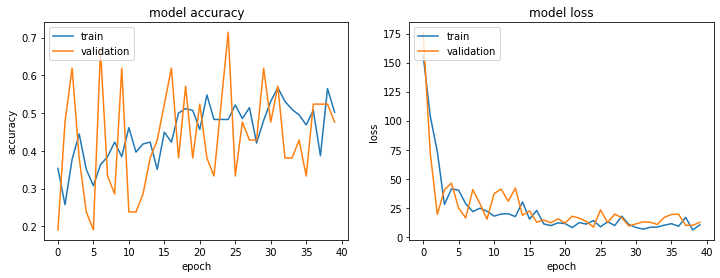

5/5 [==============================] - 0s 1ms/step - loss: 15.4353 - accuracy: 0.3206
Test Loss: 15.435318946838379
Test accuracy: 0.3206106722354889


In [185]:
model_mlp_classif.compile(loss=keras.metrics.categorical_crossentropy, 
                  optimizer=optimizers.Adagrad(), 
                  metrics=['accuracy'])
history64 =model_mlp_classif.fit(X_train64, Y_train,
                      batch_size = 200, epochs=40, verbose=0, 
                      validation_data=(X_validation64,Y_validation))

plt.figure(figsize=(12,4))

# summarize history for accuracy
plt.subplot(1,2,1)
plt.plot(history64.history['accuracy'])
plt.plot(history64.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')

# summarize history for loss
plt.subplot(1,2,2)
plt.plot(history64.history['loss'])
plt.plot(history64.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()


score = model_mlp_classif.evaluate(X_test64, Y_test)
print('Test Loss:', score[0])
print('Test accuracy:', score[1])

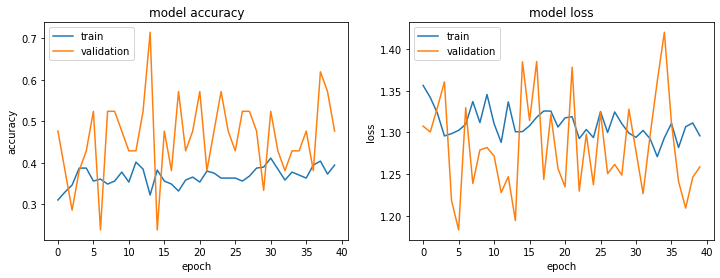

5/5 [==============================] - 0s 1ms/step - loss: 40.5412 - accuracy: 0.3817
Test Loss: 40.54124069213867
Test accuracy: 0.38167938590049744


In [186]:
model_mlp_classif.compile(loss=keras.metrics.categorical_crossentropy, 
                  optimizer=optimizers.Adagrad(), 
                  metrics=['accuracy'])
history = model_mlp_classif.fit(train_loader,
                      batch_size=200, epochs=40, verbose=0, 
                      validation_data=validation_loader)

plt.figure(figsize=(12,4))

# summarize history for accuracy
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')

# summarize history for loss
plt.subplot(1,2,2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.savefig(RES_PATH + "figures/lenet5_learning_rate_fixed")
plt.show()

score = model_mlp_classif.evaluate(X_test_64x64, Y_test)
print('Test Loss:', score[0])
print('Test accuracy:', score[1])

<a id ="section3.2.2"></a>
[back to menu](#menu)

### 3.B.b Le CNN LeNet5 et les paramètres à fixer :
Je reprends donc tous les éléments présentés précédemment pour entraîner le CNN LeNet5. Je propose de découper la construction du modèle en 3 étapes, pour bien comprendre quel paramètre fait quoi, et proposer des set à tester pertinent pour chacun. 

#### La structure du CNN : 
Dans ce modèle de CNN (avec cet enchainement donné de couches), je vais pouvoir faire varier : 
- le nombre de filtres par couche de neuronnes, ils sont stockés dans "n_nodes_dict". Il s'agira pour les couches de convolution du nombre de "formes différentes" à explorer. 
- dans "kernel_size_dict", la taille des noyaux :
    - de convolution : quelle est la taille des "formes" que l'on extrait avec la convolution ? Plus le noyau est grand, plus on prend de pixels pour la convolution, et plus les vignettes de sortie seront petites, et complexes. 
    - de pooling : de combien on réduit la taille des vignettes en sous-échantillonnant ?
On aurait aussi pu modifier la fonction de seuil (ReLu, tanh, ...), l'initialisation des noyaux de convolution (he_uniform), ou encore la fonction d'activation (softmax). 

Remarque : Comme je n'avais pas de critère pour choisir le nombre de noeuds pour la couche dense cachée, j'ai pris un grand nombre pour cette couche (200) et j'ai ajouté une couche de "dropout", je ne suis pas sûre que cela fasse gagner tant de temps de calculs, mais cela me fait un paramètre de moins à fixer. :) (et je trouve beaucoup moins arbitraire de garder n noeuds parce qu'ils apportent tant dans la classif plutôt que de dire je garde n filtres. Après, cela veut dire qu'il faudrait aussi ajuster ce seuil, mais par simplicité je le fixe à 25%. 

In [14]:
def lenet5_model(kernel_size_dict, n_nodes_dict, n_class = 4) : 
    model = Sequential()
    ## C1 : conv 6@28x28
    model.add(Conv2D(filters=n_nodes_dict["C1"], kernel_size=kernel_size_dict["C1"], 
                     activation='relu', kernel_initializer='he_uniform', 
                     input_shape=(64, 64, 1)))
    ## S2 : sampling 6@14x14
    model.add(AveragePooling2D(pool_size=kernel_size_dict["S2"]))
    ## C3 :conv 16@10x10
    model.add(Conv2D(filters=n_nodes_dict["C3"], kernel_size=kernel_size_dict["C3"],
                     activation='relu', kernel_initializer='he_uniform'))
    ## S4 : sampling 16@5x5
    model.add(AveragePooling2D(pool_size=kernel_size_dict["S2"]))
    ## F5 : conv to 1x1 
#     model.add(Conv2D(filters=n_nodes_dict["C3"], kernel_size=kernel_size_dict["C5"], 
#                      activation='relu', kernel_initializer='he_uniform'))
    model.add(Flatten())
    model.add(Dense(units=n_nodes_dict["F5"], 
                    activation='relu', kernel_initializer='he_uniform'))
    ## F6 : fully connected layer -> arbitrary taken at 100, add dropout ? 
    model.add(Dense(units=n_nodes_dict["F6"], 
                    activation='relu', kernel_initializer='he_uniform'))
    ## F6 bis : drop out
    model.add(Dropout(0.25))
    ## F7 : classif :
    model.add(Dense(n_class, activation='softmax'))
    return(model)

kernel_size_dict = {"C1" : (5,5), "S2" : 2, "C3" : (5,5), "S4" : 2}
n_nodes_dict = {"C1" : 6, "C3" : 16, "F5" : 120, "F6" : 200}
model = lenet5_model(kernel_size_dict, n_nodes_dict) 
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 60, 60, 6)         156       
                                                                 
 average_pooling2d (AverageP  (None, 30, 30, 6)        0         
 ooling2D)                                                       
                                                                 
 conv2d_1 (Conv2D)           (None, 26, 26, 16)        2416      
                                                                 
 average_pooling2d_1 (Averag  (None, 13, 13, 16)       0         
 ePooling2D)                                                     
                                                                 
 flatten (Flatten)           (None, 2704)              0         
                                                                 
 dense (Dense)               (None, 120)               3

2021-12-20 09:27:17.971668: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


[passer les explications](#section3.2.3)

#### La compilation : 

Pour comparer les compilations, je triche un peu en appelant l'exécution du modèle, qui sera la dernière étape. Pour ne pas sur-charger cette partie, le modèle est lancé sur un petit nombre de cycles (ici 10), avec très peu d'image pour chaque (50).

Dans les paramètres de compilation c'est surtout l'optimiseur que je vais faire varier. On pourrait choisir une descente de gradient stochastique et faire varier le taux d'apprentissage comme suit :   

In [188]:
model.compile(loss=keras.metrics.categorical_crossentropy, 
              optimizer=optimizers.SGD(), 
              metrics=['accuracy'])
h = model.fit(train_loader,#X_train, Y_train, 
          batch_size=50, epochs=10, verbose=1, 
          validation_data=validation_loader)#(x_validation, y_validation))
# h = model.fit(X_train_64x64, Y_train, 
#           batch_size=200, epochs=10, verbose=1, 
#           validation_data=(X_validation_64x64, Y_validation))

Epoch 1/10
13/13 [==============================] - 1s 39ms/step - loss: 1.9429 - accuracy: 0.2812 - val_loss: 1.3831 - val_accuracy: 0.4762
Epoch 2/10
13/13 [==============================] - 0s 34ms/step - loss: 1.4176 - accuracy: 0.2692 - val_loss: 1.3772 - val_accuracy: 0.2857
Epoch 3/10
13/13 [==============================] - 0s 32ms/step - loss: 1.3720 - accuracy: 0.3077 - val_loss: 1.3196 - val_accuracy: 0.5714
Epoch 4/10
13/13 [==============================] - 0s 32ms/step - loss: 1.3902 - accuracy: 0.3077 - val_loss: 1.3393 - val_accuracy: 0.3333
Epoch 5/10
13/13 [==============================] - 1s 39ms/step - loss: 1.3617 - accuracy: 0.3173 - val_loss: 1.2632 - val_accuracy: 0.5714
Epoch 6/10
13/13 [==============================] - 0s 31ms/step - loss: 1.3659 - accuracy: 0.3365 - val_loss: 1.4731 - val_accuracy: 0.3333
Epoch 7/10
13/13 [==============================] - 0s 30ms/step - loss: 1.3490 - accuracy: 0.3486 - val_loss: 1.2767 - val_accuracy: 0.4762
Epoch 8/10
13

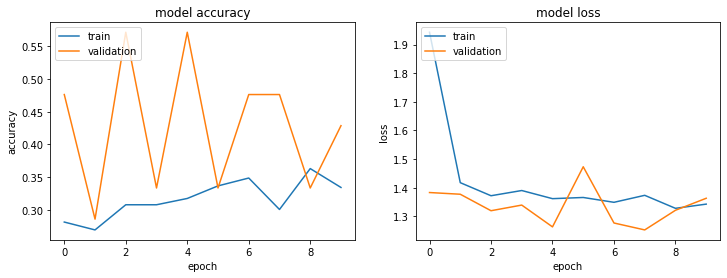

In [189]:
plt.figure(figsize=(12,4))

# summarize history for accuracy
plt.subplot(1,2,1)
plt.plot(h.history['accuracy'])
plt.plot(h.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')

# summarize history for loss
plt.subplot(1,2,2)
plt.plot(h.history['loss'])
plt.plot(h.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [191]:
score = model.evaluate(X_test_64x64, Y_test)
print('Test Loss:', score[0])
print('Test accuracy:', score[1])

5/5 [==============================] - 0s 6ms/step - loss: 54.5924 - accuracy: 0.2977
Test Loss: 54.592403411865234
Test accuracy: 0.2977099120616913


Voyons ce que cela change en remplaçant par l'optimiseur Adam :

In [ ]:
model.compile(optimizer="adam",loss='categorical_crossentropy', metrics=['accuracy'])

h = model.fit(train_loader,#X_train, Y_train, 
          batch_size=50, epochs=10, verbose=2, 
          validation_data=validation_loader)#(x_validation, y_validation))

plt.figure(figsize=(12,4))

# summarize history for accuracy
plt.subplot(1,2,1)
plt.plot(h.history['accuracy'])
plt.plot(h.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')

# summarize history for loss
plt.subplot(1,2,2)
plt.plot(h.history['loss'])
plt.plot(h.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

score = model.evaluate(test_loader)
print('Test Loss:', score[0])
print('Test accuracy:', score[1])

Dans les deux cas, on a une classification qui est à peine plus bonne que le hasard (qui est à 0.25) ... 
D'autres optimiseurs existents, tels que Adagrad
<!-- Effectivement, cet optimiseur donne une accuracy sur l'ensemble de test nettement meilleure, pour le même nombre d'itérations sur cet exemple jouet.`-->
Il sera intéressant de voir si avec un plus grand nombre d'itérations, cet optimiseur donne de beaucoup des meilleures performances.  

Pour cet exemple jouet, je vais me concentrer sur ce gradient stochastique, dont un paramètre important va être à choisir, le taux d'apprentissage. Il correspond à la pente minimale, appelé "gain", à partir de laquelle l'itération est acceptée comme bonne. Il y a deux structures possibles pour cette entrée :
- soit un float, qui est donc le seuil en question
- soit un "[schedule](https://www.tensorflow.org/api_docs/python/tf/keras/optimizers/schedules/LearningRateSchedule)", un objet de tensorflow dans lequel est enregistré les différents cycles et les taux associés pour faire un apprentissage adaptatif. 


In [194]:
from tensorflow.keras.optimizers import schedules

step = tf.Variable(0, trainable=False)
boundaries = [20,40]
values = [1e-1, 1e-2, 1e-3]
lr_schedule = schedules.PiecewiseConstantDecay(boundaries, values, "PiecewiseConstant")
# tf.keras.optimizers.schedules.serialize(lr_schedule)

optimizer_dict = {"sgd_2" : optimizers.SGD(learning_rate=2e-1), 
                  "sgd_01" : optimizers.SGD(learning_rate=1e-2),
                  "sgd_adapt20" : optimizers.SGD(learning_rate=lr_schedule)
                 }

[Cet article](https://towardsdatascience.com/learning-rate-schedules-and-adaptive-learning-rate-methods-for-deep-learning-2c8f433990d1) détaille les méthodes à pas adaptatif. Entre autre, plutôt que d'utiliser un SDG avec un "schedule", des méthodes avec un pas adaptatif sont aussi disponibles dans keras, telles que Adagrad, Adadelta, RMSprop ou Adam, qui ont toutes des paramètres à fixer.

#### Exécution du modèle
Enfin, dans la troisième étape, il va falloir choisir : 
- la taille des batch, c'est-à-dire combien d'images sont progagées dans le réseau à chaque cycle
- epoch : combien de cycles on fait 

Ce serait aussi cette appel que l'on aurait à répéter si on avait mis en place une cross-validation. 

TODO : Voir si le schedule du compile est compatible avec le epoch de fit ... 

<a id ="section3.2.3"></a>
[back to menu](#menu)

### 3.B.c Optimisation des paramètres

Ainsi, il faut tester différentes valeurs pour chacun de ces paramètres. Je vais enregistrer les valeurs à tester dans des dictionnaires de listes, et répéter l'apprentissage autant de fois qu'il y a de combinaison de ces paramètres. Chaque réseau entraîné sera alors sauvegardé dans un fichier. Pour éviter des affichages à rallonge, je vais passer le paramètre "verbose" de model.fit à 0 (aucun affichage). Par ailleurs cette cellule ne va pas être lancée plusieurs fois, je vais donc la commenter. 


Pour alléger les calculs et gagner du temps sur ce projet, je suis partie sur des images en noir et blanc (deux dimensions de moins, ça fait 3 fois moins de calculs !), avec pré-process et data-augmentation. Il faudrait lancer de nouveau ce choix de paramètres sur les données non pre-traitées et sans augmentation pour comparer les modèles de façon rigoureuse. 

#### Choix des paramètres à optimiser

Voilà les boucles pour construire les différents modèles : 

In [73]:
## loop to construct possible dictionnaries for layers architecture : 
kernel_size_dict = {"C1" : (5,5), "S2" : 2, "C3" : (5,5), "S4" : 2}
architecture_sets_list_kernel_dict = []
for kernel_size in [(3,3), (5,5), (7,7)] :
    kernel_size_dict["C1"]  = kernel_size
    kernel_size_dict["C3"]  = kernel_size
    architecture_sets_list_kernel_dict.append(kernel_size_dict.copy())
        
n_nodes_dict = {"C1" : 6, "C3" : 16, "F5" : 120, "F6" : 200}
architecture_sets_list_n_nodes_dict = []
for n_C1 in [3,6,12] : 
    n_nodes_dict["C1"] = n_C1
    for n_C3 in [8,16,32]:
        n_nodes_dict["C3"] = n_C3
        for n_F5 in [20, 50, 100] :
            n_nodes_dict["F5"] = n_F5
            architecture_sets_list_n_nodes_dict.append(n_nodes_dict.copy()) 

Les downsampling ne peuvent diminuer de plus de 2 la taille, en partant d'images en 64x64, on n'a pas assez de pixels ! C'est pour cela que j'ai directement retiré cette boucle. 

Les différents compilateurs : 

In [74]:
step = tf.Variable(0, trainable=False)
boundaries = [20,40]
values = [1e-1, 1e-2, 1e-3]
lr_schedule = schedules.PiecewiseConstantDecay(boundaries, values, "PiecewiseConstant")
# tf.keras.optimizers.schedules.serialize(lr_schedule)

optimizer_dict = {"sgd_2" : optimizers.SGD(learning_rate=2e-1), 
                  "sgd_01" : optimizers.SGD(learning_rate=1e-2),
                  "sgd_adapt20" : optimizers.SGD(learning_rate=lr_schedule)
                 }

Après coup, c'est peut-être plus simple de rester avec un adagrad ou adam ... c'est toujours un paramètre de moins à fixer. Pour avoir testé différentes config, AdaGrad donne de meilleures performances sur ce réseau LeNet5 :

In [75]:
optimizer_dict = {"adam" : optimizers.Adam(),
                  "adagrad" : optimizers.Adagrad()
                 }

Pour enregistrer la progression des modèles, les [tensorflow checkpoint] sont assez simple à utiliser :

In [203]:
model = lenet5_model(kernel_size_dict,n_nodes_dict) 
optimizer = optimizer_dict["adam"] 

checkpoint_path = RES_PATH + "CNN_test_checkpoint/" +"cp.ckpt"
checkpoint_dir = os.path.dirname(checkpoint_path)

# Create a callback that saves the model's weights
cp_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,
                                                 save_weights_only=True,
                                                 verbose=1)
model.compile(optimizer=optimizer, 
              loss='categorical_crossentropy', metrics=['accuracy'])
h = model.fit(train_loader,
          batch_size=200, epochs=10, verbose=1, 
          validation_data=validation_loader,
             callbacks=[cp_callback])


Epoch 1/10
13/13 [==============================] - ETA: 0s - loss: 1.5880 - accuracy: 0.2788
Epoch 00001: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_test_checkpoint/cp.ckpt
13/13 [==============================] - 1s 39ms/step - loss: 1.5880 - accuracy: 0.2788 - val_loss: 1.2547 - val_accuracy: 0.5714
Epoch 2/10
13/13 [==============================] - ETA: 0s - loss: 1.3927 - accuracy: 0.3077
Epoch 00002: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_test_checkpoint/cp.ckpt
13/13 [==============================] - 1s 41ms/step - loss: 1.3927 - accuracy: 0.3077 - val_loss: 1.3309 - val_accuracy: 0.5714
Epoch 3/10
13/13 [==============================] - ETA: 0s - loss: 1.3457 - accuracy: 0.3389
Epoch 00003: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_test_checkpoint/cp.ckpt
13/13 [==============================] - 1s 45ms/step - loss: 1.3457 - accuracy: 0.3389 - val_loss: 1.3172 - val_accuracy: 0.4762
Epoch 4

In [208]:
# Save every epochs :
checkpoint_path=RES_PATH+"CNN_test_checkpoint/"
filename = checkpoint_path + "weights-improvement-{epoch:02d}-{val_accuracy:.2f}.hdf5"
checkpoint = tf.keras.callbacks.ModelCheckpoint(filename, monitor='val_accuracy', 
                             verbose=1, save_best_only=False, mode='max')
callbacks_list = [checkpoint]
model.fit(train_loader, validation_data=validation_loader, epochs=150, batch_size=10, callbacks=callbacks_list, verbose=0)


Epoch 00001: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_test_checkpoint/weights-improvement-01-0.62.hdf5

Epoch 00002: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_test_checkpoint/weights-improvement-02-0.52.hdf5

Epoch 00003: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_test_checkpoint/weights-improvement-03-0.33.hdf5

Epoch 00004: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_test_checkpoint/weights-improvement-04-0.52.hdf5

Epoch 00005: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_test_checkpoint/weights-improvement-05-0.52.hdf5

Epoch 00006: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_test_checkpoint/weights-improvement-06-0.52.hdf5

Epoch 00007: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_test_checkpoint/weights-improvement-07-0.43.hdf5

Epoch 00008: saving model to /home/clairegayral/Documents/openclassr


Epoch 00063: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_test_checkpoint/weights-improvement-63-0.48.hdf5

Epoch 00064: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_test_checkpoint/weights-improvement-64-0.57.hdf5

Epoch 00065: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_test_checkpoint/weights-improvement-65-0.48.hdf5

Epoch 00066: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_test_checkpoint/weights-improvement-66-0.48.hdf5

Epoch 00067: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_test_checkpoint/weights-improvement-67-0.52.hdf5

Epoch 00068: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_test_checkpoint/weights-improvement-68-0.48.hdf5

Epoch 00069: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_test_checkpoint/weights-improvement-69-0.52.hdf5

Epoch 00070: saving model to /home/clairegayral/Documents/openclassr


Epoch 00125: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_test_checkpoint/weights-improvement-125-0.57.hdf5

Epoch 00126: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_test_checkpoint/weights-improvement-126-0.57.hdf5

Epoch 00127: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_test_checkpoint/weights-improvement-127-0.48.hdf5

Epoch 00128: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_test_checkpoint/weights-improvement-128-0.52.hdf5

Epoch 00129: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_test_checkpoint/weights-improvement-129-0.71.hdf5

Epoch 00130: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_test_checkpoint/weights-improvement-130-0.29.hdf5

Epoch 00131: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_test_checkpoint/weights-improvement-131-0.33.hdf5

Epoch 00132: saving model to /home/clairegayral/Documents/ope

Ok, il est temps de faire des grosses boucles pour tester ces différents sets. [Cette lecture](https://cs231n.github.io/neural-networks-3/) permet de revoir les différentes étapes.

In [31]:
batch_size_list = [20,50,100,200]
epoch_list = [10,20,50,100]

set_counter = 1
## remove unmatching sets : 
sets_dict = {}
for kernel_size_dict in architecture_sets_list_kernel_dict :
    for n_nodes_dict in architecture_sets_list_n_nodes_dict :
        try:
            model = lenet5_model(kernel_size_dict, n_nodes_dict) 
        except ValueError:
            print("remove", kernel_size_dict,n_nodes_dict )
        ## compile
        model.compile(optimizer = "adam", 
                     loss='categorical_crossentropy',
                     metrics=['accuracy'])
        ## fit 
        for batch_size in batch_size_list :
            for epoch in epoch_list :
                ## save params set : 
                fit_set = {"batch_size" : batch_size,
                           "epoch" : epoch}

                set_name = "set_" + str(set_counter)
                sets_dict[set_name] = {"kernel_size_dict" : kernel_size_dict.copy(),
                                       "n_nodes_dict" : n_nodes_dict.copy(),
                                       "fit_set" : fit_set.copy()}
#                 ## init checkpoint : 
#                 checkpoint_path = RES_PATH + "CNN_train_v1/"+ set_name + "/cp.ckpt"
#                 checkpoint_dir = os.path.dirname(checkpoint_path)

#                 # Create a callback that saves the model's weights
#                 cp_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,
#                                                                  save_weights_only=True,
#                                                                  verbose=1)
#                 try:
#                      model.fit(train_loader, 
#                               batch_size=batch_size, epochs=epoch,
#                               verbose=2, callbacks=[cp_callback],
#                               validation_data=validation_loader)

#                 except ValueError:
#                     #             print()
#                     print("\t remove", batch_size, epoch  )
                set_counter += 1

#### Analyse optimisation 1 
Quels sont les résultats ? 

In [32]:
## get dict where ok :
launched_models = {}
for set_name in os.listdir(RES_PATH + "CNN_train_v1/"):
    launched_models[set_name] =  sets_dict[set_name]

In [34]:
## call results and save the metrics on test set : 
res = pd.DataFrame()
for set_name in os.listdir(RES_PATH + "CNN_train_v1/"):
    checkpoint_path = RES_PATH + "CNN_train_v1/"+ set_name + "/cp.ckpt"
    d = launched_models[set_name]
    kernel_size_dict = d["kernel_size_dict"]
    n_nodes_dict =  d["n_nodes_dict"]
    model = lenet5_model(kernel_size_dict, n_nodes_dict)
    model.compile(optimizer="adam",loss='categorical_crossentropy',
                  metrics=["accuracy"])
    try : 
        model.load_weights(checkpoint_path).expect_partial()
        loss, acc = model.evaluate(test_loader, verbose=0)
        
        ## res metrics : 
        res.loc[set_name, "loss"] = loss
        res.loc[set_name, "accuracy"] = acc
        ## res params :
        res.loc[set_name, "k_size"] = d["kernel_size_dict"]["C1"][0]
        res.loc[set_name, "nodes_C1"] = d["n_nodes_dict"]["C1"]
        res.loc[set_name, "nodes_C3"] = d["n_nodes_dict"]["C3"]
        res.loc[set_name, "nodes_F5"] = d["n_nodes_dict"]["F5"]
        res.loc[set_name, "nodes_F6"] = d["n_nodes_dict"]["F6"]
        res.loc[set_name, "batch_size"] = d["fit_set"]["batch_size"]
        res.loc[set_name, "epoch"] = d["fit_set"]["epoch"]
        
    except ValueError:
        print()
        print("kernel", d["kernel_size_dict"]["C1"][0],
              ", nodes_C1", d["n_nodes_dict"]["C1"],
              ", nodes_C3", d["n_nodes_dict"]["C3"],
              ", nodes_F5", d["n_nodes_dict"]["F5"], 
              ", nodes_F6", d["n_nodes_dict"]["F6"], 
              ", batch_size", d["fit_set"]["batch_size"],
              ", epoch", d["fit_set"]["epoch"], "\n")

        
# res.loc[:,"optimizer_lr"] = res.optimizer_lr.round(4)
# res.loc[:,"optimizer_lr"] = res.optimizer_lr.fillna("adaptative")

In [36]:
# res.to_csv(RES_PATH+"res_training_CNN1.csv")
res = pd.read_csv(RES_PATH+"res_training_CNN1.csv", index_col=0)
res = res.reset_index()
res.describe()

,level_0,loss,accuracy,k_size,nodes_C1,nodes_C3,nodes_F5,nodes_F6,batch_size,epoch
count,1296.000000,1296.000000,1296.000000,1296.000000,1296.000000,1296.000000,1296.000000,1296.0,1296.000000,1296.000000
mean,647.500000,1.275898,0.409045,5.000000,7.000000,18.666667,56.666667,200.0,92.500000,45.000000
std,374.267284,0.039756,0.039776,1.633624,3.743102,9.981605,33.011055,0.0,68.354628,35.013511
min,0.000000,1.183358,0.236641,3.000000,3.000000,8.000000,20.000000,200.0,20.000000,10.000000
25%,323.750000,1.249109,0.389313,3.000000,3.000000,8.000000,20.000000,200.0,42.500000,17.500000
50%,647.500000,1.270362,0.412214,5.000000,6.000000,16.000000,50.000000,200.0,75.000000,35.000000
75%,971.250000,1.295969,0.435115,7.000000,12.000000,32.000000,100.000000,200.0,125.000000,62.500000
max,1295.000000,1.450802,0.549618,7.000000,12.000000,32.000000,100.000000,200.0,200.000000,100.000000


La première chose très étonnante est l'entopie très peu variante (chouette on n'a pas à la tracer), et basse : les modèles sont au maximum de ce que les images permettre de dire avec cette perte. 
Ensuite, je n'ai pas fait varier le nombre de noeuds dans F6 (car j'ai ajouté une couche de dropout). 

<!-- Certains paramètres ne tournent pas quand on les modifie, ceux dont l'écart-type de la description statistique ci-dessus est nulle (std = 0 => 1 seule valeur pour ce paramètre => le modèle créait une erreur, et donc ne passait pas le try)
 -->
 
Comment les résultats varient selon les paramètres d'exécution ? 
Je ne regarde que l'accuracy comme la perte est nulle de partout. 

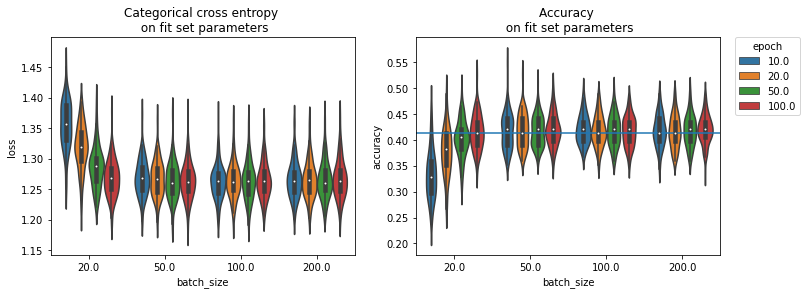

In [42]:
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
sns.violinplot(y="loss", x="batch_size", hue="epoch", data=res)
plt.title("Categorical cross entropy \n on fit set parameters")
plt.legend("",frameon=False)

plt.subplot(1,2,2)
sns.violinplot(y="accuracy", x="batch_size", hue="epoch", data=res)
plt.title("Accuracy \n on fit set parameters")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., title= "epoch")
plt.axhline(y=res.accuracy.median())
plt.show()

L'idée est qu'avec un taux d'apprentissage et une taille de batch très petits, et un nombre de cycle grand, on risque de sur-apprendre les images. Mais comme ici les deux métriques sont données sur l'ensemble "test", il faut choisir le set qui minimise la perte entropique et maximise l'accuracy. Il faut aussi prendre en compte le fait que plus on prend un grand nombre d'image et d'itération, le plus c'est long et cher en calculs.

Les deux graphiques précédents nous donnent déjà beaucoup d'information : 
* plus la taille de batch est grande, plus la prédiction est stable (petite variance) et est bonne (loss petite, accuracy grande)
<!-- * Je fixe donc la taille de batch à 50 -->
* Le nombre de cycle (epoch) n'a pas une tendance aussi marquée, mais de façon générale, les prédictions ne sont pas meilleurs avec plus de cycles que 20. Je pense que cela est lié à un sur-apprentissage (d'autant que la taille de batch est grande).Cette hypothèse est facilement vérifiée en prenant les petits batchs :


La ligne facilite la comparaison entre les groupes. Elle correspond à la valeur médiane.


Les résultats semblent moins dispersés avec certains sets :
* batch_size = 50, 
* epoch = 20

Ne gardons que ces paramètres pour la suite 

Faisons varier la taille des noyaux de convolution, ainsi que le nombre de filtre de convolution pour les deux couches concernées :

In [38]:
res1 = res[res.batch_size == 50]
res1 = res1[res1.epoch == 20]

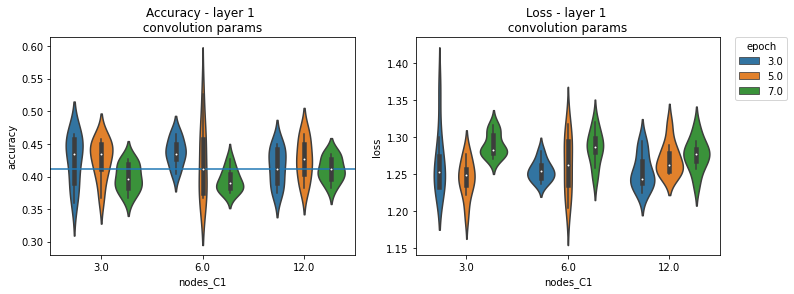

In [47]:
plt.figure(figsize=(12,4))
palette = sns.color_palette("tab10", len(res1.k_size.unique()))

plt.subplot(1,2,1)
sns.violinplot(y="accuracy", x="nodes_C1", hue="k_size", data=res1, palette=palette)
plt.title("Accuracy - layer 1 \n convolution params ")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., title= "epoch")
plt.axhline(y=res1.accuracy.median())
plt.legend("",frameon=False)

plt.subplot(1,2,2)
sns.violinplot(y="loss", x="nodes_C1", hue="k_size", data=res1, palette=palette)
plt.title("Loss - layer 1 \n convolution params ")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., title= "epoch")

plt.show()

In [54]:
res2 = res1[res1.nodes_C1 == 3]
# res2 = res2[res2.k_size == 5]

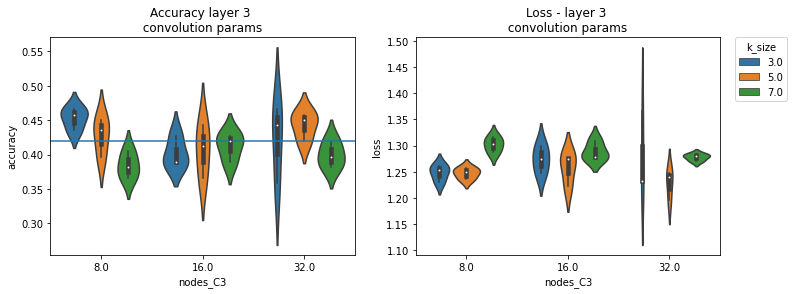

In [55]:
plt.figure(figsize=(12,4))
palette = sns.color_palette("tab10", len(res2.k_size.unique()))

plt.subplot(1,2,1)
sns.violinplot(y="accuracy", x="nodes_C3", hue="k_size", data=res2, palette=palette)
plt.axhline(y=res2.accuracy.median())
plt.title("Accuracy layer 3 \n convolution params ")
plt.legend("",frameon=False)

plt.subplot(1,2,2)
sns.violinplot(y="loss", x="nodes_C3", hue="k_size", data=res2, palette=palette)
plt.title("Loss - layer 3 \n convolution params ")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., title= "k_size")

plt.show()

L'accuracy est un peu plus grande avec k_size = 3, 6 filtres pour la première couche, et 8 filtres pour la deuxième couche de convolution 

In [56]:
res2 = res1[res1.nodes_C1 == 3]
res2 = res2[res2.nodes_C3 == 8]
res2 = res2[res2.k_size == 3]

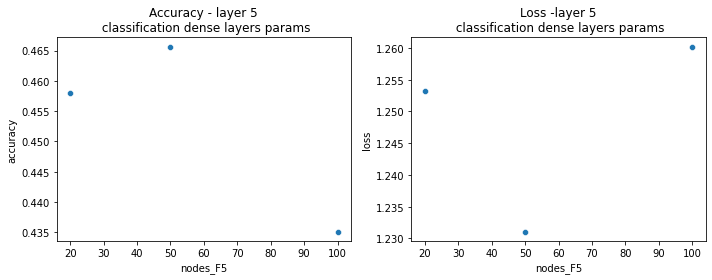

In [59]:
plt.figure(figsize=(10,4))

palette = sns.color_palette("tab10", len(res2.k_size.unique()))

plt.subplot(1,2,1)
sns.scatterplot(y="accuracy", x="nodes_F5", data=res2)
plt.title("Accuracy - layer 5\n classification dense layers params")
plt.legend("",frameon=False)

plt.subplot(1,2,2)
sns.scatterplot(y="loss", x="nodes_F5", data=res2)
plt.title("Loss -layer 5\n classification dense layers params")

plt.tight_layout()
plt.show()

La meilleure configuration semble être : 

* batch_size = 50
* epoch = 20
* nodes_C1 = 3
* nodes_C3 = 8
* nodes_F5 = 50
* k_size = 3
* optimizer = Adam 

Je garderai les tailles des couches de convolution et le noyau de convolution fixes. 

Je lance ce modèle : 

In [78]:
## test the model :
batch_size = 50
epoch = 50
nodes_C1 = 3
nodes_C3 = 8
nodes_F5 = 50
k_size = 3

kernel_size_dict = {"C1" : (k_size,k_size), "S2" : 2,
                    "C3" : (k_size,k_size), "S4" : 2, 
                    "F5" : (k_size,k_size)}
n_nodes_dict = {"C1" : nodes_C1, "C3" : nodes_C3, "F5" : nodes_F5, "F6" : 200}

model = lenet5_model(kernel_size_dict, n_nodes_dict) 
## compile
model.compile(optimizer = "adagrad", 
             loss='categorical_crossentropy',
             metrics=['accuracy'])
## fit 
h = model.fit(train_loader, 
          batch_size=batch_size, epochs=epoch,
          verbose=2, 
          validation_data=validation_loader)

Epoch 1/50
13/13 - 1s - loss: 1.4339 - accuracy: 0.2188 - val_loss: 1.4028 - val_accuracy: 0.3333 - 583ms/epoch - 45ms/step
Epoch 2/50
13/13 - 0s - loss: 1.4131 - accuracy: 0.2572 - val_loss: 1.3804 - val_accuracy: 0.2857 - 263ms/epoch - 20ms/step
Epoch 3/50
13/13 - 0s - loss: 1.3934 - accuracy: 0.2716 - val_loss: 1.3721 - val_accuracy: 0.2857 - 272ms/epoch - 21ms/step
Epoch 4/50
13/13 - 0s - loss: 1.4008 - accuracy: 0.2837 - val_loss: 1.3663 - val_accuracy: 0.2857 - 275ms/epoch - 21ms/step
Epoch 5/50
13/13 - 0s - loss: 1.4174 - accuracy: 0.2308 - val_loss: 1.3619 - val_accuracy: 0.3333 - 266ms/epoch - 20ms/step
Epoch 6/50
13/13 - 0s - loss: 1.3939 - accuracy: 0.2885 - val_loss: 1.3681 - val_accuracy: 0.3333 - 277ms/epoch - 21ms/step
Epoch 7/50
13/13 - 0s - loss: 1.3975 - accuracy: 0.2668 - val_loss: 1.3583 - val_accuracy: 0.3333 - 281ms/epoch - 22ms/step
Epoch 8/50
13/13 - 0s - loss: 1.3934 - accuracy: 0.2764 - val_loss: 1.3637 - val_accuracy: 0.3333 - 284ms/epoch - 22ms/step
Epoch 9/

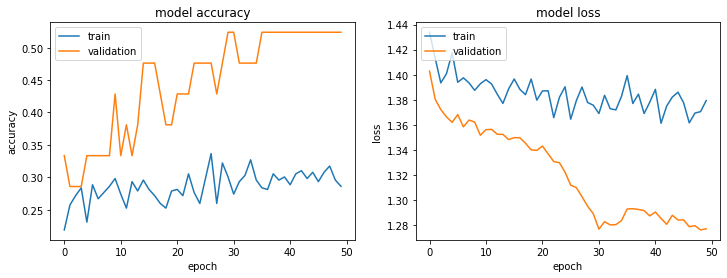

In [79]:
plt.figure(figsize=(12,4))

# summarize history for accuracy
plt.subplot(1,2,1)
plt.plot(h.history['accuracy'])
plt.plot(h.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')

# summarize history for loss
plt.subplot(1,2,2)
plt.plot(h.history['loss'])
plt.plot(h.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

L'accuracy semble basse ... mais dans un modèle de classification à 4 classes, le random donne une accuracy à 25%. On est déjà mieux que l'aléatoire :

In [15]:
## chech accuracy for random 4-class classification :
pred =  np.random.choice([1,2,3,4], size=10000, p=[0.25,0.25,0.25,0.25])
true =  np.random.choice([1,2,3,4], size=10000, p=[0.25,0.25,0.25,0.25])
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

# confusion_matrix(y_pred=pred, y_true=true)
print(classification_report(y_pred=pred, y_true=true))

              precision    recall  f1-score   support

           1       0.26      0.24      0.25      2582
           2       0.26      0.26      0.26      2527
           3       0.24      0.25      0.24      2478
           4       0.24      0.25      0.24      2413

    accuracy                           0.25     10000
   macro avg       0.25      0.25      0.25     10000
weighted avg       0.25      0.25      0.25     10000



#### Les paramètres pertinents avec plus de valeurs possibles - optimisation v2

Maintenant que les paramètres influents ont été pré-sélectionnés, il faudrait les faire varier un peu plus finement, pour les choisir de façon pertinente. Je fixe la structure (nombre de noeuds, taille du noyau de convolution), et je fais varier : 
* la taille de batch
* le nombre de cycles
* la variation du taux d'apprentissage

In [56]:
batch_size = 50
epoch = 50
nodes_C1 = 3
nodes_C3 = 8
nodes_F5 = 50
k_size = 3

## execution params :
batch_size_list = [40,50,60]
epoch_list = [25,50,75] ## penser au early stopping
lr_list = [1,0.1,0.01]

## init 
kernel_size_dict = {"C1" : (k_size,k_size), "S2" : 2,
                    "C3" : (k_size,k_size), "S4" : 2}
n_nodes_dict = {"C1" : nodes_C1, "C3" : nodes_C3, 
                "F5" : nodes_F5, "F6" : 200}
set_counter = 1
sets_dict = {}
## architecture set :
for epoch in epoch_list :
    for batch_size in batch_size_list :
        for lr in lr_list: 
            for iteration in range(5) :
                ## repeat 5 times for each set
                ## save params set : 
                fit_set = {"batch_size" : batch_size,
                           "epoch" : epoch,
                            "lr": lr}
                set_name = "set_" + str(set_counter)
                sets_dict[set_name] = {"kernel_size_dict" : kernel_size_dict.copy(),
                                       "n_nodes_dict" : n_nodes_dict.copy(),
                                       "fit_set" : fit_set.copy()}
                ## init checkpoint : 
                checkpoint_path = RES_PATH + "CNN_trainv2/"+ set_name + "/cp.ckpt"
                checkpoint_dir = os.path.dirname(checkpoint_path)

                # Create a callback that saves the model's weights
                cp_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,
                                                                 save_weights_only=True,
                                                                 verbose=0)
#                 try:
#                     model = lenet5_model(kernel_size_dict, n_nodes_dict)
#                     optimizer = keras.optimizers.Adagrad(learning_rate=tf.Variable(lr))#,
# #                                                          initial_accumulator_value=tf.Variable(0.1), 
# #                                                          epsilon=tf.Variable(1e-07))
#                     model.compile(optimizer = optimizer,
#                                   loss='categorical_crossentropy',
#                                    metrics=['accuracy'])
#                     ## call the flow here to specify batch size
#                     model.fit(datagen_train.flow(X_train_64x64, Y_train, 
#                                                  batch_size=batch_size), 
#                               epochs=epoch,
#                               verbose=2, callbacks=[cp_callback],
#                               validation_data=datagen_validation.flow(X_validation_64x64, Y_validation))

#                 except ValueError:
#                     print("\t remove", batch_size, epoch  )
                set_counter += 1

J'appelle les modèles pour tracer les graphiques :

In [64]:
res = pd.DataFrame()
for set_name in os.listdir(RES_PATH + "CNN_trainv2/"):
    checkpoint_path = RES_PATH + "CNN_trainv2/"+ set_name + "/cp.ckpt"
    d = sets_dict[set_name]
    kernel_size_dict = d["kernel_size_dict"]
    n_nodes_dict =  d["n_nodes_dict"]
    lr = d["fit_set"]["lr"]

    model = lenet5_model(kernel_size_dict, n_nodes_dict)
    optimizer = keras.optimizers.Adagrad(lr)
    model.compile(optimizer=optimizer,
                  loss='categorical_crossentropy', metrics=["accuracy"])
    try : 
        model.load_weights(checkpoint_path)
#         loss, acc = model.evaluate(X_test_64x64, Y_test, verbose=1)
        loss, acc = model.evaluate(datagen_test.flow(X_test_64x64, Y_test), verbose=1)

        ## res metrics : 
        res.loc[set_name, "loss"] = loss
        res.loc[set_name, "accuracy"] = acc
        ## res params :
        res.loc[set_name, "batch_size"] = d["fit_set"]["batch_size"]
        res.loc[set_name, "epoch"] = d["fit_set"]["epoch"]
        res.loc[set_name, "lr"] = d["fit_set"]["lr"]
        
    except ValueError:
        print()
        print("batch_size", d["fit_set"]["batch_size"], #"\n"
              ", epoch", d["fit_set"]["epoch"], #"\n",
              ", lr", d["fit_set"]["lr"], "\n")
# res.to_csv(RES_PATH+"res_training_CNN2.csv")


5/5 [==============================] - 0s 5ms/step - loss: 1.2226 - accuracy: 0.4656


5/5 [==============================] - 0s 7ms/step - loss: 1.3443 - accuracy: 0.3740


5/5 [==============================] - 0s 6ms/step - loss: 1.2368 - accuracy: 0.4275


5/5 [==============================] - 0s 7ms/step - loss: 1.2131 - accuracy: 0.4351


5/5 [==============================] - 0s 5ms/step - loss: 1.3844 - accuracy: 0.2901


5/5 [==============================] - 0s 10ms/step - loss: 1.3837 - accuracy: 0.2901


In [139]:
res = pd.read_csv(RES_PATH+"res_training_CNN2.csv", index_col=0)
res.describe()

,loss,accuracy,batch_size,epoch,lr
count,135.000000,135.000000,135.000000,135.000000,135.000000
mean,1.304787,0.370823,50.000000,50.000000,0.370000
std,0.067801,0.068471,8.195375,20.488439,0.448655
min,1.172062,0.236641,40.000000,25.000000,0.010000
25%,1.251543,0.290076,40.000000,25.000000,0.010000
50%,1.276046,0.396947,50.000000,50.000000,0.100000
75%,1.383883,0.427481,60.000000,75.000000,1.000000
max,1.499594,0.519084,60.000000,75.000000,1.000000


Comme précédemment, regardons de façon globale comment évolue les deux métriques (perte entropique de classification et accuracy), en fonction des paramètres d'éxécution. Comme on n'a que 3 paramètres, les deux graphiques résument les résultats. Il y a 5 entrainements pour le même set de paramètres, donc la dispersion ici est particulièrement importante à regarder.

<Figure size 1080x1080 with 0 Axes>

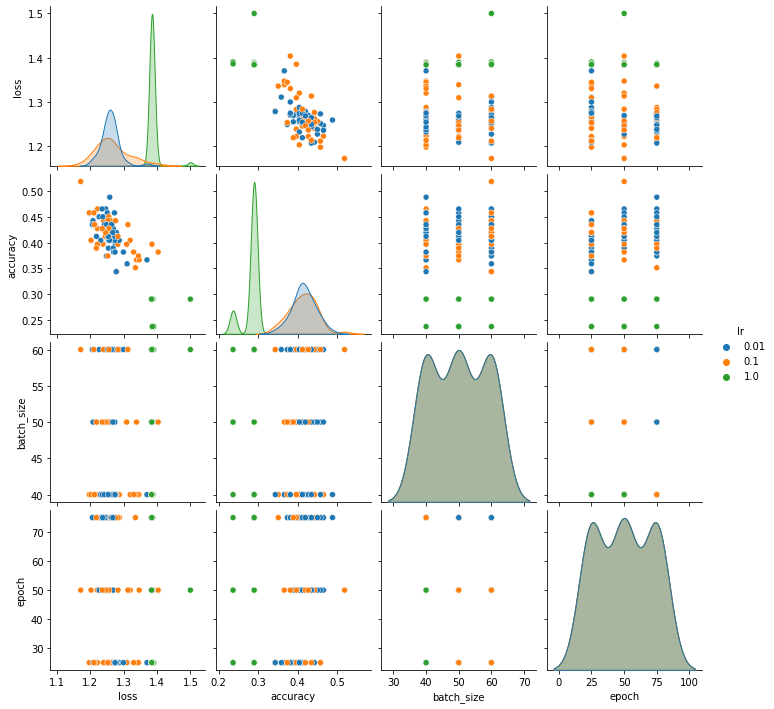

In [81]:
plt.figure(figsize=(15,15))
palette = sns.color_palette("tab10", len(res.lr.unique()))
sns.pairplot(data=res[["loss","accuracy","batch_size","epoch","lr"]], hue= "lr",
             kind="scatter", palette=palette)
plt.show()

L'accuracy et la perte sont mauvaises pour un learning rate à 1. Pour un learning rate à 0.01, la dispersion est grande : on a surement commencé à sur-apprendre. On gardera donc lr = 0.1. 

<Figure size 1080x1080 with 0 Axes>

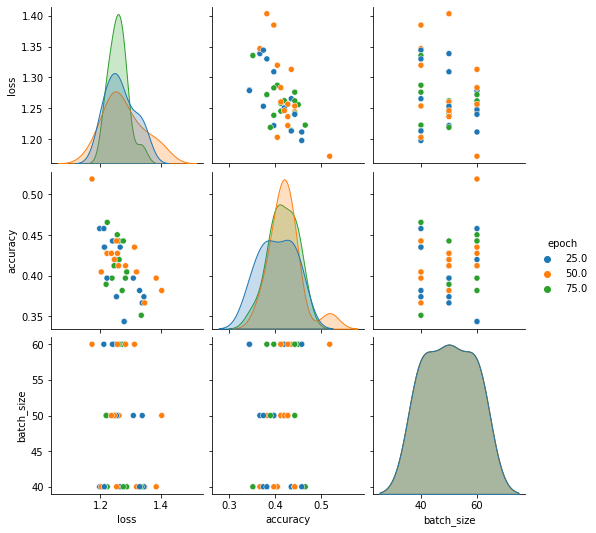

In [93]:
res1 = res[res.lr == 0.1]

plt.figure(figsize=(15,15))
palette = sns.color_palette("tab10", len(res.epoch.unique()))
sns.pairplot(data=res1[["loss","accuracy","batch_size","epoch"]], hue= "epoch",
             kind="scatter", palette=palette)
plt.show()

Cette vue est un peu compliquée à analyser en détail. Retournons sur une représentation en 2D :

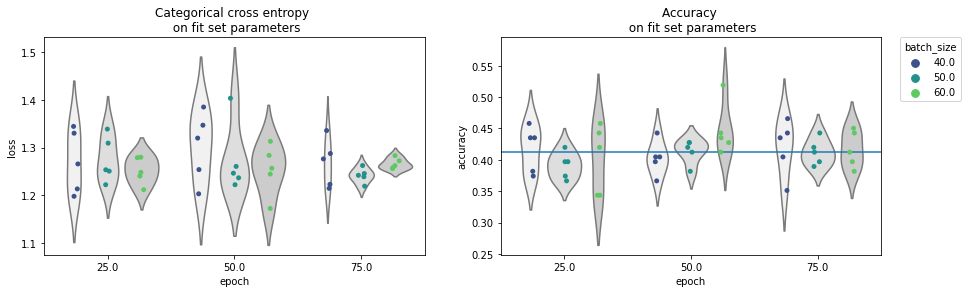

In [128]:
plt.figure(figsize=(15,4))
plt.subplot(1,2,1)
palette = sns.color_palette("viridis", len(res1.batch_size.unique()))
ax = sns.stripplot(y="loss", x="epoch", hue="batch_size", data=res1, 
                   palette=palette,dodge=True)

ax = sns.violinplot(y="loss", x="epoch", hue="batch_size", data=res1,
                    inner=None, color=".8", dodge=True, ax=ax)

plt.title("Categorical cross entropy \n on fit set parameters")
plt.legend("",frameon=False)

plt.subplot(1,2,2)


ax = sns.stripplot(y="accuracy", x="epoch", hue="batch_size", data=res1, 
                   palette=palette,dodge=True)
handles = ax.legend_.legendHandles
labels = [text.get_text() for text in ax.legend_.texts]

ax = sns.violinplot(y="accuracy",x="epoch", hue="batch_size", data=res1,
                    inner=None, color=".8", dodge=True, ax=ax)

plt.title("Accuracy \n on fit set parameters")
plt.axhline(y=res1.accuracy.median())
plt.legend(handles, labels, bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., title= "batch_size")

plt.show()

De façon générale, l'accuracy est plus grande avec des tailles de batch = 60, et elle est surtout moins dispersée. Il est difficile de donner plus d'informations de la lecture de ce graphe, si ce n'est qu'il est probable que les moèles aient sur-appris avec plus de 50 cycles, puisque, bien que la perte diminue avec plus d'itérations, l'accuracy se disperse plus. 


In [137]:
res2 = res[res.lr == 0.1]
res2 = res2[res2.epoch == 50]
res2 = res2[res2.batch_size == 60]
res2

,loss,accuracy,batch_size,epoch,lr
set_83,1.244265,0.442748,60.0,50.0,0.1
set_85,1.172062,0.519084,60.0,50.0,0.1
set_84,1.313031,0.435115,60.0,50.0,0.1
set_82,1.283404,0.412214,60.0,50.0,0.1
set_81,1.256546,0.427481,60.0,50.0,0.1


On fixe donc donc batch_size = 60 et lr = 0.1. 

Affinons le nombre de cycle (early stopping) :

Epoch 1/100
7/7 - 1s - loss: 1.3994 - accuracy: 0.2812 - val_loss: 1.3010 - val_accuracy: 0.4762 - 512ms/epoch - 73ms/step
Epoch 2/100
7/7 - 0s - loss: 1.3751 - accuracy: 0.3173 - val_loss: 1.2371 - val_accuracy: 0.5238 - 259ms/epoch - 37ms/step
Epoch 3/100
7/7 - 0s - loss: 1.3691 - accuracy: 0.3341 - val_loss: 1.2748 - val_accuracy: 0.5714 - 269ms/epoch - 38ms/step
Epoch 4/100
7/7 - 0s - loss: 1.3678 - accuracy: 0.2957 - val_loss: 1.2354 - val_accuracy: 0.5238 - 271ms/epoch - 39ms/step
Epoch 5/100
7/7 - 0s - loss: 1.3526 - accuracy: 0.3245 - val_loss: 1.2926 - val_accuracy: 0.5238 - 259ms/epoch - 37ms/step
Epoch 6/100
7/7 - 0s - loss: 1.3607 - accuracy: 0.3269 - val_loss: 1.2457 - val_accuracy: 0.5238 - 261ms/epoch - 37ms/step
Epoch 7/100
7/7 - 0s - loss: 1.3264 - accuracy: 0.3678 - val_loss: 1.2162 - val_accuracy: 0.5238 - 268ms/epoch - 38ms/step
Epoch 8/100
7/7 - 0s - loss: 1.3219 - accuracy: 0.3750 - val_loss: 1.1889 - val_accuracy: 0.5714 - 262ms/epoch - 37ms/step
Epoch 9/100
7/7 

Epoch 68/100
7/7 - 0s - loss: 1.1918 - accuracy: 0.4736 - val_loss: 1.3779 - val_accuracy: 0.3810 - 287ms/epoch - 41ms/step
Epoch 69/100
7/7 - 0s - loss: 1.2290 - accuracy: 0.4495 - val_loss: 1.3233 - val_accuracy: 0.5238 - 292ms/epoch - 42ms/step
Epoch 70/100
7/7 - 0s - loss: 1.2216 - accuracy: 0.4808 - val_loss: 1.3411 - val_accuracy: 0.3810 - 302ms/epoch - 43ms/step
Epoch 71/100
7/7 - 0s - loss: 1.2164 - accuracy: 0.4471 - val_loss: 1.3265 - val_accuracy: 0.5238 - 284ms/epoch - 41ms/step
Epoch 72/100
7/7 - 0s - loss: 1.2712 - accuracy: 0.4014 - val_loss: 1.2740 - val_accuracy: 0.4762 - 281ms/epoch - 40ms/step
Epoch 73/100
7/7 - 0s - loss: 1.2048 - accuracy: 0.4784 - val_loss: 1.2748 - val_accuracy: 0.5238 - 290ms/epoch - 41ms/step
Epoch 74/100
7/7 - 0s - loss: 1.2083 - accuracy: 0.4663 - val_loss: 1.2975 - val_accuracy: 0.5238 - 285ms/epoch - 41ms/step
Epoch 75/100
7/7 - 0s - loss: 1.2394 - accuracy: 0.4183 - val_loss: 1.3000 - val_accuracy: 0.4762 - 286ms/epoch - 41ms/step
Epoch 76

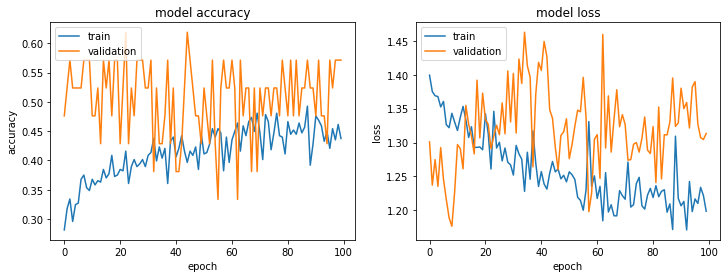

In [141]:
batch_size = 60
epoch = 100 ## 50 +25 pour early stopping
lr = 0.05

kernel_size_dict = {"C1" : (3,3), "S2" : 2,
                    "C3" : (3,3), "S4" : 2}
n_nodes_dict = {"C1" : 3, "C3" : 8, 
                "F5" : 50, "F6" : 200}


## init checkpoint : 
checkpoint_path = RES_PATH + "CNN_train_best_model/cp.ckpt"
checkpoint_dir = os.path.dirname(checkpoint_path)

# Create a callback that saves the model's weights
cp_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,
                                                 save_weights_only=True,
                                                 verbose=0)
try:
    model = lenet5_model(kernel_size_dict, n_nodes_dict)
    optimizer = keras.optimizers.Adagrad(learning_rate=tf.Variable(lr))
    model.compile(optimizer = optimizer,
                  loss='categorical_crossentropy',
                   metrics=['accuracy'])
    ## call the flow here to specify batch size
    h = model.fit(datagen_train.flow(X_train_64x64, Y_train, 
                                 batch_size=batch_size), 
                  epochs=epoch, verbose=0, callbacks=[cp_callback],
                  validation_data=datagen_validation.flow(X_validation_64x64, Y_validation))

except ValueError:
    print("\t remove", batch_size, epoch  )

plt.figure(figsize=(12,4))

# summarize history for accuracy
plt.subplot(1,2,1)
plt.plot(h.history['accuracy'])
plt.plot(h.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')

# summarize history for loss
plt.subplot(1,2,2)
plt.plot(h.history['loss'])
plt.plot(h.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.savefig(RES_PATH+"figures/"+"CNN_early_stopping")
plt.show()

Je vais donc fixer le nombre de cycles à 60.


In [142]:
batch_size = 60
epoch = 60 ## 50 +25 pour early stopping
lr = 0.05

Ainsi, je vais choisir comme paramètres : 
* learning_rate = 0.1
* batch_size = 60
* epoch = 60

#### Temps d'exécution 
Je fais tourner ce modèle sur beaucoup plus d'itérations (parce que volatilité) :

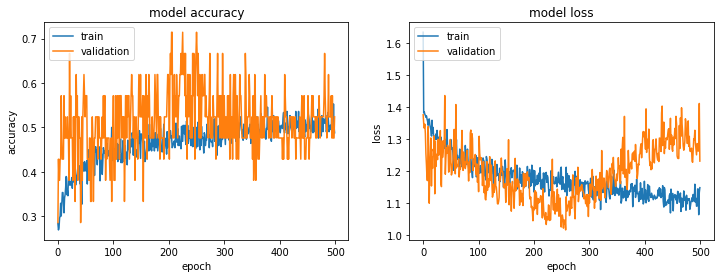

In [159]:
# from time import time
# from tensorflow.keras import optimizers

batch_size = 60
epoch = 500
lr = 0.1

kernel_size_dict = {"C1" : (3,3), "S2" : 2, "C3" : (3,3), "S4" : 2}
n_nodes_dict = {"C1" : 3, "C3" : 8, "F5" : 50, "F6" : 200}


t_start_train = time()
model = lenet5_model(kernel_size_dict, n_nodes_dict)
optimizer = keras.optimizers.Adagrad(learning_rate=tf.Variable(lr))
model.compile(optimizer = optimizer,
              loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(datagen_train.flow(X_train_64x64, Y_train, 
                             batch_size=batch_size), 
                    epochs=epoch, verbose=0, #callbacks=[cp_callback],
                    validation_data=datagen_validation.flow(X_validation_64x64, Y_validation))
t_end_train = time()

plt.figure(figsize=(12,4))

# summarize history for accuracy
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')

# summarize history for loss
plt.subplot(1,2,2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.savefig(RES_PATH + "figures/lenet5_adam")

plt.show()

En fait, il semble que le modèle continue à apprendre sans over-fitter jusqu'à 250 itérations ...

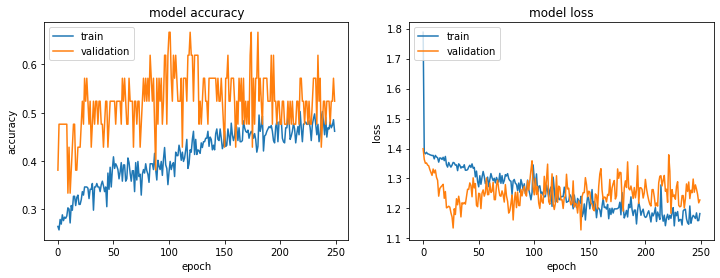

In [162]:
# from time import time
# from tensorflow.keras import optimizers

batch_size = 60
epoch = 250
lr = 0.1

kernel_size_dict = {"C1" : (3,3), "S2" : 2, "C3" : (3,3), "S4" : 2}
n_nodes_dict = {"C1" : 3, "C3" : 8, "F5" : 50, "F6" : 200}


t_start_train = time()
model = lenet5_model(kernel_size_dict, n_nodes_dict)
optimizer = keras.optimizers.Adagrad(learning_rate=tf.Variable(lr))
model.compile(optimizer = optimizer,
              loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(datagen_train.flow(X_train_64x64, Y_train, 
                             batch_size=batch_size), 
                    epochs=epoch, verbose=0, #callbacks=[cp_callback],
                    validation_data=datagen_validation.flow(X_validation_64x64, Y_validation))
t_end_train = time()

plt.figure(figsize=(12,4))

# summarize history for accuracy
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')

# summarize history for loss
plt.subplot(1,2,2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.savefig(RES_PATH + "figures/lenet5_adagrad_early_stop")

plt.show()

In [164]:
t_start_test = time()
loss, acc = model.evaluate(datagen_test.flow(X_test_64x64, Y_test), verbose=1)
t_end_test = time()

print("CNN LeNet5 training takes ", np.round(t_end_train - t_start_train,2),"seconds")
print("CNN LeNet5 testing takes ", np.round(t_end_test - t_start_test,2),"seconds")
print("Entropy loss = ", np.round(loss,2))
print("Accuracy = ", np.round(acc,2))

5/5 [==============================] - 0s 5ms/step - loss: 1.2066 - accuracy: 0.4504
CNN LeNet5 training takes  68.84 seconds
CNN LeNet5 testing takes  0.06 seconds
Entropy loss =  1.21
Accuracy =  0.45


<a id ="section3.2.4"></a>
[back to menu](#menu)

### 3.B.d Etude du taux d'apprentissage : 

#### Early Stopping 
En ayant optimisé ces paramètres, je vais maintenant utiliser un taux d'apprentissage non constant (décroissance par palier ou décroissance exponentielle), et surtout étudier l'évolution de ce taux d'apprentissage. En effet, il se peut que le modèle ait sur-appris car le nombre d'itération est trop grand. Ainsi, il pourrait être intéressant d'arrêter l'apprentissage un peu avant la convergence (early stopping) pour éviter un sur-apprentissage sur les données d'entrainement. Lançons le modèle :

cette erreur revient souvent lorsque j'ai déjà lancé un certain nombre de train sur le même notebook : 
---------------------------------------------------------------------------
RecursionError                            Traceback (most recent call last)
/tmp/ipykernel_1216162/2612625606.py in <module>
     14 
     15 ## get model :
---> 16 model = lenet5_model(kernel_size_dict, n_nodes_dict)
     17 model.summary()

/tmp/ipykernel_1216162/660585316.py in lenet5_model(kernel_size_dict, n_nodes_dict)
     20                     activation='relu', kernel_initializer='he_uniform'))
     21     ## F6 bis : drop out
---> 22     model_dropout.add(Dropout(0.25))
     23     ## F7 : classif :
     24     model.add(Dense(units=n_class, activation='softmax'))

~/.env_python/openclassroom/lib/python3.9/site-packages/tensorflow/python/training/tracking/base.py in _method_wrapper(self, *args, **kwargs)
    528     self._self_setattr_tracking = False  # pylint: disable=protected-access
    529     try:
--> 530       result = method(self, *args, **kwargs)
    531     finally:
    532       self._self_setattr_tracking = previous_value  # pylint: disable=protected-access

~/.env_python/openclassroom/lib/python3.9/site-packages/keras/utils/traceback_utils.py in error_handler(*args, **kwargs)
     65     except Exception as e:  # pylint: disable=broad-except
     66       filtered_tb = _process_traceback_frames(e.__traceback__)
---> 67       raise e.with_traceback(filtered_tb) from None
     68     finally:
     69       del filtered_tb

~/.env_python/openclassroom/lib/python3.9/site-packages/keras/engine/functional.py in _build_map_helper(tensor, finished_nodes, nodes_in_progress, nodes_in_decreasing_depth, layer_indices)
   1088   """Recursive helper for `_build_map`."""
   1089   layer, node_index, _ = tensor._keras_history  # pylint: disable=protected-access
-> 1090   node = layer._inbound_nodes[node_index]  # pylint: disable=protected-access
   1091 
   1092   # Don't repeat work for shared subgraphs

RecursionError: maximum recursion depth exceeded

In [57]:
## init 
kernel_size_dict = {"C1" : (5,5), "S2" : 2, "C3" : (5,5), "S4" : 2, "C5" : (5,5)}
n_nodes_dict = {"C1" : 6, "C3" : 16, "C5" : n_C5, "F6" : 200}
optimizer = optimizers.SGD(learning_rate=optimizer_lr)

##checkpoint dir :
checkpoint_path = RES_PATH + "CNN_train3/cp.ckpt"
checkpoint_dir = os.path.dirname(checkpoint_path)

# Create a callback that saves the model's weights
cp_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,
                                                 save_weights_only=True,
                                                 verbose=1)

## get model :
model = lenet5_model(kernel_size_dict, n_nodes_dict)
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_13 (Conv2D)          (None, 28, 28, 6)         156       
                                                                 
 average_pooling2d_6 (Averag  (None, 14, 14, 6)        0         
 ePooling2D)                                                     
                                                                 
 conv2d_14 (Conv2D)          (None, 10, 10, 16)        2416      
                                                                 
 average_pooling2d_7 (Averag  (None, 5, 5, 16)         0         
 ePooling2D)                                                     
                                                                 
 conv2d_15 (Conv2D)          (None, 1, 1, 16)          6416      
                                                                 
 dense_20 (Dense)            (None, 1, 1, 200)        

In [58]:
model.compile(optimizer = optimizer, 
              loss='categorical_crossentropy',
               metrics=['accuracy'])
history = model.fit(x_train, y_train, 
          batch_size=batch_size, epochs=epoch,
          verbose=1, #callbacks=[cp_callback],
          validation_data=(x_validation, y_validation))

Epoch 1/20
4/5 [=======================>......] - ETA: 0s - loss: 1.7930 - accuracy: 0.2725
Epoch 00001: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train3/cp.ckpt
5/5 [==============================] - 1s 57ms/step - loss: 1.7720 - accuracy: 0.2764 - val_loss: 1.2769 - val_accuracy: 0.3333
Epoch 2/20
4/5 [=======================>......] - ETA: 0s - loss: 1.2697 - accuracy: 0.3475
Epoch 00002: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train3/cp.ckpt
5/5 [==============================] - 0s 24ms/step - loss: 1.2636 - accuracy: 0.3534 - val_loss: 1.3056 - val_accuracy: 0.2857
Epoch 3/20
4/5 [=======================>......] - ETA: 0s - loss: 1.2232 - accuracy: 0.3975
Epoch 00003: saving model to /home/clairegayral/Documents/openclassroom/res/P6/CNN_train3/cp.ckpt
5/5 [==============================] - 0s 27ms/step - loss: 1.2237 - accuracy: 0.3942 - val_loss: 1.1948 - val_accuracy: 0.3333
Epoch 4/20
3/5 [=================>............

Regardons comment évolue le taux d'apprentissage au cours des itérations, comme proposé dans [ce blog de Jason Brownlee](https://machinelearningmastery.com/display-deep-learning-model-training-history-in-keras/)

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


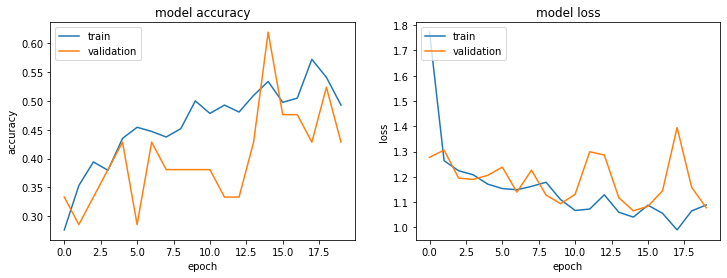

In [59]:
# list all data in history
print(history.history.keys())
plt.figure(figsize=(12,4))

# summarize history for accuracy
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')

# summarize history for loss
plt.subplot(1,2,2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.savefig(RES_PATH + "figures/lenet5_learning_rate_fixed")
plt.show()

In [ ]:
plt.figure(figsize=(6,4))
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Perte cross-entropique pour un lr fixe')
plt.ylabel('loss')
plt.xlabel('nombre de cycle')
plt.legend(['train', 'validation'], loc='upper left')

plt.savefig(RES_PATH + "figures/lenet5_loss_learning_rate_fixed")
plt.show()



Le modèle semble sur-apprendre à part de 17 cycles (les critère se déteriorent entre 17 et 18 itérations. L'early-stopping semble donc important pour éviter ce phénomène :

In [62]:
## init 
kernel_size_dict = {"C1" : (5,5), "S2" : 2, "C3" : (5,5), "S4" : 2, "C5" : (5,5)}
n_nodes_dict = {"C1" : 6, "C3" : 16, "C5" : n_C5, "F6" : 200}
optimizer = optimizers.SGD(learning_rate=optimizer_lr)

## get model :
model = lenet5_model(kernel_size_dict, n_nodes_dict)
model.compile(optimizer = optimizer, 
              loss='categorical_crossentropy',
               metrics=['accuracy'])
history = model.fit(x_train, y_train, 
          batch_size=batch_size, epochs=17,
          verbose=1, validation_data=(x_validation, y_validation))

Epoch 1/17
5/5 [==============================] - 0s 43ms/step - loss: 1.3298 - accuracy: 0.3365 - val_loss: 1.4069 - val_accuracy: 0.3810
Epoch 2/17
5/5 [==============================] - 0s 19ms/step - loss: 1.3026 - accuracy: 0.3317 - val_loss: 1.3778 - val_accuracy: 0.2857
Epoch 3/17
5/5 [==============================] - 0s 17ms/step - loss: 1.2367 - accuracy: 0.3750 - val_loss: 1.3464 - val_accuracy: 0.3333
Epoch 4/17
5/5 [==============================] - 0s 22ms/step - loss: 1.2318 - accuracy: 0.3966 - val_loss: 1.3355 - val_accuracy: 0.3810
Epoch 5/17
5/5 [==============================] - 0s 22ms/step - loss: 1.1921 - accuracy: 0.4014 - val_loss: 1.4362 - val_accuracy: 0.3333
Epoch 6/17
5/5 [==============================] - 0s 21ms/step - loss: 1.2008 - accuracy: 0.4038 - val_loss: 1.3952 - val_accuracy: 0.2381
Epoch 7/17
5/5 [==============================] - 0s 16ms/step - loss: 1.1728 - accuracy: 0.4375 - val_loss: 1.4855 - val_accuracy: 0.2381
Epoch 8/17
5/5 [===========

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


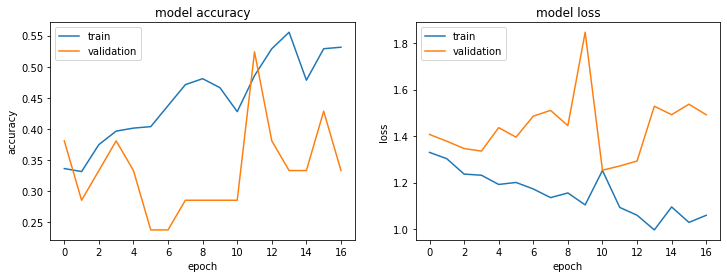

In [63]:
# list all data in history
print(history.history.keys())
plt.figure(figsize=(12,4))

# summarize history for accuracy
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')

# summarize history for loss
plt.subplot(1,2,2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [ ]:
plt.figure(figsize=(6,4))
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Perte cross-entropique pour un lr fixe')
plt.ylabel('loss')
plt.xlabel('nombre de cycle')
plt.legend(['train', 'validation'], loc='upper left')

plt.savefig(RES_PATH + "figures/lenet5_loss_learning_rate_piecewise_constant")
plt.show()

#### Variations du taux d'apprentissage :
Comment a évolué le modèle losque l'on fait varier le taux d'apprentissage ? Je vais faire appel aux itérations déjà lancées pour le choix des paramètres

In [78]:
# batch_size = 100
# epoch = 20
# n_C5 = 140
# optimizer_lr = 0.13

res = pd.read_csv(RES_PATH + "res_training_CNN2.csv", index_col=0)
res_best_params = res[res.batch_size == batch_size]
res_best_params = res_best_params[res_best_params.epoch == epoch]
res_best_params = res_best_params[res_best_params.nodes_C5 == n_C5]

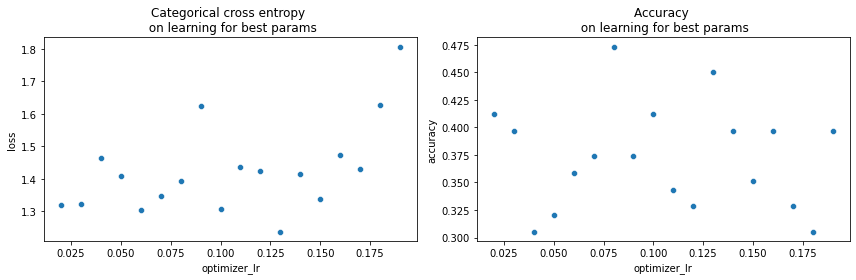

In [176]:
plt.figure(figsize=(12,4))

plt.subplot(1,2,1)
sns.scatterplot(y="loss", x = "optimizer_lr", data = res_best_params)
plt.title("Categorical cross entropy \n on learning for best params")
plt.legend("",frameon=False)

plt.subplot(1,2,2)
sns.scatterplot(y="accuracy", x = "optimizer_lr", data = res_best_params)
plt.title("Accuracy \n on learning for best params")
plt.legend("",frameon=False)

plt.tight_layout()
plt.show()

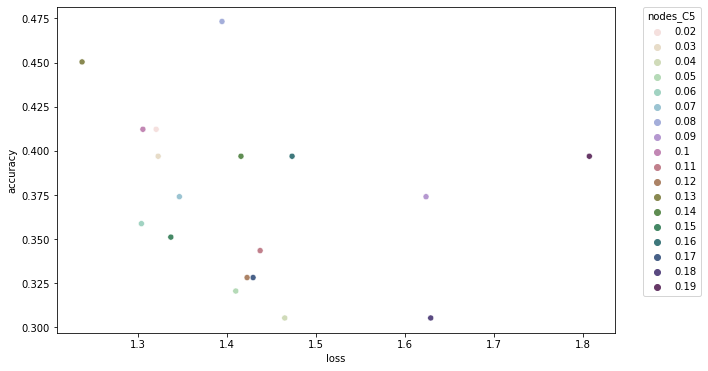

In [172]:
# palette = sns.color_palette("magma", len(res.optimizer_lr.unique())+8)[6:-2][::-1]
# palette = sns.color_palette("mako", len(res.optimizer_lr.unique())+6)[4:-2][::-1]
# palette = sns.color_palette("icefire", len(res.optimizer_lr.unique()))
palette = sns.cubehelix_palette(start=0.1, rot=-3, light=0.9, dark=0.3,
                      n_colors=len(res.optimizer_lr.unique()))
plt.figure(figsize=(10,6))
sns.scatterplot(y="accuracy", x = "loss", hue = "optimizer_lr", 
                data = res_best_params, palette=palette)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., title= "nodes_C5")
plt.show()

Il est difficile de voir une réelle tendance : il serait intéressant d'itérer l'apprentissage avec ces paramètres, avec plusieurs entrainements pour chaque taux d'apprentissage, afin de voir la variance de prédiction ... 

#### Méthodes à pas adaptatifs 
Je préfère essayer des méthodes avec des pas adaptatif. En choissant un décroissance à pas constants :

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


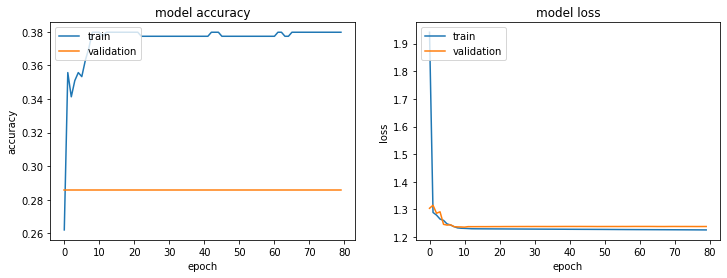

In [188]:
lr_schedule = schedules.PiecewiseConstantDecay([20,30,40,50],
                                                [0.8, 0.4, 0.2, 0.1, 0.05], 
                                                "PiecewiseConstant")

epoch = 80
optimizer = optimizers.SGD(learning_rate=lr_schedule)
# batch_size = fit_set["batch_size"]
# epoch = fit_set["epoch"]

model = lenet5_model(kernel_size_dict, n_nodes_dict)
model.compile(optimizer = optimizer, 
              loss='categorical_crossentropy',
               metrics=['accuracy'])
history = model.fit(x_train, y_train, 
          batch_size=batch_size, epochs=epoch,
          verbose=0, #callbacks=[cp_callback],
          validation_data=(x_validation, y_validation))   

# list all data in history
print(history.history.keys())
plt.figure(figsize=(12,4))

# summarize history for accuracy
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')

# summarize history for loss
plt.subplot(1,2,2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')

plt.savefig(RES_PATH + "figures/lenet5_learning_rate_piecewise_constant")
plt.show()


In [ ]:
plt.figure(figsize=(6,4))
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Perte cross-entropique pour un lr \n décroissant par palier')
plt.ylabel('loss')
plt.xlabel('nombre de cycle')
plt.legend(['train', 'validation'], loc='upper left')

plt.savefig(RES_PATH + "figures/lenet5_loss_learning_rate_piecewise_constant")
plt.show()

L'accuracy n'est pas bonne sur l'ensemble de validation .... essayon une décroissance exponentielle : 

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


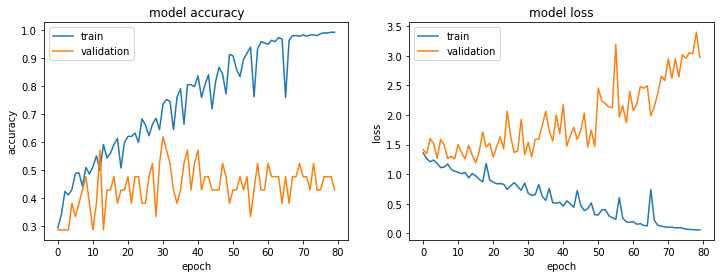

In [191]:
lr_schedule = schedules.ExponentialDecay(0.1, 20, decay_rate = 0.96, staircase=False, name=None)

epoch = 80
optimizer = optimizers.SGD(learning_rate=lr_schedule)
# batch_size = fit_set["batch_size"]
# epoch = fit_set["epoch"]

model = lenet5_model(kernel_size_dict, n_nodes_dict)
model.compile(optimizer = optimizer, 
              loss='categorical_crossentropy',
               metrics=['accuracy'])
history = model.fit(x_train, y_train, 
          batch_size=batch_size, epochs=epoch,
          verbose=0, #callbacks=[cp_callback],
          validation_data=(x_validation, y_validation))   

# list all data in history
print(history.history.keys())
plt.figure(figsize=(12,4))

# summarize history for accuracy
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')

# summarize history for loss
plt.subplot(1,2,2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.savefig(RES_PATH + "figures/lenet5_learning_rate_exp_decay")
plt.show()


In [ ]:
plt.figure(figsize=(6,4))
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Perte cross-entropique pour un lr \n à décroissance exponentielle')
plt.ylabel('loss')
plt.xlabel('nombre de cycle')
plt.legend(['train', 'validation'], loc='upper left')

plt.savefig(RES_PATH + "figures/lenet5_loss_learning_rate_exp_decay")
plt.show()


Enfin, plutôt que de faire appel à l'optimiseur SGD, d'autres optimiseurs très courants aussi basés sur des descentes de gradient stochastiques inluent un pas adaptatif. Par exemple, c'est le cas de [Adam](https://www.tensorflow.org/api_docs/python/tf/keras/optimizers/Adam) : 

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


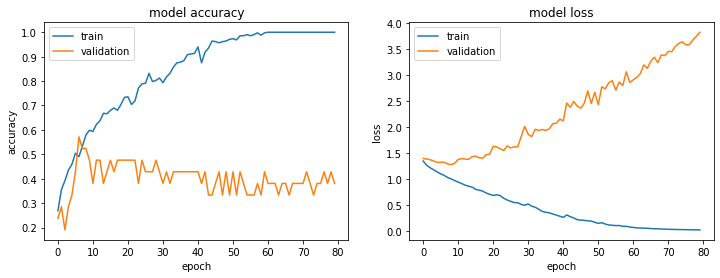

In [192]:
lr_schedule = schedules.ExponentialDecay(0.1, 20, decay_rate = 0.96, staircase=False, name=None)

epoch = 80
optimizer = optimizers.Adam()
# batch_size = fit_set["batch_size"]
# epoch = fit_set["epoch"]

model = lenet5_model(kernel_size_dict, n_nodes_dict)
model.compile(optimizer = optimizer, 
              loss='categorical_crossentropy',
               metrics=['accuracy'])
history = model.fit(x_train, y_train, 
          batch_size=batch_size, epochs=epoch,
          verbose=0, #callbacks=[cp_callback],
          validation_data=(x_validation, y_validation))   

# list all data in history
print(history.history.keys())
plt.figure(figsize=(12,4))

# summarize history for accuracy
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')

# summarize history for loss
plt.subplot(1,2,2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.savefig(RES_PATH + "figures/lenet5_adam")
plt.show()

In [ ]:
plt.figure(figsize=(6,4))
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Perte cross-entropique \n avec Adam')
plt.ylabel('loss')
plt.xlabel('nombre de cycle')
plt.legend(['train', 'validation'], loc='upper left')

plt.savefig(RES_PATH + "figures/lenet5_loss_adam")
plt.show()

La encore, il faudrait affiner les paramètres (le nombre de cycle notament pour faire de l'early-stopping, le taux initial, ...) Des [méthodes, comparées dans cet article](https://penseeartificielle.fr/meilleur-optimizer-ranger-radam-lookahead-fastai/) proposent une automatisation de ces choix. 

Conclusions CNN :

On est limités par les données d'entrainement que l'on a pris : au delà de 20 cycles, on commence à sur-apprendre : la perte d'apprentissage continue de descendre alors que la perte de validation stagne voir augmente. Il faudrait avoir bien plus d'images (ajouter les images augmentées ?). Ainsi les prédictions sont médiocres (accuracy =0.36 pour le meilleur modèle ...)



Pistes d'amélioration pour le CNN : 
* ajouter une première couche pour [normaliser les batch](https://keras.io/api/layers/normalization_layers/batch_normalization/) 
* prendre des images plus grosse (actuellement 32x32 et noir et blanc), comparer avec et sans preprocess
* rajouter des couches de convolution et des couches denses
* Comparer LeNet5 à la structure de réseau [proposée dans cet article](https://proceedings.neurips.cc/paper/2012/file/c399862d3b9d6b76c8436e924a68c45b-Paper.pdf), concu pour une classification d'images issues d'ImageNet. 

[back to menu](#menu)
<a id ="section4"></a>
<a id ="section4.1"></a>


# 4.  Transfert learning

Entraîner un réseau from scratch et obtenir des résultats plus probants demanderait beaucoup plus d'images d'entraînement, et de ressources de calculs. Je vais donc faire appel à des réseaux déjà entraînés sur d'autres images, pour répondre à un problème de classification similaire. [Cet article](https://towardsdatascience.com/transfer-learning-from-pre-trained-models-f2393f124751) détaille les grandes idées du transfert d'apprentissage


## 4.A.  Mise en place du transfert

<!--  -->
<!-- Ref de travail : -->

<!-- https://www.pyimagesearch.com/2016/08/10/imagenet-classification-with-python-and-keras/  -->

<!-- https://www.analyticsvidhya.com/blog/2020/10/create-image-classification-model-python-keras/  -->

<!-- https://keras.io/api/losses/probabilistic_losses/#categorical_crossentropy-function 
 -->


In [4]:
import pickle
from tensorflow.keras.models import Model
from tensorflow.keras.models import Sequential

from tensorflow.keras.preprocessing import image

from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Activation
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import GlobalAveragePooling2D
from tensorflow.keras.layers import Flatten

## optimiser 
from tensorflow.keras import optimizers
from tensorflow.keras.optimizers import schedules
from tensorflow.keras.callbacks import ModelCheckpoint

## specific models
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.applications.resnet50 import preprocess_input, decode_predictions

from keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.vgg16 import preprocess_input, decode_predictions

[back to menu](#menu)
<a id ="section4.1.1"></a>

### 4.A.a Appel au réseau primo-entraîné : 

Pour faire le transfert d'apprentissage, le choix du réseau primo-entraîné est la première étape. D'après [cet état de l'art des réseaux de classification d'images](https://arxiv.org/abs/1605.07678) ou [cet article de blog](https://viso.ai/deep-learning/resnet-residual-neural-network/) , les réseaux ["ResNet32"](https://models.roboflow.com/classification/resnet-32) ou ["ResNet50"](), entraîné sur les données COCO, sont de bon points de départ. Je garde sous le coude une deuxième structure très commune, VGG. 

Les résultats d'un primo-entraînement du réseau ResNet50 étant [proposé dans keras](https://keras.io/api/applications/resnet/#resnet50-function), je vais privilégier ce dernier. [Cet article](https://www.pyimagesearch.com/2016/08/10/imagenet-classification-with-python-and-keras/) présente comment keras a intégré les poids de ces réseaux entraînés sur les ImageNet. 


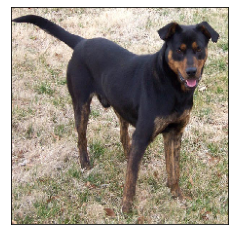

In [4]:
img = image.load_img(DATA_PATH+'dog.jpg', target_size=(224, 224))
# convert the image pixels to a numpy array
img = image.img_to_array(img)
# reshape data for the model
img = img.reshape((1, img.shape[0], img.shape[1], img.shape[2]))

plt.imshow(image.load_img(DATA_PATH+'dog.jpg', target_size=(224, 224)))
plt.xticks([]),plt.yticks([])
plt.show()

In [5]:
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.applications.resnet50 import preprocess_input, decode_predictions

model_base_ResNet = ResNet50(weights='imagenet')
x = preprocess_input(img)
preds = model_base_ResNet.predict(x)
print('Predicted with ResNet50:', decode_predictions(preds, top=3)[0])

from keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.vgg16 import preprocess_input, decode_predictions

model_base_VGG = VGG16(weights='imagenet')
x = preprocess_input(img)
preds = model_base_VGG.predict(x)
print('Predicted with VGG16:', decode_predictions(preds, top=3)[0])

2021-12-20 15:03:29.889729: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Predicted with ResNet50: [('n02105412', 'kelpie', 0.51181966), ('n02107142', 'Doberman', 0.15323842), ('n02089078', 'black-and-tan_coonhound', 0.12139763)]
Predicted with VGG16: [('n02107142', 'Doberman', 0.31941056), ('n02106550', 'Rottweiler', 0.24972937), ('n02105412', 'kelpie', 0.22587477)]


I got a warning here linked to the absence of GPU, and the incompatibility of my CPU with one type on calculus. Following [this post](https://stackoverflow.com/questions/47068709/your-cpu-supports-instructions-that-this-tensorflow-binary-was-not-compiled-to-u), it could be possible to gain performance installing Bazel

 [back to menu](#menu)
<a id ="section4.1.2"></a>

 ### 4.A.b Dataset pour le transfert :
Pour l'apprentissage complet, on n'a pas pris les images en couleur ni prétraitées, pour gagner du temps de calculs, ici, vu que l'on apprend que les dernières couches, on peu se permettre des images complètes, avec une résolution plus grande.

J'ai mes images en 300x300 séparées en train, validation et test, avec les labels en one hot encoder respectifs. Ici aussi, il aurait été préférable de passer par une validation croisée. 

Pour le préprocess et la data augmentation, il est préférable de faire appel aux fonctions de prétraitement spécifiques aux réseaux primo-entrainés, cela évitera de trop déformer le domaine d'adaptation lors du transfert. 

nb : Appel des données from scratch pour avoir une partie indépendante des autres : 

In [5]:
## appel des données from scratch :
race_table = pd.read_csv(DATA_PATH+"race_table.csv", index_col=0)
# dim = (500, 375)

## train set
X_train = []
y_train = []
for image_name in os.listdir(DATA_PATH+"train_reshape/"):
    # get image
    X_train.append(cv2.imread(DATA_PATH+"train_reshape/"+image_name))
    # get label 
    ref = image_name.split("_")[0]
    label = int(race_table[race_table.ref == ref].label)
    y_train.append(label)
X_train = np.array(X_train)
y_train = np.array(y_train)

## test set
X_test = []
y_test = []
for image_name in os.listdir(DATA_PATH+"test_reshape/"):
    # get image
    X_test.append(cv2.imread(DATA_PATH+"test_reshape/"+image_name))
    # get label
    ref = image_name.split("_")[0]
    label = int(race_table[race_table.ref == ref].label)
    y_test.append(label)
X_test = np.array(X_test)
y_test = np.array(y_test)

## split train into train and validation :
with open(RES_PATH + "index_train.txt", "rb") as fp: 
    index_train = pickle.load(fp)
with open(RES_PATH + "index_validation.txt", "rb") as fp: 
    index_validation = pickle.load(fp)
    
X_validation = X_train[index_validation]
y_validation = y_train[index_validation]
X_train = X_train[index_train]
y_train = y_train[index_train]

# one hot encoder
Y_train = LabelBinarizer().fit_transform(y_train)
Y_validation = LabelBinarizer().fit_transform(y_validation)
Y_test = LabelBinarizer().fit_transform(y_test)

# n_class = race_table.shape[0]
n_class = Y_train.shape[1]
n_train = Y_train.shape[0]
n_test = Y_test.shape[0]
n_validation = Y_validation.shape[0]

Et on passe les images en 224x224 pour cette partie :

In [6]:
img_dim = (300,300)
X_train_300x300 = []
for img in X_train :
    img = cv2.resize(img, img_dim, interpolation = cv2.INTER_AREA)
    X_train_300x300.append(img) 
X_train_300x300 = np.array(X_train_300x300)

X_validation_300x300 = []
for img in X_validation :
    img = cv2.resize(img, img_dim, interpolation = cv2.INTER_AREA)
    X_validation_300x300.append(img) 
X_validation_300x300 = np.array(X_validation_300x300)

X_test_300x300 = []
for img in X_test :
    img = cv2.resize(img, img_dim, interpolation = cv2.INTER_AREA)
    X_test_300x300.append(img) 
X_test_300x300 = np.array(X_test_300x300)

preprocess_kwargs = {}
## preprocess 
preprocess_kwargs["zca_whitening"] = False # whitening, turned to False because ZCA really long
preprocess_kwargs["featurewise_center"]=True # centering pixel distribution between images
preprocess_kwargs["featurewise_std_normalization"]=True # Standardize pixel distribution between images

data_aug_kwargs = preprocess_kwargs.copy()
## data augmentation 
data_aug_kwargs["rotation_range"] = 90 # rotation
data_aug_kwargs["width_shift_range"] = 0.2 # shift
data_aug_kwargs["horizontal_flip"] = True # flips horizontal
data_aug_kwargs["vertical_flip"] = True # flips vertical 
data_aug_kwargs["zoom_range"] = [0.5,1.0] # zoom 
data_aug_kwargs["brightness_range"] = [0.2,1.0] # brightness 


## fit depends on preprocess input (refered for each pre-trained net) !!!
datagen_train = ImageDataGenerator(**data_aug_kwargs)#, preprocessing_function=preprocess_input)
datagen_validation = ImageDataGenerator(**preprocess_kwargs)#, preprocessing_function=preprocess_input)
datagen_test = ImageDataGenerator(**preprocess_kwargs)#, preprocessing_function=preprocess_input)

datagen_train.fit(X_train_300x300)
datagen_validation.fit(X_validation_300x300)
datagen_test.fit(X_test_300x300)

# train_loader = datagen_train.flow(X_train_300x300, Y_train) 
# validation_loader = datagen_validation.flow(X_validation_300x300, Y_validation)
# test_loader = datagen_test.flow(X_test_300x300, Y_test) 

La data-augmentation et le préprocess, il faut séparer les cas pour chaque réseau, qui a sa propre fonction de preprocess :

TODO : check si la data augmentation est inclue dans le "preprocessing_input"

In [7]:
## et pour ResNet50 :
from tensorflow.keras.applications.resnet50 import preprocess_input as preprocess_input_ResNet

datagen_train_ResNet = ImageDataGenerator(preprocessing_function=preprocess_input_ResNet,
                                          **data_aug_kwargs)
datagen_validation_ResNet = ImageDataGenerator(preprocessing_function=preprocess_input_ResNet,
                                               **preprocess_kwargs)
datagen_test_ResNet = ImageDataGenerator(preprocessing_function=preprocess_input_ResNet,
                                         **preprocess_kwargs)

datagen_train_ResNet.fit(X_train_300x300)
datagen_validation_ResNet.fit(X_validation_300x300)
datagen_test_ResNet.fit(X_test_300x300)

# train_loader_ResNet = datagen_train_ResNet.flow(X_train_300x300, Y_train) 
# validation_loader_ResNet = datagen_validation_ResNet.flow(X_validation_300x300, Y_validation)
# test_loader_ResNet = datagen_test_ResNet.flow(X_test_300x300, Y_test) 

In [8]:
## pour VGG16 : 
from tensorflow.keras.applications.vgg16 import preprocess_input as preprocess_input_VGG
datagen_train_VGG = ImageDataGenerator(preprocessing_function=preprocess_input_VGG,
                                      **data_aug_kwargs)
datagen_validation_VGG = ImageDataGenerator(preprocessing_function=preprocess_input_VGG,
                                           **preprocess_kwargs)
datagen_test_VGG = ImageDataGenerator(preprocessing_function=preprocess_input_VGG,
                                     **preprocess_kwargs)

datagen_train_VGG.fit(X_train_300x300)
datagen_validation_VGG.fit(X_validation_300x300)
datagen_test_VGG.fit(X_test_300x300)

# train_loader_VGG = datagen_train_VGG.flow(X_train_300x300, Y_train) 
# validation_loader_VGG = datagen_validation_VGG.flow(X_validation_300x300, Y_validation)
# test_loader_VGG = datagen_test_VGG.flow(X_test_300x300, Y_test) 

[back to menu](#menu)
<a id ="section4.2"></a>
<a id ="section4.2.1"></a>
### 4.B Apprentissage des dernières couches uniquement :
Je me suis inspirée de [cet article](https://machinelearningmastery.com/how-to-use-transfer-learning-when-developing-convolutional-neural-network-models/), et de [la documentation de keras pour faire un transfert](https://keras.io/api/applications/#finetune-inceptionv3-on-a-new-set-of-classes) pour cette partie


### 4.B.a. Choix de structure

Je fais appel aux deux modèles (VGG et ResNet), car je vais les comparer après transfert. Je retire la dernière couche de classification ("include_top = False). 
C'est le moment de spécifier la dimension des images de transfert (img_dim)

In [9]:
img_dim = (300, 300, 3)
model_base_ResNet = ResNet50(weights='imagenet', include_top=False,
                             input_shape=img_dim)
model_base_VGG = VGG16(weights='imagenet', include_top=False,
                        input_shape=img_dim)

2021-12-20 15:28:16.486388: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Dans cette architecture incomplète, pour faire un transfert, je vais rajouter 3 couches :
* une couche pour vectoriser le résultat des couches précédentes (flatten)
* une couche dense de 1024 noeuds (il faudrait tester différentes taille ...)
* une couche de classification (dense, de n_class = 4 noeuds)

In [10]:
ResNet50(weights='imagenet', include_top=True).summary()

Model: "resnet50"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_3 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_3[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                           

Ensuite, il faut spécifier que seules les dernières couches sont à ré-entrainer, du moins, il faut spécifier que les autres couches ne sont pas à modifier. C'est par défaut le cas, mais la syntaxe est la suivante :

In [11]:
for layer in model_base_ResNet.layers:
    layer.trainable = False

for layer in model_base_VGG.layers:
    layer.trainable = False

In [12]:
# add new classifier layers for ResNet : 
flat1 = Flatten()(model_base_ResNet.layers[-1].output)
class1 = Dense(1024, activation='relu')(flat1)
output = Dense(n_class, activation='softmax')(class1)
model_transfert_ResNet = Model(inputs=model_base_ResNet.inputs, outputs=output)

# add new classifier layers for VGG : 
flat1 = Flatten()(model_base_VGG.layers[-1].output)
class1 = Dense(1024, activation='relu')(flat1)
output = Dense(n_class, activation='softmax')(class1)
model_transfert_VGG = Model(inputs=model_base_VGG.inputs, outputs=output)

Comme pour un entrainement classique, il ne reste plus qu'à compiler le modèle (donc choisir un optimiseur et une fonction de coût) et exécuter le modèle. 
Pour l'optimiseur, [rmsprop](https://towardsdatascience.com/understanding-rmsprop-faster-neural-network-learning-62e116fcf29a) est apparement très performant, mais nécessite de choisir le taux d'apprentissage. Je vais donc plutôt utiliser [Adam](https://towardsdatascience.com/understanding-rmsprop-faster-neural-network-learning-62e116fcf29a) qui est un algorithme à pas adaptatif :

In [13]:
# compile the model (should be done *after* setting layers to non-trainable)
# model_transfert.compile(optimizer='rmsprop', loss='categorical_crossentropy')
model_transfert_ResNet.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model_transfert_VGG.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

Enfin, il ne reste plus que l'exécution du transfert, qui sera lancé comme suit : 

In [14]:
# train the model on the new data for a few epochs
model_transfert_ResNet.fit(datagen_train_ResNet.flow(X_train_300x300, Y_train, batch_size=10), 
                           epochs=1,
                           validation_data = datagen_validation_ResNet.flow(X_validation_300x300, Y_validation, batch_size=1))

42/42 [==============================] - 63s 1s/step - loss: 75.0743 - accuracy: 0.2788 - val_loss: 16.3963 - val_accuracy: 0.4762


[back to menu](#menu)
<a id ="section4.2.2"></a>

### 4.B.b. Optimisation des paramètres d'exécution

#### Apprentissage des transferts pour différents paramètres 
Pour l'éxécution, il va falloir choisir un nombre de cycle et une taille de batch adapté. Pour cela, comme lorsque j'ai construit mon CNN, je vais itérer sur différentes valeurs et comparer les résutlats. Pour prendre en compte la variabilité des prédictions, je relance 5 fois pour chaque set. J'enregistre les résultats pour chaque transfert avec un callback. 

In [15]:
def init_model_resnet():
    model_base_ResNet = ResNet50(weights='imagenet', include_top=False,
                             input_shape=img_dim)
    ## fixe layers in base model :
    for layer in model_base_ResNet.layers:
        layer.trainable = False
    ## add transfert layers    
    flat1 = Flatten()(model_base_ResNet.layers[-1].output)
    class1 = Dense(1024, activation='relu')(flat1)
    output = Dense(n_class, activation='softmax')(class1)
    model_transfert_ResNet = Model(inputs=model_base_ResNet.inputs, outputs=output)
    ## compile     
    model_transfert_ResNet.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return(model_transfert_ResNet)

In [16]:
def init_model_vgg():
    model_base_VGG = VGG16(weights='imagenet', include_top=False,
                             input_shape=img_dim)
    ## fixe layers in base model :
    for layer in model_base_VGG.layers:
        layer.trainable = False
    ## add transfert layers    
    flat1 = Flatten()(model_base_VGG.layers[-1].output)
    class1 = Dense(1024, activation='relu')(flat1)
    output = Dense(n_class, activation='softmax')(class1)
    model_transfert_VGG = Model(inputs=model_base_VGG.inputs, outputs=output)
    ## compile     
    model_transfert_VGG.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return(model_transfert_VGG)

J'ai dans un premier temps été un peu trop audacieuse, en voulant faire tourner sur différents nombres de cycles, mais cela prend bien trop de temps ! Je vais faire tourner d'abbord sur 20 cycles, pour une taille de batch à 20, ce qui m'a permis d'obtenir ce graphique : 

![alt text](accuracy_loss.png)

En fait, j'avais une coquille dans mon code : au lieu de fixer les couches du modèle de base, je fixais toutes les couches ...

Par ailleurs, il semble y avoir une question de variable locale dans la boucle, qui m'empêche de faire appel à la fonction écrite au dessus. Je copie donc son contenu.

Quelques essais m'ont suffit pour voir que 5 cycles suffisaient pour avoir un très très bon modèle. Je lance donc le transfert avec différentes tailles de batch et sur 5 cycles. J'oublie l'idée de faire plusieurs itérations, je n'aurai pas le temps

In [ ]:
for batch_size in [10,20,40,60,80,100]:
#     batch_size = 10
    epoch = 10
    print(batch_size)
    # ## init checkpoint : 
    checkpoint_path = RES_PATH + "transfert_ResNet/"+ "batch_size_"+str(batch_size) + "/cp.ckpt"
    checkpoint_dir = os.path.dirname(checkpoint_path)

    # Create a callback that saves the model's weights
    cp_callback = ModelCheckpoint(filepath=checkpoint_path,
                                                     save_weights_only=True,
                                                     verbose=1)

    ## call primo trained model and fixe its layers 
    model_base_ResNet = ResNet50(weights='imagenet', include_top=False, input_shape=img_dim)
    for layer in model_base_ResNet.layers:
        layer.trainable = False
    ## remove last layer and add transfert layers 
    flat1 = Flatten()(model_base_ResNet.layers[-1].output)
    class1 = Dense(1024, activation='relu')(flat1)
    output = Dense(n_class, activation='softmax')(class1)
    model_transfert_ResNet = Model(inputs=model_base_ResNet.inputs, outputs=output)
    ## compile transfert model 
    model_transfert_ResNet.compile(optimizer='adam', loss='categorical_crossentropy', 
                                   metrics=['accuracy']) 
    
    ## fit 
    train_loader_ResNet = datagen_train_ResNet.flow(X_train_300x300, Y_train, batch_size=batch_size) 
    validation_loader_ResNet = datagen_validation_ResNet.flow(X_validation_300x300, Y_validation)
    ## train the model on the new data for a few epochs
    history = model_transfert_ResNet.fit(train_loader_ResNet, 
                                         epochs=1,
                                         validation_data = validation_loader_ResNet)
    # list all data in history
    print(history.history.keys())
    plt.figure(figsize=(12,3))

    # summarize history for accuracy
    plt.subplot(1,2,1)
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'validation'], loc='upper left')

    # summarize history for loss
    plt.subplot(1,2,2)
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'validation'], loc='upper left')
    
    plt.tight_layout()
    plt.savefig(RES_PATH+"figures/transfert_resnet/bs_" + str(batch_size) + "_epoch_20")
    plt.show()

10


Ces graphes me permettent de choisir le nombre de cycle pour faire de l'early stopping (par exemple, pour batch_size = 20, 4 cycles suffisents)

In [ ]:
list_early_stop = [{"batch_size" : 10, "epochs" : 7},
                   {"batch_size" : 20, "epochs" : 5},
                   {"batch_size" : 40, "epochs" : 4},
                   {"batch_size" : 60, "epochs" : 7},
                   {"batch_size" : 80, "epochs" : 12},
                   {"batch_size" : 100, "epochs" : 5},
                  ]
for fit_kwargs in list_early_stop :
    batch_size = fit_kwargs["batch_size"]
    epoch = fit_kwargs["epochs"]
    print(batch_size)
    # ## init checkpoint : 
    checkpoint_path = RES_PATH + "transfert_ResNet_early_stop/"+ "batch_size_" + str(batch_size) + "/cp.ckpt"
    checkpoint_dir = os.path.dirname(checkpoint_path)

    # Create a callback that saves the model's weights
    cp_callback = ModelCheckpoint(filepath=checkpoint_path,
                                                     save_weights_only=True,
                                                     verbose=1)

    ## call primo trained model and fixe its layers 
    model_base_ResNet = ResNet50(weights='imagenet', include_top=False,
                             input_shape=img_dim)
    for layer in model_base_ResNet.layers:
        layer.trainable = False
    ## remove last layer and add transfert layers 
    flat1 = Flatten()(model_base_ResNet.layers[-1].output)
    class1 = Dense(1024, activation='relu')(flat1)
    output = Dense(n_class, activation='softmax')(class1)
    model_transfert_ResNet = Model(inputs=model_base_ResNet.inputs, outputs=output)
    ## compile transfert model 
    model_transfert_ResNet.compile(optimizer='adam', loss='categorical_crossentropy', 
                                   metrics=['accuracy']) 
    
    ## fit 
    train_loader_ResNet = datagen_train_ResNet.flow(X_train_300x300, Y_train, batch_size=batch_size) 
    validation_loader_ResNet = datagen_validation_ResNet.flow(X_validation_300x300, Y_validation)
    ## train the model on the new data for a few epochs
    history = model_transfert_ResNet.fit(train_loader_ResNet, 
                                         epochs=1,
                                         validation_data = validation_loader_ResNet)
    # list all data in history
    print(history.history.keys())
    plt.figure(figsize=(12,3))

    # summarize history for accuracy
    plt.subplot(1,2,1)
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'validation'], loc='upper left')

    # summarize history for loss
    plt.subplot(1,2,2)
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'validation'], loc='upper left')
    
    plt.tight_layout()
    plt.savefig(RES_PATH+"figures/transfert_resnet/bs_" + str(batch_size) + "_epoch_20")
    plt.show()

Et je fais la même chose avec le modèle VGG 16. Je suppose que de la même façon, les batch avec trop d'image sont mauvais, et comme ils sont long à tourner, je ne les lance pas : 

10
Epoch 1/10
13/13 [==============================] - ETA: 0s - loss: 115.3516 - accuracy: 0.5264
Epoch 00001: saving model to /home/clairegayral/Documents/openclassroom/res/P6/transfert_VGG/batch_size_10/cp.ckpt
13/13 [==============================] - 127s 10s/step - loss: 115.3516 - accuracy: 0.5264 - val_loss: 40.2632 - val_accuracy: 0.4762
Epoch 2/10
13/13 [==============================] - ETA: 0s - loss: 11.8245 - accuracy: 0.8005
Epoch 00002: saving model to /home/clairegayral/Documents/openclassroom/res/P6/transfert_VGG/batch_size_10/cp.ckpt
13/13 [==============================] - 119s 9s/step - loss: 11.8245 - accuracy: 0.8005 - val_loss: 11.3383 - val_accuracy: 0.7143
Epoch 3/10
13/13 [==============================] - ETA: 0s - loss: 1.2320 - accuracy: 0.9471
Epoch 00003: saving model to /home/clairegayral/Documents/openclassroom/res/P6/transfert_VGG/batch_size_10/cp.ckpt
13/13 [==============================] - 117s 9s/step - loss: 1.2320 - accuracy: 0.9471 - val_loss: 6

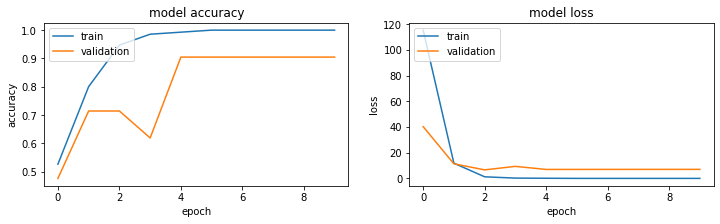

20
Epoch 1/10
13/13 [==============================] - ETA: 0s - loss: 81.5487 - accuracy: 0.5433
Epoch 00001: saving model to /home/clairegayral/Documents/openclassroom/res/P6/transfert_VGG/batch_size_20/cp.ckpt
13/13 [==============================] - 117s 9s/step - loss: 81.5487 - accuracy: 0.5433 - val_loss: 17.1794 - val_accuracy: 0.7143
Epoch 2/10
13/13 [==============================] - ETA: 0s - loss: 3.0048 - accuracy: 0.9135
Epoch 00002: saving model to /home/clairegayral/Documents/openclassroom/res/P6/transfert_VGG/batch_size_20/cp.ckpt
13/13 [==============================] - 117s 9s/step - loss: 3.0048 - accuracy: 0.9135 - val_loss: 8.6894 - val_accuracy: 0.8571
Epoch 3/10
13/13 [==============================] - ETA: 0s - loss: 0.8271 - accuracy: 0.9760
Epoch 00003: saving model to /home/clairegayral/Documents/openclassroom/res/P6/transfert_VGG/batch_size_20/cp.ckpt
13/13 [==============================] - 117s 9s/step - loss: 0.8271 - accuracy: 0.9760 - val_loss: 6.8565 

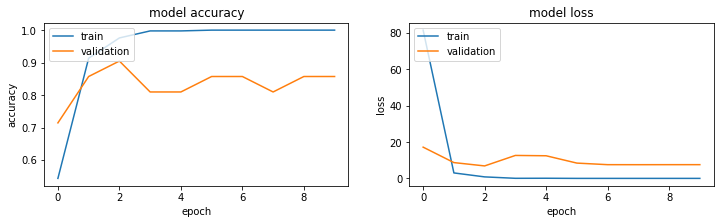

40
Epoch 1/10
13/13 [==============================] - ETA: 0s - loss: 105.6488 - accuracy: 0.4591
Epoch 00001: saving model to /home/clairegayral/Documents/openclassroom/res/P6/transfert_VGG/batch_size_40/cp.ckpt
13/13 [==============================] - 125s 10s/step - loss: 105.6488 - accuracy: 0.4591 - val_loss: 18.5047 - val_accuracy: 0.7619
Epoch 2/10
13/13 [==============================] - ETA: 0s - loss: 2.9087 - accuracy: 0.8942
Epoch 00002: saving model to /home/clairegayral/Documents/openclassroom/res/P6/transfert_VGG/batch_size_40/cp.ckpt
13/13 [==============================] - 118s 9s/step - loss: 2.9087 - accuracy: 0.8942 - val_loss: 6.0879 - val_accuracy: 0.9048
Epoch 3/10
13/13 [==============================] - ETA: 0s - loss: 0.9829 - accuracy: 0.9615
Epoch 00003: saving model to /home/clairegayral/Documents/openclassroom/res/P6/transfert_VGG/batch_size_40/cp.ckpt
13/13 [==============================] - 117s 9s/step - loss: 0.9829 - accuracy: 0.9615 - val_loss: 5.10

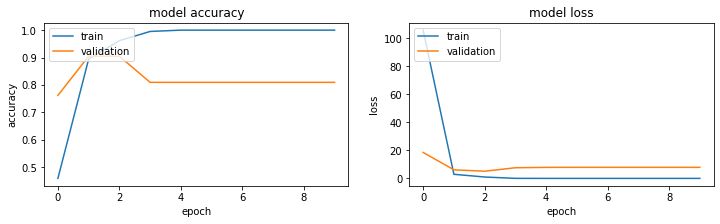

60
Epoch 1/10
13/13 [==============================] - ETA: 0s - loss: 59.2246 - accuracy: 0.5865
Epoch 00001: saving model to /home/clairegayral/Documents/openclassroom/res/P6/transfert_VGG/batch_size_60/cp.ckpt
13/13 [==============================] - 118s 9s/step - loss: 59.2246 - accuracy: 0.5865 - val_loss: 16.0972 - val_accuracy: 0.8095
Epoch 2/10
13/13 [==============================] - ETA: 0s - loss: 7.1798 - accuracy: 0.9087
Epoch 00002: saving model to /home/clairegayral/Documents/openclassroom/res/P6/transfert_VGG/batch_size_60/cp.ckpt
13/13 [==============================] - 118s 9s/step - loss: 7.1798 - accuracy: 0.9087 - val_loss: 9.8457 - val_accuracy: 0.8571
Epoch 3/10
13/13 [==============================] - ETA: 0s - loss: 1.5666 - accuracy: 0.9712
Epoch 00003: saving model to /home/clairegayral/Documents/openclassroom/res/P6/transfert_VGG/batch_size_60/cp.ckpt
13/13 [==============================] - 119s 9s/step - loss: 1.5666 - accuracy: 0.9712 - val_loss: 15.1141

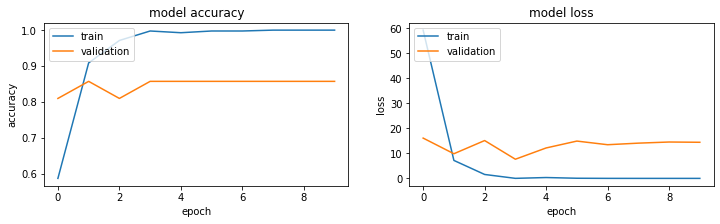

80
Epoch 1/10
13/13 [==============================] - ETA: 0s - loss: 72.3181 - accuracy: 0.5793
Epoch 00001: saving model to /home/clairegayral/Documents/openclassroom/res/P6/transfert_VGG/batch_size_80/cp.ckpt
13/13 [==============================] - 119s 9s/step - loss: 72.3181 - accuracy: 0.5793 - val_loss: 23.8201 - val_accuracy: 0.7619
Epoch 2/10
13/13 [==============================] - ETA: 0s - loss: 6.0309 - accuracy: 0.9159
Epoch 00002: saving model to /home/clairegayral/Documents/openclassroom/res/P6/transfert_VGG/batch_size_80/cp.ckpt
13/13 [==============================] - 118s 9s/step - loss: 6.0309 - accuracy: 0.9159 - val_loss: 8.2615 - val_accuracy: 0.8095
Epoch 3/10
13/13 [==============================] - ETA: 0s - loss: 0.6712 - accuracy: 0.9712
Epoch 00003: saving model to /home/clairegayral/Documents/openclassroom/res/P6/transfert_VGG/batch_size_80/cp.ckpt
13/13 [==============================] - 118s 9s/step - loss: 0.6712 - accuracy: 0.9712 - val_loss: 17.4390

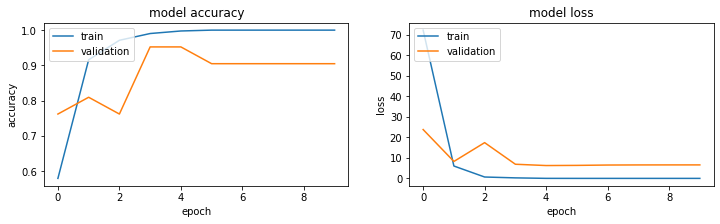

100
Epoch 1/10
13/13 [==============================] - ETA: 0s - loss: 84.6926 - accuracy: 0.5697
Epoch 00001: saving model to /home/clairegayral/Documents/openclassroom/res/P6/transfert_VGG/batch_size_100/cp.ckpt
13/13 [==============================] - 119s 9s/step - loss: 84.6926 - accuracy: 0.5697 - val_loss: 13.6122 - val_accuracy: 0.9048
Epoch 2/10
13/13 [==============================] - ETA: 0s - loss: 6.3312 - accuracy: 0.8582
Epoch 00002: saving model to /home/clairegayral/Documents/openclassroom/res/P6/transfert_VGG/batch_size_100/cp.ckpt
13/13 [==============================] - 119s 9s/step - loss: 6.3312 - accuracy: 0.8582 - val_loss: 11.3721 - val_accuracy: 0.8095
Epoch 3/10
13/13 [==============================] - ETA: 0s - loss: 0.6453 - accuracy: 0.9736
Epoch 00003: saving model to /home/clairegayral/Documents/openclassroom/res/P6/transfert_VGG/batch_size_100/cp.ckpt
13/13 [==============================] - 119s 9s/step - loss: 0.6453 - accuracy: 0.9736 - val_loss: 4.

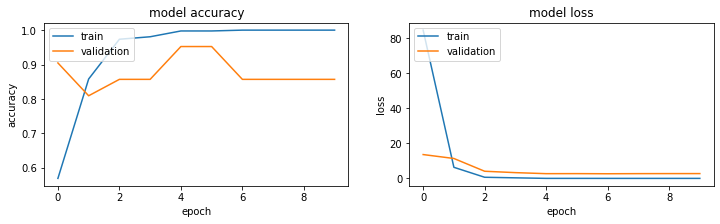

120
Epoch 1/10
13/13 [==============================] - ETA: 0s - loss: 95.9614 - accuracy: 0.5240 
Epoch 00001: saving model to /home/clairegayral/Documents/openclassroom/res/P6/transfert_VGG/batch_size_120/cp.ckpt
13/13 [==============================] - 120s 9s/step - loss: 95.9614 - accuracy: 0.5240 - val_loss: 25.9886 - val_accuracy: 0.7143
Epoch 2/10
13/13 [==============================] - ETA: 0s - loss: 3.3615 - accuracy: 0.9087
Epoch 00002: saving model to /home/clairegayral/Documents/openclassroom/res/P6/transfert_VGG/batch_size_120/cp.ckpt
13/13 [==============================] - 119s 9s/step - loss: 3.3615 - accuracy: 0.9087 - val_loss: 16.3418 - val_accuracy: 0.7619
Epoch 3/10
13/13 [==============================] - ETA: 0s - loss: 1.2636 - accuracy: 0.9784
Epoch 00003: saving model to /home/clairegayral/Documents/openclassroom/res/P6/transfert_VGG/batch_size_120/cp.ckpt
13/13 [==============================] - 117s 9s/step - loss: 1.2636 - accuracy: 0.9784 - val_loss: 8

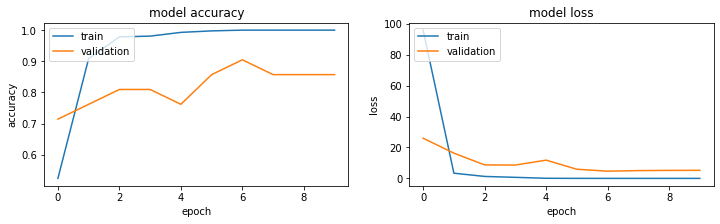

140
Epoch 1/10
13/13 [==============================] - ETA: 0s - loss: 51.3366 - accuracy: 0.6178
Epoch 00001: saving model to /home/clairegayral/Documents/openclassroom/res/P6/transfert_VGG/batch_size_140/cp.ckpt
13/13 [==============================] - 119s 9s/step - loss: 51.3366 - accuracy: 0.6178 - val_loss: 5.8258 - val_accuracy: 0.9048
Epoch 2/10
13/13 [==============================] - ETA: 0s - loss: 6.0344 - accuracy: 0.9159
Epoch 00002: saving model to /home/clairegayral/Documents/openclassroom/res/P6/transfert_VGG/batch_size_140/cp.ckpt
13/13 [==============================] - 118s 9s/step - loss: 6.0344 - accuracy: 0.9159 - val_loss: 19.7055 - val_accuracy: 0.7143
Epoch 3/10
13/13 [==============================] - ETA: 0s - loss: 1.3646 - accuracy: 0.9615
Epoch 00003: saving model to /home/clairegayral/Documents/openclassroom/res/P6/transfert_VGG/batch_size_140/cp.ckpt
13/13 [==============================] - 117s 9s/step - loss: 1.3646 - accuracy: 0.9615 - val_loss: 9.1

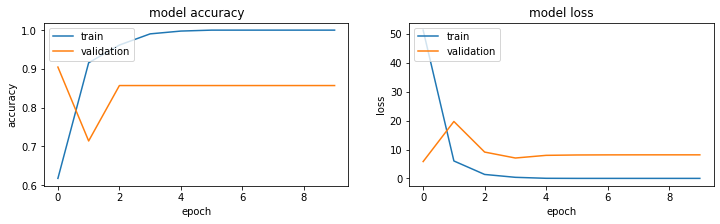

In [19]:
for batch_size in [10,20,40,60,80,100,120,140]:
#     batch_size = 10
    epoch = 10
    print(batch_size)
    # ## init checkpoint : 
    checkpoint_path = RES_PATH + "transfert_VGG/"+ "batch_size_"+str(batch_size) + "/cp.ckpt"
    checkpoint_dir = os.path.dirname(checkpoint_path)

    # Create a callback that saves the model's weights
    cp_callback = ModelCheckpoint(filepath=checkpoint_path,
                                                     save_weights_only=True,
                                                     verbose=1)

    ## call primo-trained model and remove last layer
    model_base_VGG = VGG16(weights='imagenet', include_top=False,
                             input_shape=img_dim)
    ## fixe convolution layers 
    for layer in model_base_VGG.layers:
        layer.trainable = False
    ## remove last layer and add transfert layers 
    flat1 = Flatten()(model_base_VGG.layers[-1].output)
    class1 = Dense(1024, activation='relu')(flat1)
    output = Dense(n_class, activation='softmax')(class1)
    model_transfert_VGG = Model(inputs=model_base_VGG.inputs, outputs=output)
    ## compile transfert model 
    model_transfert_VGG.compile(optimizer='adam', loss='categorical_crossentropy', 
                                   metrics=['accuracy']) 
    
    ## fit 
    train_loader_VGG = datagen_train_VGG.flow(X_train_300x300, Y_train, batch_size=batch_size) 
    validation_loader_VGG = datagen_validation_VGG.flow(X_validation_300x300, Y_validation)
    ## train the model on the new data for a few epochs
    history = model_transfert_VGG.fit(train_loader_VGG, 
                                         epochs=1,
                                         validation_data = validation_loader_VGG)
    
    plt.figure(figsize=(12,3))

    # summarize history for accuracy
    plt.subplot(1,2,1)
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'validation'], loc='upper left')

    # summarize history for loss
    plt.subplot(1,2,2)
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'validation'], loc='upper left')
    plt.savefig(RES_PATH+"figures/transfert_vgg/bs_" + str(batch_size) + "_epoch_10")
    plt.show()

10
Epoch 1/10
13/13 [==============================] - ETA: 0s - loss: 122.1997 - accuracy: 0.5264 
Epoch 00001: saving model to /home/clairegayral/Documents/openclassroom/res/P6/transfert_VGG_early_stop/batch_size_10/cp.ckpt
13/13 [==============================] - 142s 11s/step - loss: 122.1997 - accuracy: 0.5264 - val_loss: 10.3877 - val_accuracy: 0.7143
Epoch 2/10
13/13 [==============================] - ETA: 0s - loss: 3.5506 - accuracy: 0.8678
Epoch 00002: saving model to /home/clairegayral/Documents/openclassroom/res/P6/transfert_VGG_early_stop/batch_size_10/cp.ckpt
13/13 [==============================] - 128s 10s/step - loss: 3.5506 - accuracy: 0.8678 - val_loss: 5.5480 - val_accuracy: 0.8095
Epoch 3/10
13/13 [==============================] - ETA: 0s - loss: 0.7975 - accuracy: 0.9615
Epoch 00003: saving model to /home/clairegayral/Documents/openclassroom/res/P6/transfert_VGG_early_stop/batch_size_10/cp.ckpt
13/13 [==============================] - 117s 9s/step - loss: 0.7975 

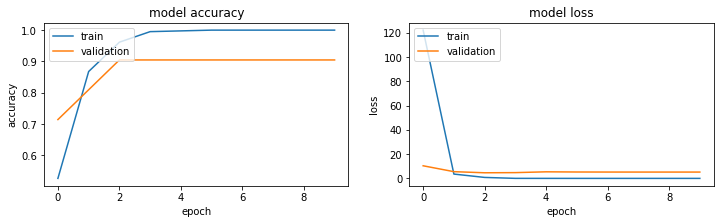

20
Epoch 1/10
13/13 [==============================] - ETA: 0s - loss: 65.8518 - accuracy: 0.5673
Epoch 00001: saving model to /home/clairegayral/Documents/openclassroom/res/P6/transfert_VGG_early_stop/batch_size_20/cp.ckpt
13/13 [==============================] - 116s 9s/step - loss: 65.8518 - accuracy: 0.5673 - val_loss: 9.2779 - val_accuracy: 0.7619
Epoch 2/10
13/13 [==============================] - ETA: 0s - loss: 2.0866 - accuracy: 0.9351
Epoch 00002: saving model to /home/clairegayral/Documents/openclassroom/res/P6/transfert_VGG_early_stop/batch_size_20/cp.ckpt
13/13 [==============================] - 117s 9s/step - loss: 2.0866 - accuracy: 0.9351 - val_loss: 9.3938 - val_accuracy: 0.8571
Epoch 3/10
13/13 [==============================] - ETA: 0s - loss: 0.6181 - accuracy: 0.9712
Epoch 00003: saving model to /home/clairegayral/Documents/openclassroom/res/P6/transfert_VGG_early_stop/batch_size_20/cp.ckpt
13/13 [==============================] - 116s 9s/step - loss: 0.6181 - accu

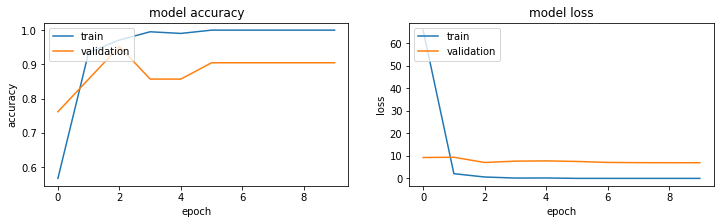

40
Epoch 1/10
13/13 [==============================] - ETA: 0s - loss: 89.2730 - accuracy: 0.5312 
Epoch 00001: saving model to /home/clairegayral/Documents/openclassroom/res/P6/transfert_VGG_early_stop/batch_size_40/cp.ckpt
13/13 [==============================] - 112s 9s/step - loss: 89.2730 - accuracy: 0.5312 - val_loss: 11.3975 - val_accuracy: 0.8095
Epoch 2/10
13/13 [==============================] - ETA: 0s - loss: 4.5520 - accuracy: 0.8990
Epoch 00002: saving model to /home/clairegayral/Documents/openclassroom/res/P6/transfert_VGG_early_stop/batch_size_40/cp.ckpt
13/13 [==============================] - 108s 8s/step - loss: 4.5520 - accuracy: 0.8990 - val_loss: 12.2860 - val_accuracy: 0.8095
Epoch 3/10
13/13 [==============================] - ETA: 0s - loss: 1.7109 - accuracy: 0.9495
Epoch 00003: saving model to /home/clairegayral/Documents/openclassroom/res/P6/transfert_VGG_early_stop/batch_size_40/cp.ckpt
13/13 [==============================] - 111s 9s/step - loss: 1.7109 - a

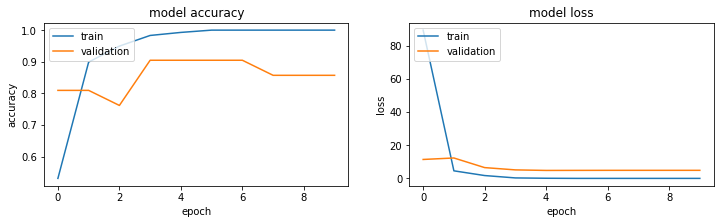

60
Epoch 1/10
13/13 [==============================] - ETA: 0s - loss: 66.9670 - accuracy: 0.5865
Epoch 00001: saving model to /home/clairegayral/Documents/openclassroom/res/P6/transfert_VGG_early_stop/batch_size_60/cp.ckpt
13/13 [==============================] - 109s 8s/step - loss: 66.9670 - accuracy: 0.5865 - val_loss: 11.1456 - val_accuracy: 0.7619
Epoch 2/10
13/13 [==============================] - ETA: 0s - loss: 2.9026 - accuracy: 0.9303
Epoch 00002: saving model to /home/clairegayral/Documents/openclassroom/res/P6/transfert_VGG_early_stop/batch_size_60/cp.ckpt
13/13 [==============================] - 109s 8s/step - loss: 2.9026 - accuracy: 0.9303 - val_loss: 12.0844 - val_accuracy: 0.7619
Epoch 3/10
13/13 [==============================] - ETA: 0s - loss: 0.6709 - accuracy: 0.9712
Epoch 00003: saving model to /home/clairegayral/Documents/openclassroom/res/P6/transfert_VGG_early_stop/batch_size_60/cp.ckpt
13/13 [==============================] - 109s 8s/step - loss: 0.6709 - ac

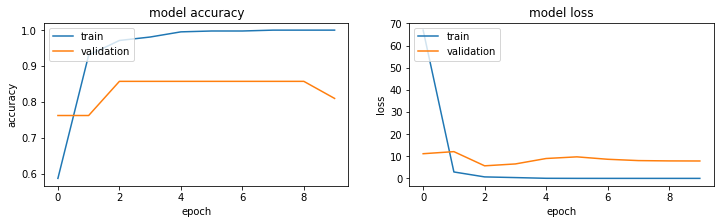

80
Epoch 1/10
13/13 [==============================] - ETA: 0s - loss: 87.1078 - accuracy: 0.5216
Epoch 00001: saving model to /home/clairegayral/Documents/openclassroom/res/P6/transfert_VGG_early_stop/batch_size_80/cp.ckpt
13/13 [==============================] - 111s 9s/step - loss: 87.1078 - accuracy: 0.5216 - val_loss: 7.1119 - val_accuracy: 0.7619
Epoch 2/10
13/13 [==============================] - ETA: 0s - loss: 3.9680 - accuracy: 0.9038
Epoch 00002: saving model to /home/clairegayral/Documents/openclassroom/res/P6/transfert_VGG_early_stop/batch_size_80/cp.ckpt
13/13 [==============================] - 111s 9s/step - loss: 3.9680 - accuracy: 0.9038 - val_loss: 2.5190 - val_accuracy: 0.8571
Epoch 3/10
13/13 [==============================] - ETA: 0s - loss: 0.3393 - accuracy: 0.9904
Epoch 00003: saving model to /home/clairegayral/Documents/openclassroom/res/P6/transfert_VGG_early_stop/batch_size_80/cp.ckpt
13/13 [==============================] - 112s 9s/step - loss: 0.3393 - accu

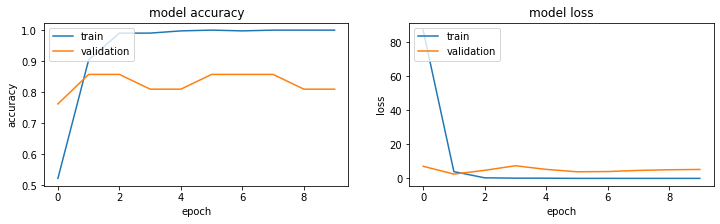

100
Epoch 1/10
13/13 [==============================] - ETA: 0s - loss: 100.2232 - accuracy: 0.4880
Epoch 00001: saving model to /home/clairegayral/Documents/openclassroom/res/P6/transfert_VGG_early_stop/batch_size_100/cp.ckpt
13/13 [==============================] - 111s 8s/step - loss: 100.2232 - accuracy: 0.4880 - val_loss: 37.3536 - val_accuracy: 0.5714
Epoch 2/10
13/13 [==============================] - ETA: 0s - loss: 6.5387 - accuracy: 0.8966
Epoch 00002: saving model to /home/clairegayral/Documents/openclassroom/res/P6/transfert_VGG_early_stop/batch_size_100/cp.ckpt
13/13 [==============================] - 112s 9s/step - loss: 6.5387 - accuracy: 0.8966 - val_loss: 7.8081 - val_accuracy: 0.9048
Epoch 3/10
13/13 [==============================] - ETA: 0s - loss: 1.3382 - accuracy: 0.9663
Epoch 00003: saving model to /home/clairegayral/Documents/openclassroom/res/P6/transfert_VGG_early_stop/batch_size_100/cp.ckpt
13/13 [==============================] - 111s 9s/step - loss: 1.3382

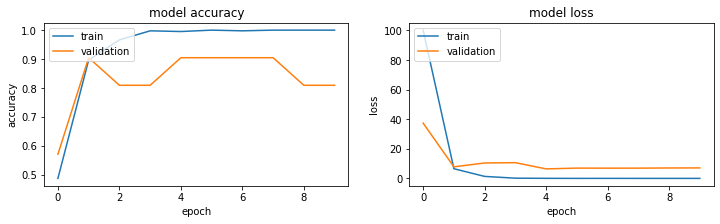

120
Epoch 1/10
13/13 [==============================] - ETA: 0s - loss: 95.5778 - accuracy: 0.5240 
Epoch 00001: saving model to /home/clairegayral/Documents/openclassroom/res/P6/transfert_VGG_early_stop/batch_size_120/cp.ckpt
13/13 [==============================] - 111s 9s/step - loss: 95.5778 - accuracy: 0.5240 - val_loss: 35.9410 - val_accuracy: 0.6190
Epoch 2/10
13/13 [==============================] - ETA: 0s - loss: 4.2169 - accuracy: 0.9183
Epoch 00002: saving model to /home/clairegayral/Documents/openclassroom/res/P6/transfert_VGG_early_stop/batch_size_120/cp.ckpt
13/13 [==============================] - 112s 9s/step - loss: 4.2169 - accuracy: 0.9183 - val_loss: 12.1625 - val_accuracy: 0.7619
Epoch 3/10
13/13 [==============================] - ETA: 0s - loss: 0.9417 - accuracy: 0.9712
Epoch 00003: saving model to /home/clairegayral/Documents/openclassroom/res/P6/transfert_VGG_early_stop/batch_size_120/cp.ckpt
13/13 [==============================] - 110s 8s/step - loss: 0.9417

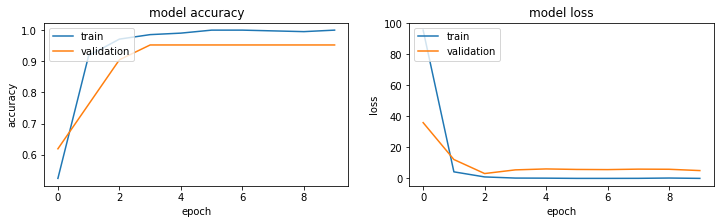

140
Epoch 1/10
13/13 [==============================] - ETA: 0s - loss: 89.1079 - accuracy: 0.5096 
Epoch 00001: saving model to /home/clairegayral/Documents/openclassroom/res/P6/transfert_VGG_early_stop/batch_size_140/cp.ckpt
13/13 [==============================] - 112s 9s/step - loss: 89.1079 - accuracy: 0.5096 - val_loss: 13.1777 - val_accuracy: 0.6667
Epoch 2/10
13/13 [==============================] - ETA: 0s - loss: 2.4263 - accuracy: 0.9159
Epoch 00002: saving model to /home/clairegayral/Documents/openclassroom/res/P6/transfert_VGG_early_stop/batch_size_140/cp.ckpt
13/13 [==============================] - 112s 9s/step - loss: 2.4263 - accuracy: 0.9159 - val_loss: 7.5414 - val_accuracy: 0.8095
Epoch 3/10
13/13 [==============================] - ETA: 0s - loss: 0.5026 - accuracy: 0.9736
Epoch 00003: saving model to /home/clairegayral/Documents/openclassroom/res/P6/transfert_VGG_early_stop/batch_size_140/cp.ckpt
13/13 [==============================] - 110s 9s/step - loss: 0.5026 

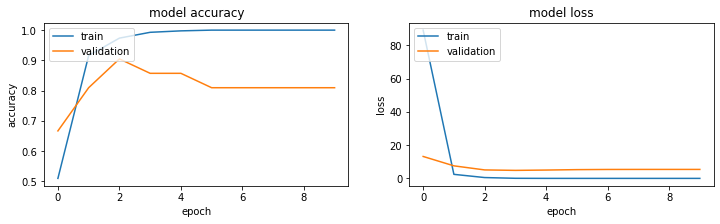

In [23]:
list_early_stop = [{"batch_size" : 10, "epochs" : 5},
                       {"batch_size" : 20, "epochs" : 3},
                       {"batch_size" : 40, "epochs" : 2},
                       {"batch_size" : 60, "epochs" : 6},
                       {"batch_size" : 80, "epochs" : 4},
                       {"batch_size" : 100, "epochs" : 5},
                       {"batch_size" : 120, "epochs" : 7},
                       {"batch_size" : 140, "epochs" : 5}, ## more than 10% of system memory
                      ]
for fit_kwargs in list_early_stop :
    batch_size = fit_kwargs["batch_size"]
    print(batch_size)
    # ## init checkpoint : 
    checkpoint_path = RES_PATH + "transfert_VGG_early_stop/"+ "batch_size_"+str(batch_size) + "/cp.ckpt"
    checkpoint_dir = os.path.dirname(checkpoint_path)

    # Create a callback that saves the model's weights
    cp_callback = ModelCheckpoint(filepath=checkpoint_path,
                                                     save_weights_only=True,
                                                     verbose=1)

    ## Call primo-trained model and remove last layer
    model_base_VGG = VGG16(weights='imagenet', include_top=False,
                             input_shape=img_dim)
    ## fixe convolution layers 
    for layer in model_base_VGG.layers:
        layer.trainable = False
    ## remove last layer and add transfert layers 
    flat1 = Flatten()(model_base_VGG.layers[-1].output)
    class1 = Dense(1024, activation='relu')(flat1)
    output = Dense(n_class, activation='softmax')(class1)
    model_transfert_VGG = Model(inputs=model_base_VGG.inputs, outputs=output)
    ## compile transfert model 
    model_transfert_VGG.compile(optimizer='adam', loss='categorical_crossentropy', 
                                   metrics=['accuracy']) 
    
    ## fit 
    train_loader_VGG = datagen_train_VGG.flow(X_train_300x300, Y_train, batch_size=batch_size) 
    validation_loader_VGG = datagen_validation_VGG.flow(X_validation_300x300, Y_validation)
    ## train the model on the new data for a few epochs
    history = model_transfert_VGG.fit(train_loader_VGG, 
                                         epochs=1,
                                         validation_data = validation_loader_VGG)
    
    # list all data in history
    print(history.history.keys())
    plt.figure(figsize=(12,3))

    # summarize history for accuracy
    plt.subplot(1,2,1)
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'validation'], loc='upper left')

    # summarize history for loss
    plt.subplot(1,2,2)
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'validation'], loc='upper left')
    plt.savefig(RES_PATH+"figures/transfert_vgg/bs_" + str(batch_size) + "_epoch_10")
    plt.show()


# modifié jusqu'ici

#### Comparaison des transferts 
Comparons les différents résultats sur l'ensemble de test :

In [14]:
img_dim =(300,300,3)

In [ ]:
res = pd.DataFrame()
counter = 0
for vgg_model_name in os.listdir(RES_PATH + "transfert_VGG_early_stop/"):
    checkpoint_path = RES_PATH + "transfert_VGG_early_stop/"+ vgg_model_name + "/cp.ckpt"
    batch_size = int(vgg_model_name.split("_")[-1])
    model = init_model_vgg()
    model.load_weights(checkpoint_path)
    loss, acc = model.evaluate(datagen_test_VGG.flow(X_test_300x300,Y_test), verbose=1)
    ## res metrics : 
    res.loc[counter, "loss"] = loss
    res.loc[counter, "accuracy"] = acc
    ## res params :
    res.loc[counter, "batch_size"] = batch_size
    res.loc[counter, "res_name"] = "VGG16"
    counter +=1
    
for resnet_model_name in os.listdir(RES_PATH + "transfert_ResNet_early_stop/"):
    checkpoint_path = RES_PATH + "transfert_ResNet_early_stop/"+ resnet_model_name + "/cp.ckpt"
    batch_size = int(resnet_model_name.split("_")[-1])
    model = init_model_resnet()
    model.load_weights(checkpoint_path)
    loss, acc = model.evaluate(datagen_test_ResNet.flow(X_test_300x300,Y_test), verbose=1)
    ## res metrics : 
    res.loc[counter, "loss"] = loss
    res.loc[counter, "accuracy"] = acc
    ## res params :
    res.loc[counter, "batch_size"] = batch_size
    res.loc[counter, "res_name"] = "ResNet50"
    counter += 1

2021-12-20 15:17:09.523120: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


5/5 [==============================] - 29s 5s/step - loss: 7.2601 - accuracy: 0.8244


2021-12-20 15:21:10.834650: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 838860800 exceeds 10% of free system memory.
2021-12-20 15:21:11.260030: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 838860800 exceeds 10% of free system memory.
2021-12-20 15:21:11.343224: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 838860800 exceeds 10% of free system memory.
2021-12-20 15:21:11.789597: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 838860800 exceeds 10% of free system memory.
2021-12-20 15:21:12.625677: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 838860800 exceeds 10% of free system memory.


5/5 [==============================] - 13s 2s/step - loss: 7.0737 - accuracy: 0.8702


In [14]:
# res.to_csv(RES_PATH+"res_training_transfert.csv")
res = pd.read_csv(RES_PATH+"res_training_transfert.csv", index_col=0)
res

,loss,accuracy,batch_size,res_name
0,5.374680,0.824427,40.0,VGG16
1,7.006466,0.824427,120.0,VGG16
2,6.780765,0.786260,10.0,VGG16
3,8.198455,0.816794,100.0,VGG16
4,8.158462,0.816794,20.0,VGG16
5,8.740177,0.778626,80.0,VGG16
6,5.378631,0.793893,140.0,VGG16
7,7.260080,0.824427,60.0,VGG16
8,7.073697,0.870229,40.0,ResNet50
9,14.382790,0.862595,10.0,ResNet50


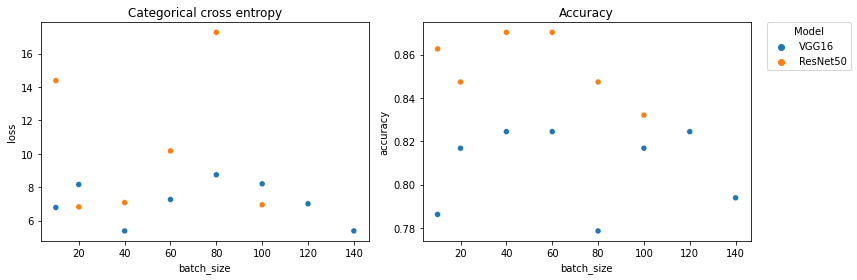

In [15]:
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
sns.scatterplot(y="loss", x="batch_size", hue="res_name", data=res)
plt.title("Categorical cross entropy")
plt.legend("",frameon=False)

plt.subplot(1,2,2)
sns.scatterplot(y="accuracy", x="batch_size", hue="res_name", data=res)
plt.title("Accuracy")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., title= "Model")
plt.tight_layout()
plt.savefig(RES_PATH+"figures/transfert_results_early_stop")
plt.show()

[back to menu](#menu)
<a id ="section4.3"></a>

### 4.C.  Analyses des résultats 
ResNet donne des meilleurs résultats que VGG. La taille de batch qui donne les meilleurs résultats est 40. Entrainons une dernière fois ces modèles pour en sortir le temps d'entrainement :

Epoch 1/3
11/11 [==============================] - ETA: 0s - loss: 103.8318 - accuracy: 0.4663
Epoch 00001: saving model to /home/clairegayral/Documents/openclassroom/res/P6/transfert_best_model/VGG/cp.ckpt
11/11 [==============================] - 110s 10s/step - loss: 103.8318 - accuracy: 0.4663 - val_loss: 47.3467 - val_accuracy: 0.5238
Epoch 2/3
11/11 [==============================] - ETA: 0s - loss: 9.4120 - accuracy: 0.8462 
Epoch 00002: saving model to /home/clairegayral/Documents/openclassroom/res/P6/transfert_best_model/VGG/cp.ckpt
11/11 [==============================] - 109s 10s/step - loss: 9.4120 - accuracy: 0.8462 - val_loss: 16.3742 - val_accuracy: 0.6190
Epoch 3/3
11/11 [==============================] - ETA: 0s - loss: 1.9349 - accuracy: 0.9543
Epoch 00003: saving model to /home/clairegayral/Documents/openclassroom/res/P6/transfert_best_model/VGG/cp.ckpt
11/11 [==============================] - 103s 9s/step - loss: 1.9349 - accuracy: 0.9543 - val_loss: 36.5994 - val_ac

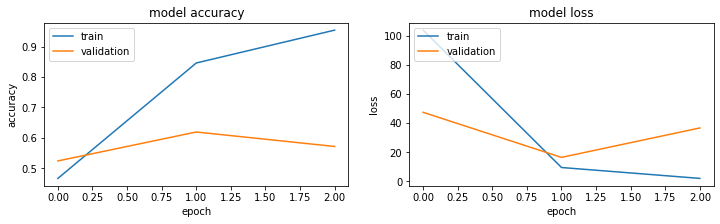

5/5 [==============================] - 30s 6s/step - loss: 23.6147 - accuracy: 0.6718


In [16]:
from time import time

batch_size = 40 
epoch = 3
# ## init checkpoint : 
checkpoint_path = RES_PATH + "transfert_best_model/"+ "VGG/" + "/cp.ckpt"
checkpoint_dir = os.path.dirname(checkpoint_path)

# Create a callback that saves the model's weights
cp_callback = ModelCheckpoint(filepath=checkpoint_path,
                                                 save_weights_only=True,
                                                 verbose=1)
t_start_train = time()
## reset the model
model_transfert_VGG = init_model_vgg()

## train the model on the new data for a few epochs
history = model_transfert_VGG.fit(
                    datagen_train_VGG.flow(X_train_300x300,Y_train,
                                              batch_size=batch_size), 
                    epochs=epoch, callbacks=[cp_callback],
                    validation_data=(X_validation_300x300,Y_validation))
t_end_train = time()
plt.figure(figsize=(12,3))
# summarize history for accuracy
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')

# summarize history for loss
plt.subplot(1,2,2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.savefig(RES_PATH+"figures/transfert_best_model_vgg")
plt.show()

t_start_test = time()
loss, acc = model_transfert_VGG.evaluate(X_test_300x300, Y_test, verbose=1)
t_end_test = time()

In [17]:
t_start_test = time()
loss, acc = model_transfert_VGG.evaluate(X_test_300x300, Y_test, verbose=1)
t_end_test = time()

5/5 [==============================] - 30s 6s/step - loss: 23.6147 - accuracy: 0.6718


In [18]:
print("VGG transfert training takes ", np.round(t_end_train - t_start_train,2),"seconds")
print("VGG transfert testing takes ", np.round(t_end_test - t_start_test,2),"seconds")
print("Entropy loss = ", np.round(loss,2))
print("Accuracy = ", np.round(acc,2))

VGG transfert training takes  324.3 seconds
VGG transfert testing takes  29.69 seconds
Entropy loss =  23.61
Accuracy =  0.67


40
Epoch 1/5
11/11 [==============================] - ETA: 0s - loss: 85.5853 - accuracy: 0.4615
Epoch 00001: saving model to /home/clairegayral/Documents/openclassroom/res/P6/transfert_best_model/ResNet/cp.ckpt
11/11 [==============================] - 61s 5s/step - loss: 85.5853 - accuracy: 0.4615 - val_loss: 11.3740 - val_accuracy: 0.7619
Epoch 2/5
11/11 [==============================] - ETA: 0s - loss: 5.2517 - accuracy: 0.8774
Epoch 00002: saving model to /home/clairegayral/Documents/openclassroom/res/P6/transfert_best_model/ResNet/cp.ckpt
11/11 [==============================] - 59s 5s/step - loss: 5.2517 - accuracy: 0.8774 - val_loss: 5.4380 - val_accuracy: 0.7619
Epoch 3/5
11/11 [==============================] - ETA: 0s - loss: 0.9656 - accuracy: 0.9639
Epoch 00003: saving model to /home/clairegayral/Documents/openclassroom/res/P6/transfert_best_model/ResNet/cp.ckpt
11/11 [==============================] - 58s 5s/step - loss: 0.9656 - accuracy: 0.9639 - val_loss: 8.9660 - val_

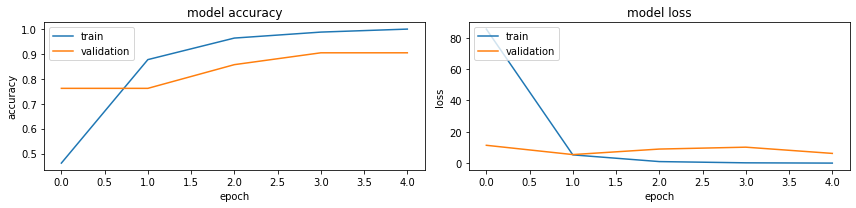

In [19]:
batch_size = 40
epoch = 5
print(batch_size)

## init checkpoint : 
checkpoint_path = RES_PATH + "transfert_best_model/"+ "ResNet/" + "/cp.ckpt"
checkpoint_dir = os.path.dirname(checkpoint_path)

# Create a callback that saves the model's weights
cp_callback = ModelCheckpoint(filepath=checkpoint_path,
                                                 save_weights_only=True,
                                                 verbose=1)
t_start_train = time()

## call primo trained model and fixe its layers 
model_base_ResNet = ResNet50(weights='imagenet', include_top=False,
                         input_shape=img_dim)
for layer in model_base_ResNet.layers:
    layer.trainable = False
## remove last layer and add transfert layers 
flat1 = Flatten()(model_base_ResNet.layers[-1].output)
class1 = Dense(1024, activation='relu')(flat1)
output = Dense(n_class, activation='softmax')(class1)
model_transfert_ResNet = Model(inputs=model_base_ResNet.inputs, outputs=output)


## compile transfert model 
model_transfert_ResNet.compile(optimizer='adam', loss='categorical_crossentropy', 
                               metrics=['accuracy'])## init model : 

## train the model on the new data for a few epochs
history = model_transfert_ResNet.fit(
                    datagen_train_ResNet.flow(X_train_300x300,Y_train,
                                              batch_size=batch_size), 
                    epochs=epoch, callbacks=[cp_callback],
                    validation_data=(X_validation_300x300,Y_validation))
t_end_train = time()

plt.figure(figsize=(12,3))
# summarize history for accuracy
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')

# summarize history for loss
plt.subplot(1,2,2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')

plt.tight_layout()
plt.savefig(RES_PATH+"figures/transfert_best_model_resnet")
plt.show()

## print test results 
t_start_test = time()
loss, acc = model_transfert_ResNet.evaluate(X_test_300x300, Y_test, verbose=1)
t_end_test = time()

In [20]:
print("ResNet transfert training takes ", np.round(t_end_train - t_start_train,2),"seconds")
print("ResNet transfert testing takes ", np.round(t_end_test - t_start_test,2),"seconds")
print("Entropy loss = ", np.round(loss,2))
print("Accuracy = ", np.round(acc,2))


ResNet transfert training takes  324.3 seconds
ResNet transfert testing takes  29.69 seconds
Entropy loss =  23.61
Accuracy =  0.67


### Transfert sans pré-traitement et data-augmentation : 

Vérifions l'apport du pré-traitement implémenté dans keras

20
Epoch 1/10
21/21 [==============================] - ETA: 0s - loss: 69.8608 - accuracy: 0.6154
Epoch 00001: saving model to /home/clairegayral/Documents/openclassroom/res/P6/transfert_ResNet_no_preprocess/batch_size_20/cp.ckpt
21/21 [==============================] - 69s 3s/step - loss: 69.8608 - accuracy: 0.6154 - val_loss: 17.8591 - val_accuracy: 0.7143
Epoch 2/10
21/21 [==============================] - ETA: 0s - loss: 4.0746 - accuracy: 0.9447
Epoch 00002: saving model to /home/clairegayral/Documents/openclassroom/res/P6/transfert_ResNet_no_preprocess/batch_size_20/cp.ckpt
21/21 [==============================] - 72s 3s/step - loss: 4.0746 - accuracy: 0.9447 - val_loss: 2.8001e-05 - val_accuracy: 1.0000
Epoch 3/10
21/21 [==============================] - ETA: 0s - loss: 0.7850 - accuracy: 0.9663
Epoch 00003: saving model to /home/clairegayral/Documents/openclassroom/res/P6/transfert_ResNet_no_preprocess/batch_size_20/cp.ckpt
21/21 [==============================] - 71s 3s/step -

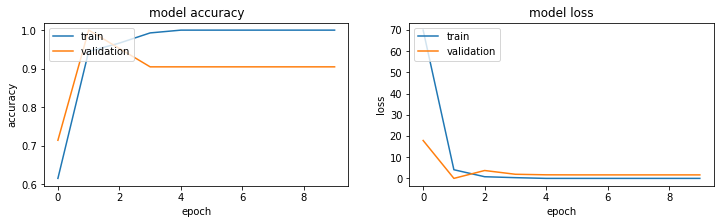

In [14]:
batch_size = 20
epoch = 10
print(batch_size)
# ## init checkpoint : 
checkpoint_path = RES_PATH + "transfert_ResNet_no_preprocess/"+ "batch_size_"+str(batch_size) + "/cp.ckpt"
checkpoint_dir = os.path.dirname(checkpoint_path)

# Create a callback that saves the model's weights
cp_callback = ModelCheckpoint(filepath=checkpoint_path,
                              save_weights_only=True,
                              verbose=1)

## call primo-trained model and remove last layer
model_base_ResNet = ResNet50(weights='imagenet', include_top=False,
                             input_shape=img_dim)
## fixe convolution layers 
for layer in model_base_ResNet.layers:
    layer.trainable = False
## add transfert layers 
flat1 = Flatten()(model_base_ResNet.layers[-1].output)
class1 = Dense(1024, activation='relu')(flat1)
output = Dense(n_class, activation='softmax')(class1)
model_transfert_ResNet = Model(inputs=model_base_ResNet.inputs, outputs=output)

## compile     
model_transfert_ResNet.compile(optimizer='adam', loss='categorical_crossentropy',
                            metrics=['accuracy'])

## train the model on the new data for a few epochs
history = model_transfert_ResNet.fit(X_train_300x300,Y_train, 
                    batch_size=batch_size, epochs=epoch, callbacks=[cp_callback],
                    validation_data=(X_validation_300x300,Y_validation))

# list all data in history
print(history.history.keys())

# summarize history for accuracy
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')

# summarize history for loss
plt.subplot(1,2,2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.savefig(RES_PATH+"figures/transfert_resnet/np_preprocess_bs_" + str(batch_size) + "_epoch_10")
plt.show()

Il est assez étonnant que les résultats soient meilleurs sans le preprocess ... cela reste le meilleur modèle. 
Je teste de nouveau, mais sans pré-traiter la validation :

20
Epoch 1/10
21/21 [==============================] - ETA: 0s - loss: 45.5072 - accuracy: 0.6827
Epoch 00001: saving model to /home/clairegayral/Documents/openclassroom/res/P6/transfert_ResNet_no_preprocess/batch_size_20/cp.ckpt
21/21 [==============================] - 66s 3s/step - loss: 45.5072 - accuracy: 0.6827 - val_loss: 31.4106 - val_accuracy: 0.7619
Epoch 2/10
21/21 [==============================] - ETA: 0s - loss: 5.3937 - accuracy: 0.9447
Epoch 00002: saving model to /home/clairegayral/Documents/openclassroom/res/P6/transfert_ResNet_no_preprocess/batch_size_20/cp.ckpt
21/21 [==============================] - 70s 3s/step - loss: 5.3937 - accuracy: 0.9447 - val_loss: 25.0810 - val_accuracy: 0.8571
Epoch 3/10
21/21 [==============================] - ETA: 0s - loss: 0.8251 - accuracy: 0.9832
Epoch 00003: saving model to /home/clairegayral/Documents/openclassroom/res/P6/transfert_ResNet_no_preprocess/batch_size_20/cp.ckpt
21/21 [==============================] - 66s 3s/step - lo

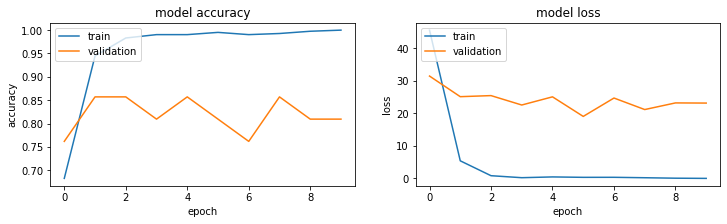

In [13]:
batch_size = 20
epoch = 10
img_dim = (300,300,3)
print(batch_size)
# ## init checkpoint : 
checkpoint_path = RES_PATH + "transfert_ResNet_no_preprocess/"+ "batch_size_"+str(batch_size) + "/cp.ckpt"
checkpoint_dir = os.path.dirname(checkpoint_path)

# Create a callback that saves the model's weights
cp_callback = ModelCheckpoint(filepath=checkpoint_path,
                              save_weights_only=True,
                              verbose=1)

## call primo-trained model and remove last layer
model_base_ResNet = ResNet50(weights='imagenet', include_top=False,
                             input_shape=img_dim)
## fixe convolution layers 
for layer in model_base_ResNet.layers:
    layer.trainable = False
## add transfert layers 
flat1 = Flatten()(model_base_ResNet.layers[-1].output)
class1 = Dense(1024, activation='relu')(flat1)
output = Dense(n_class, activation='softmax')(class1)
model_transfert_ResNet = Model(inputs=model_base_ResNet.inputs, outputs=output)

## compile     
model_transfert_ResNet.compile(optimizer='adam', loss='categorical_crossentropy',
                            metrics=['accuracy'])

## train the model on the new data for a few epochs
history = model_transfert_ResNet.fit(
                    datagen_train_ResNet.flow(X_train_300x300,Y_train,
                                              batch_size=batch_size), 
                    epochs=epoch, callbacks=[cp_callback],
                    validation_data=(X_validation_300x300,Y_validation))

# list all data in history
plt.figure(figsize=(12,3))

# summarize history for accuracy
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')

# summarize history for loss
plt.subplot(1,2,2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.savefig(RES_PATH+"figures/transfert_resnet/np_prepocess_for_test_bs_" + str(batch_size) + "_epoch_10")
plt.show()

Dans une version précédente de ce script, je lançais le choix de la taille de batch sur les données non pré-traitées ... je garde donc (en l'ayant choisi duement) batch_size = 

In [ ]:
res = pd.DataFrame()
counter = 0
for vgg_model_name in os.listdir(RES_PATH + "old2/transfert_VGG_early_stop/"):
    checkpoint_path = RES_PATH + "old2/transfert_VGG_early_stop/"+ vgg_model_name + "/cp.ckpt"
    batch_size = int(vgg_model_name.split("_")[-1])
    model = init_model_vgg()
    model.load_weights(checkpoint_path)
    loss, acc = model.evaluate(test_loader_VGG, verbose=1)
    ## res metrics : 
    res.loc[counter, "loss"] = loss
    res.loc[counter, "accuracy"] = acc
    ## res params :
    res.loc[counter, "batch_size"] = batch_size
    res.loc[counter, "res_name"] = "VGG16"
    counter +=1
    
for resnet_model_name in os.listdir(RES_PATH + "old2/transfert_ResNet_early_stop/"):
    checkpoint_path = RES_PATH + "old2/transfert_ResNet_early_stop/"+ resnet_model_name + "/cp.ckpt"
    batch_size = int(resnet_model_name.split("_")[-1])
    model = init_model_resnet()
    model.load_weights(checkpoint_path)
    loss, acc = model.evaluate(test_loader_ResNet, verbose=1)
    ## res metrics : 
    res.loc[counter, "loss"] = loss
    res.loc[counter, "accuracy"] = acc
    ## res params :
    res.loc[counter, "batch_size"] = batch_size
    res.loc[counter, "res_name"] = "ResNet50"
    counter += 1

5/5 [==============================] - 29s 5s/step - loss: 69.8120 - accuracy: 0.6183


In [ ]:
res.to_csv(RES_PATH + "res_transfert_without_preprocess.csv")
res.describe()

#### # 5. Script pour lancer le meilleur modèle : 
Je vais faire appel aux modules de tensorflow qui prennent en charge le preprocess et la data-augmentation, pour directement

In [17]:
img_dir = ""

## Paths : 
checkpoint_path = "best_model.ckpt"

## Requirements :

## Load Libraries :
import cv2

from tensorflow.keras.models import Model
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense

## optimiser 
from tensorflow.keras import optimizers
from tensorflow.keras.optimizers import schedules
from tensorflow.keras.callbacks import ModelCheckpoint

## resnet 50 model :
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.applications.resnet50 import preprocess_input, decode_predictions


## prepocess image : 
# img = cv2.imread(img_dir)
# img = cv2.resize(img, img_size, interpolation = cv2.INTER_AREA)




## Calling model : 
def init_model_resnet():
    ## call primo-trained model
    model_base_ResNet = ResNet50(weights='imagenet', include_top=False, input_shape=img_dim)
    ## fixe layers in base model :
    for layer in model_base_ResNet.layers:
        layer.trainable = False
    ## replace last layers :
    flat1 = Flatten()(model_base_ResNet.layers[-1].output)
    class1 = Dense(1024, activation='relu')(flat1)
    output = Dense(n_class, activation='softmax')(class1)
    model_transfert_ResNet = Model(inputs=model_base_ResNet.inputs, outputs=output)
    ## compile     
    model_transfert_ResNet.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return(model_transfert_ResNet)



🎯Transformer les variables pertinentes d'un modèle de Deep Learning

La compétence est validée si :

❒ Des librairies spécialisées ont été utilisées (ex : openCV)

❒ Au moins un traitement d'images a été réalisé tels que cropping, mirroring, whitening, contraste, equalization, débruitage, redimensionnement

❒ L'intérêt de ces étapes est démontré par l’étudiant (montrer un exemple "avant/après" pour un des traitements)

❒ Les apports de la data augmentation sont expliqués (principe, intérêt et nécessité pour ce dataset ?)

❒ Un exemple de data augmentation a été mis en œuvre (exemple : mirroring, cropping, Keras ImageDataGenerator) 


L’intention de ce projet est de mettre en œuvre des algorithmes de Deep Learning dans un contexte de traitement d’images (computer vision). Il s’agit pour l’étudiant de maîtriser le pre-processing d’images, les concepts de Deep Learning, en particulier les CNN, leur structure, la problématique d’optimisation des différents types hyperparamètres.

C’est aussi l’opportunité de savoir ré-utiliser, au travers du Transfer Learning, des traitements optimisés et basés sur des sources plus larges d’images. Cette approche se généralise, car elle apporte un gain de pertinence et de temps à de nombreuses problématiques autour de la « computer vision » (détection, localisation d’objets, voiture autonome, …).

L’étudiant devra pouvoir comparer les 2 approches (propre réseau CNN, transfer Learning), en termes de complexité de conception, de pertinence de résultat et de temps de traitement.

N’hésitez-pas à inciter l’étudiant de mettre en place plusieurs techniques de pre-processing d’images, et de mesurer leur apport dans les résultats des modèles.

De la même manière, incitez l’étudiant à mettre en œuvre plusieurs techniques de data augmentation, idéalement de data augmentation via Keras ImageDataGenerator (en pre-processing, ou génération à la volée en cours de training via fit_generator), afin de renforcer le jeu de données dans un contexte de nombre d’images limité par classe.

L’étudiant doit pouvoir également réaliser de nombreuses simulations afin d’optimiser les modèles (ajustement du modèle de layers, optimisation des hyperparamètres), pour s’approprier les concepts et comprendre les impacts. Ainsi si besoin, il pourra limiter le nombre de classes (races de chiens), afin de réduire sensiblement les temps de traitement. 

In [194]:
## l' erreur due au changement de train/validation set ...
checkpoint_path = RES_PATH + "CNN_train4/"+ "set_1" + "/cp.ckpt"
model.load_weights(checkpoint_path)

2021-12-15 11:39:40.340350: W tensorflow/core/framework/op_kernel.cc:1745] OP_REQUIRES failed at save_restore_v2_ops.cc:207 : INVALID_ARGUMENT: tensor_name = optimizer/learning_rate/.ATTRIBUTES/VARIABLE_VALUE; expected dtype float does not equal original dtype double


InvalidArgumentError: tensor_name = optimizer/learning_rate/.ATTRIBUTES/VARIABLE_VALUE; expected dtype float does not equal original dtype double [Op:RestoreV2]

In [ ]:
# ## another error I don't understand:
# set_name = "set_1993"
# checkpoint_path = RES_PATH + "CNN_train/"+ set_name + "/cp.ckpt"
# model.load_weights(checkpoint_path)